In [1]:
import pandas as pd

df = pd.read_csv('pre-processeddata.csv')
df

jurisdiction    state collection_date  number_hospitals_reporting_today  \
0               AZ  Arizona      08-01-2020                              55.0   
1               AZ  Arizona      08-02-2020                              76.0   
2               AZ  Arizona      08-03-2020                              82.0   
3               AZ  Arizona      08-04-2020                              81.0   
4               AZ  Arizona      08-05-2020                              84.0   
...            ...      ...             ...                               ...   
83606           UT     Utah      13-02-2024                              50.0   
83607           UT     Utah      14-02-2024                              49.0   
83608           UT     Utah      15-02-2024                              49.0   
83609           UT     Utah      16-02-2024                              49.0   
83610           UT     Utah      17-02-2024                              49.0   

       total_hospitals  admissions_all_covid_confirmed  \
0                 95.0                            95.0   
1                 95.0                           124.0   
2                 95.0                           100.0   
3                 95.0                           121.0   
4                 95.0                           120.0   
...                ...                             ...   
83606             53.0                            18.0   
83607             53.0                            22.0   
83608             53.0                            17.0   
83609             53.0                             9.0   
83610             53.0                            13.0   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                               26.0                              16.0   
1                               29.0                              24.0   
2                               26.0                              21.0   
3                               32.0                              23.0   
4                               27.0                              28.0   
...                              ...                               ...   
83606                            8.0                               5.0   
83607                           10.0                               1.0   
83608                            8.0                               3.0   
83609                            3.0                               2.0   
83610                            6.0                               1.0   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                                  35.0                              16.0   
1                                  34.0                              12.0   
2                                  28.0                              14.0   
3                                  32.0                              12.0   
4                                  35.0                              14.0   
...                                 ...                               ...   
83606                               2.0                               0.0   
83607                               6.0                               3.0   
83608                               2.0                               1.0   
83609                               2.0                               1.0   
83610                               5.0                               2.0   

       ...  average_percent_inpatient_beds_influenza  \
0      ...                                  0.000000   
1      ...                                  0.000000   
2      ...                                  0.000000   
3      ...                                  0.000000   
4      ...                                  0.000000   
...    ...                                       ...   
83606  ...                                  0.347009   
83607  ...                                  0.361430   
83608  ...        

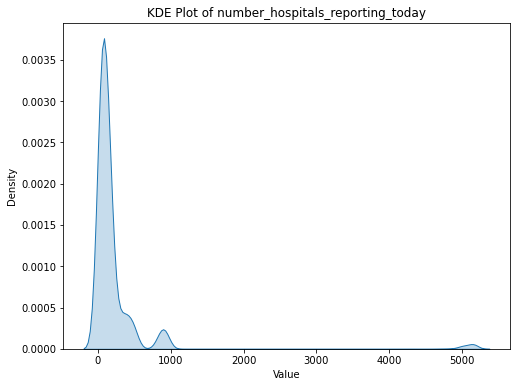

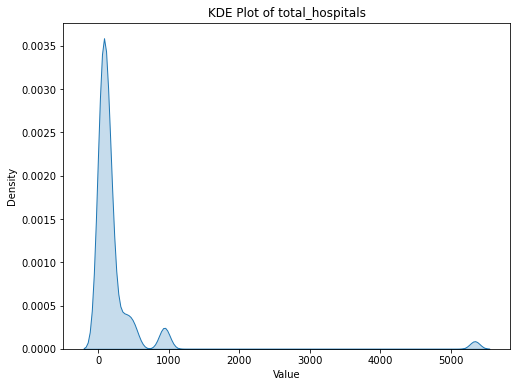

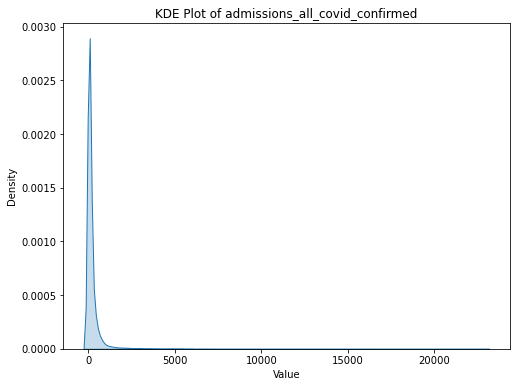

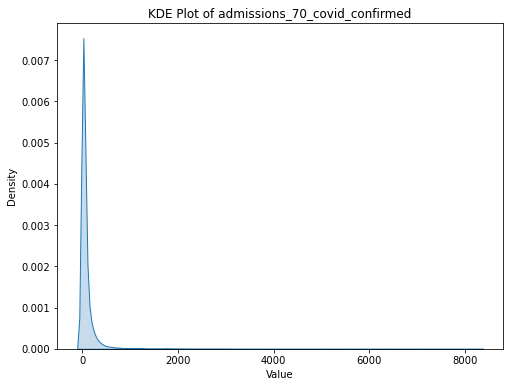

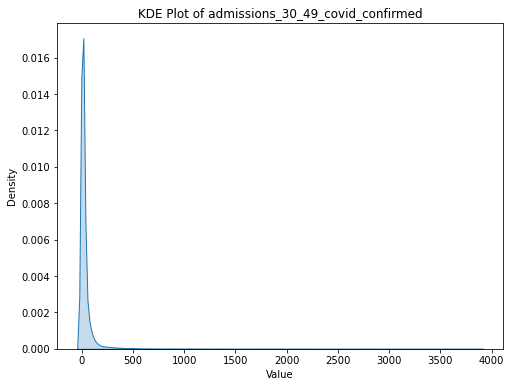

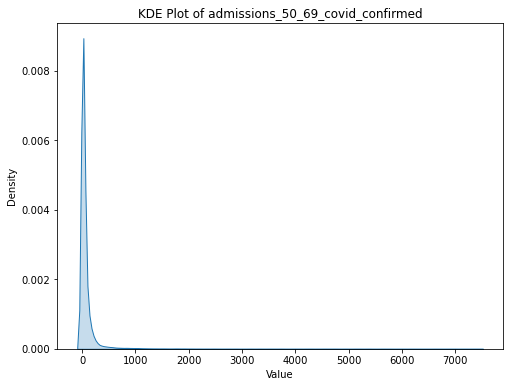

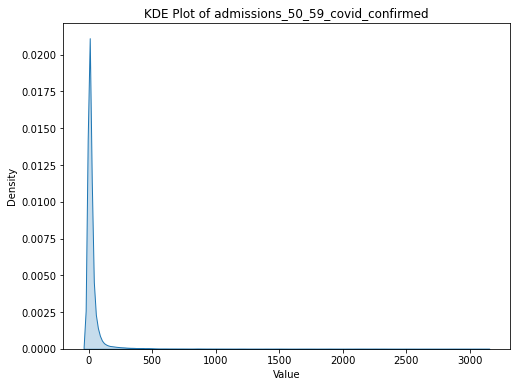

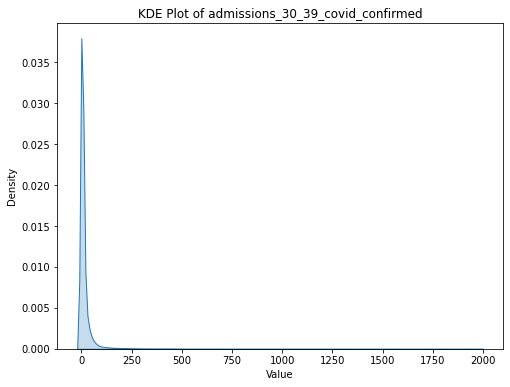

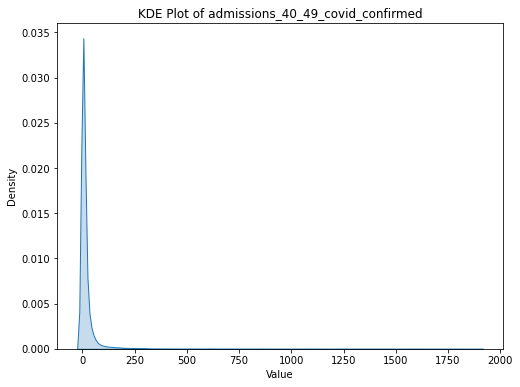

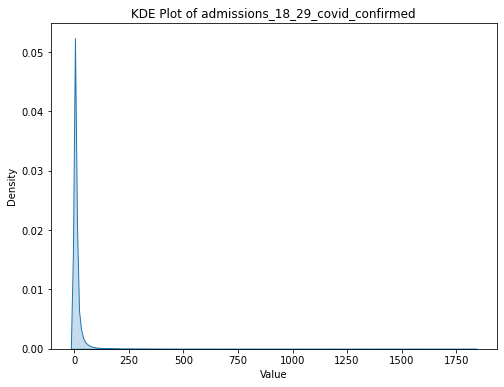

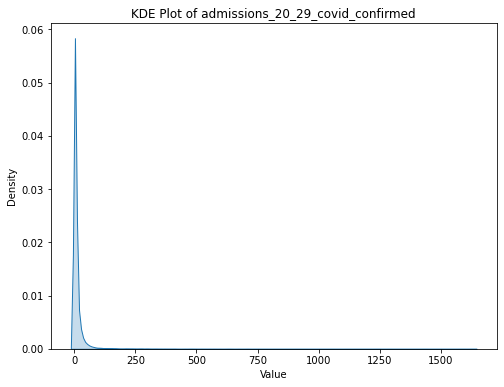

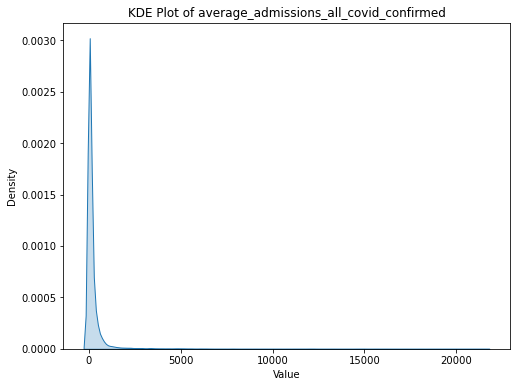

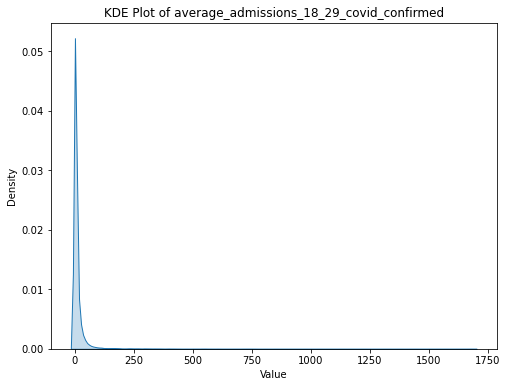

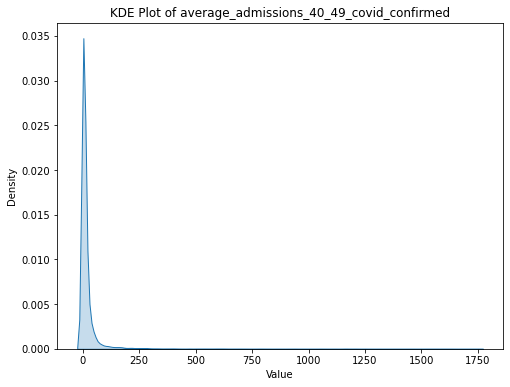

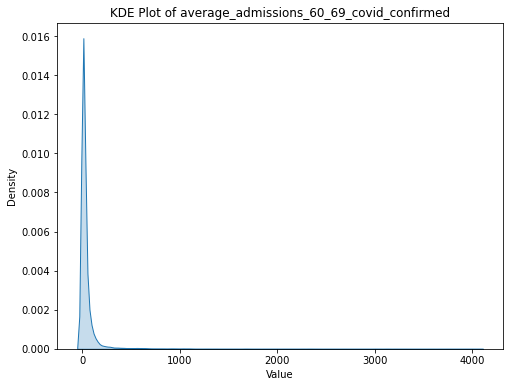

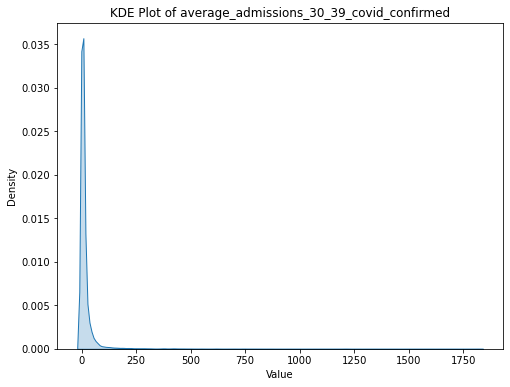

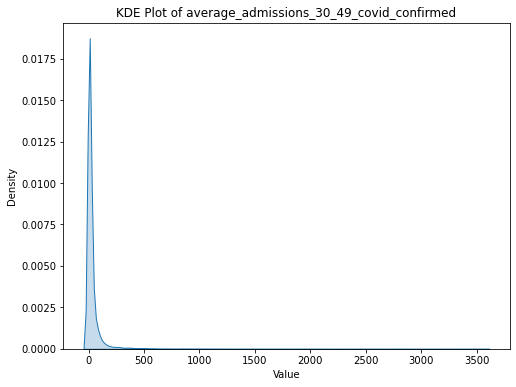

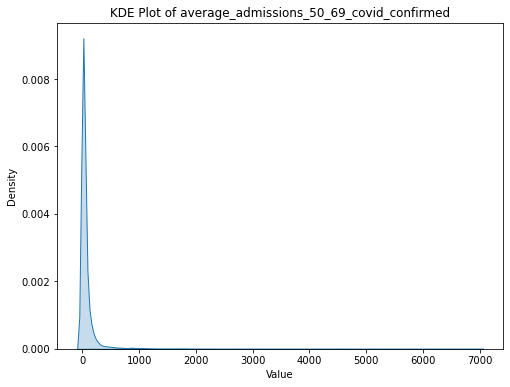

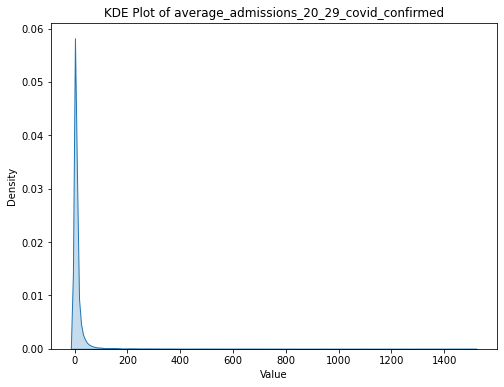

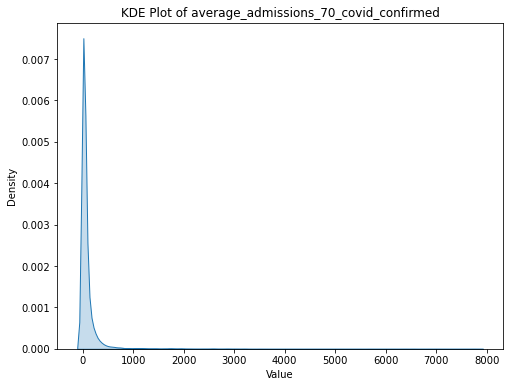

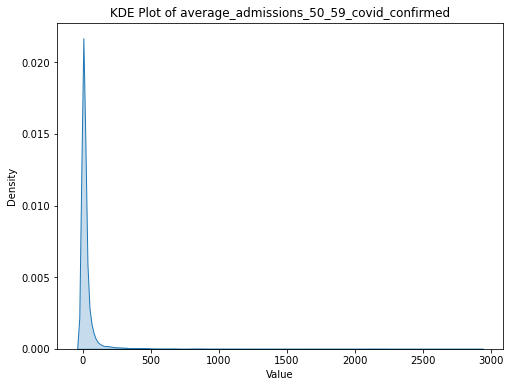

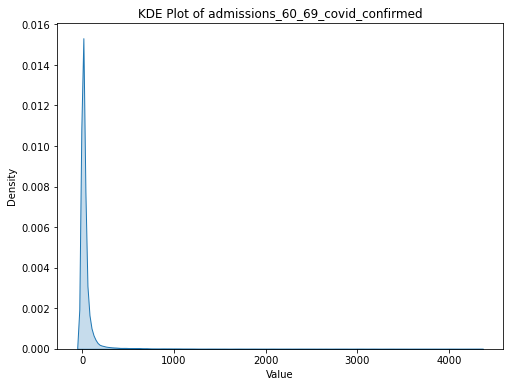

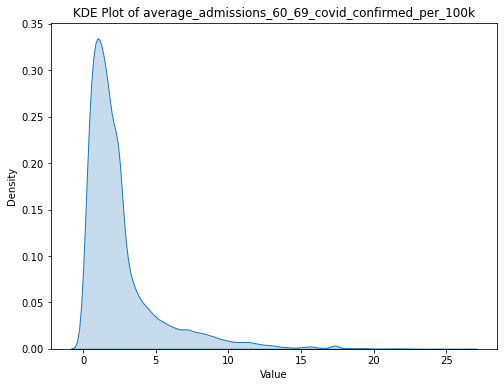

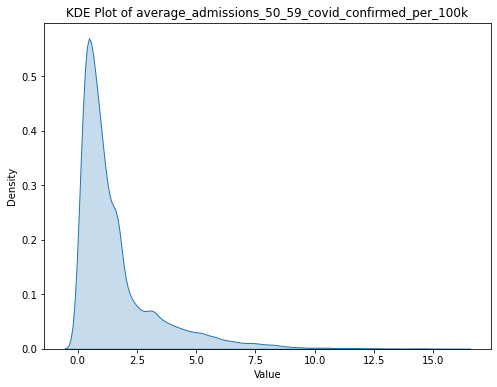

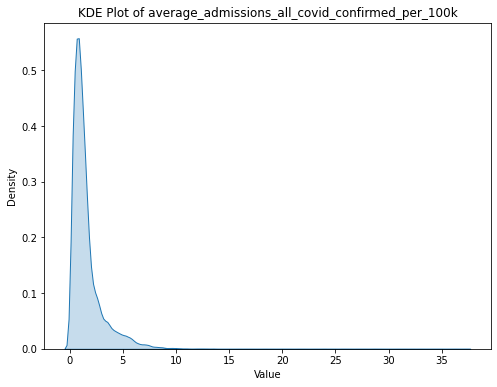

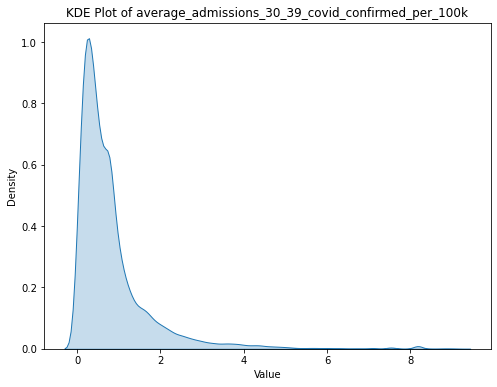

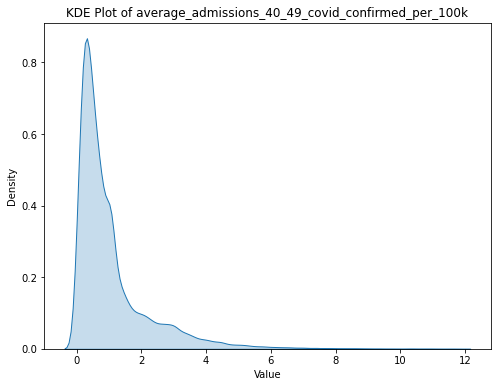

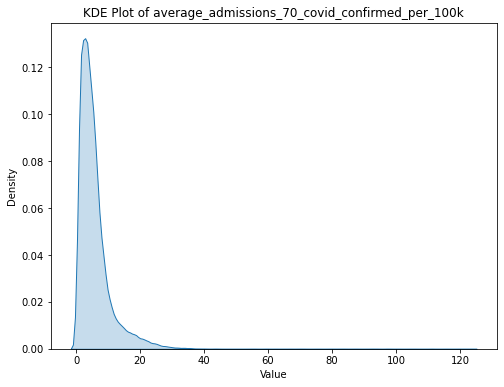

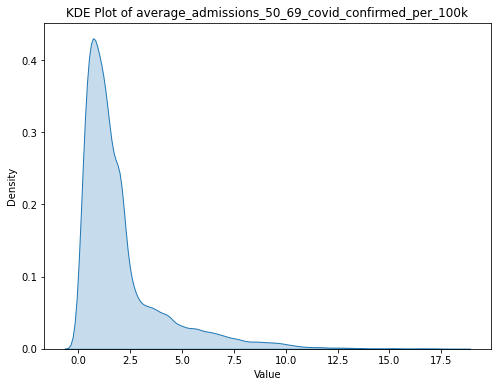

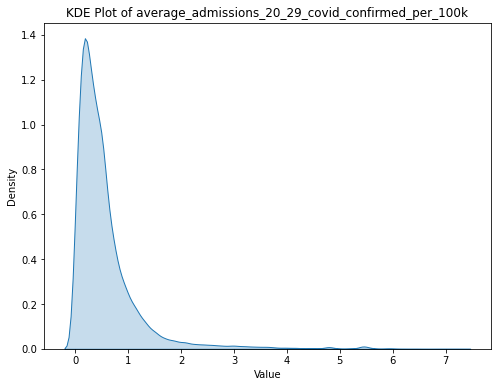

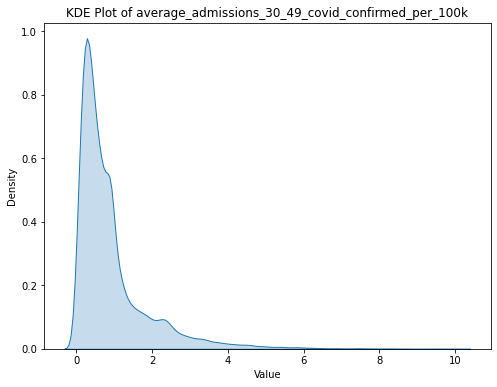

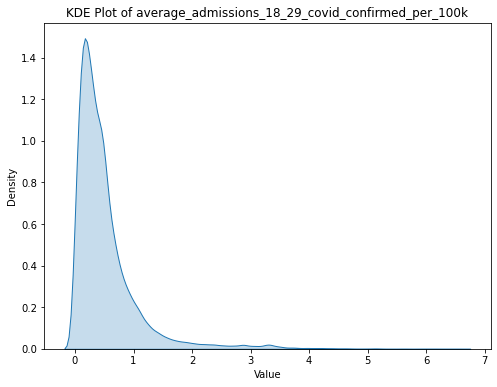

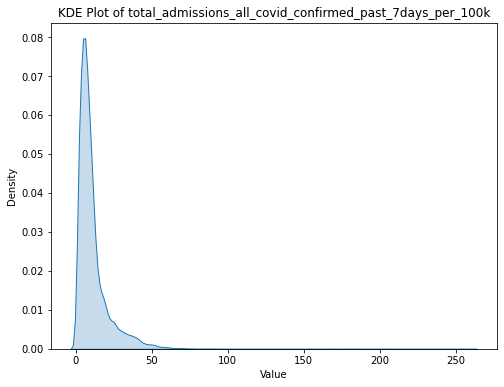

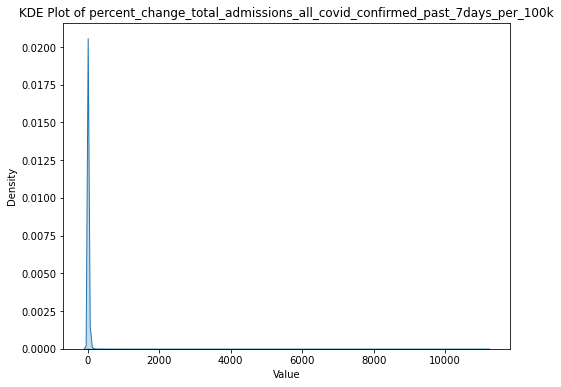

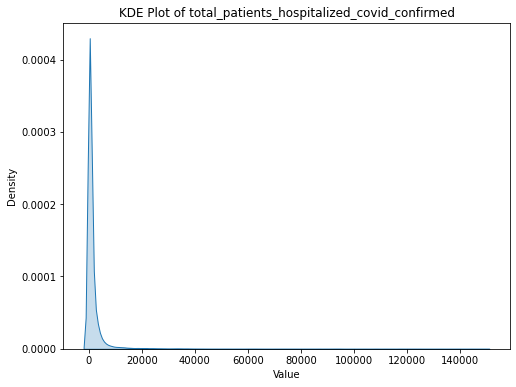

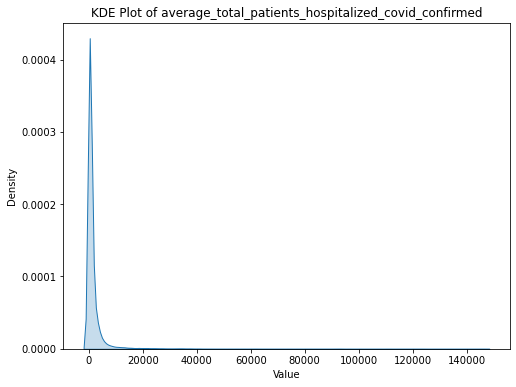

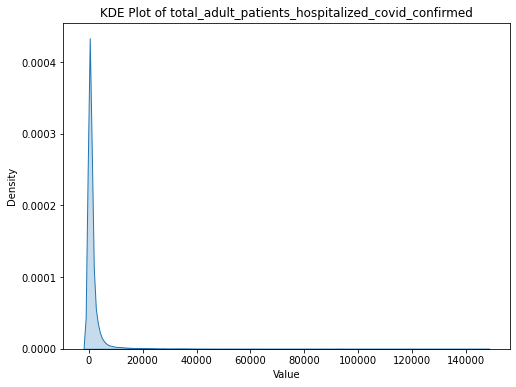

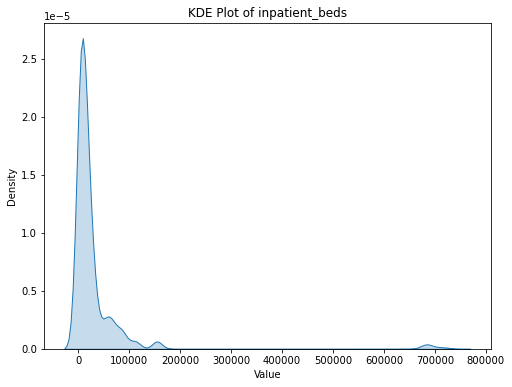

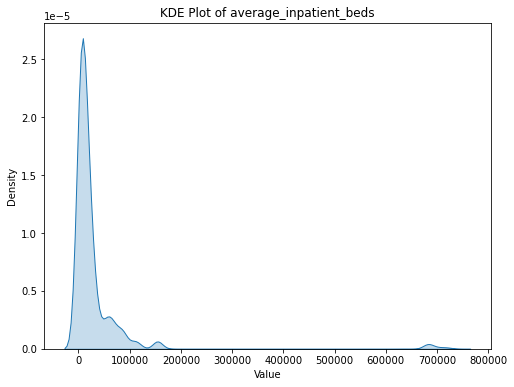

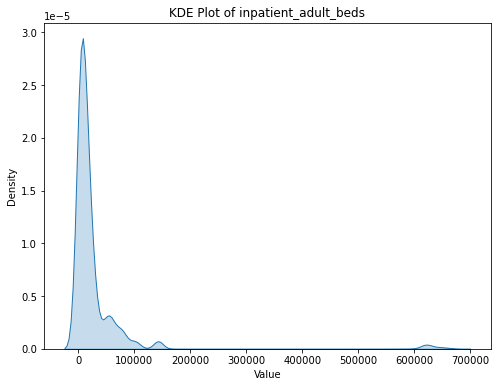

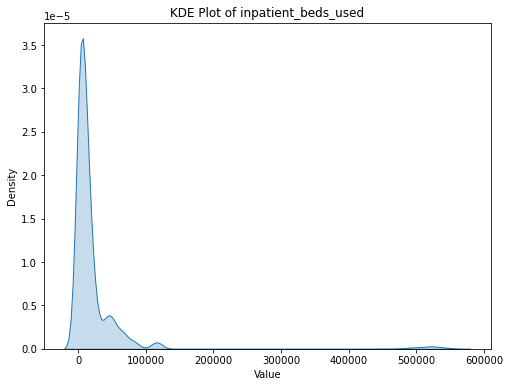

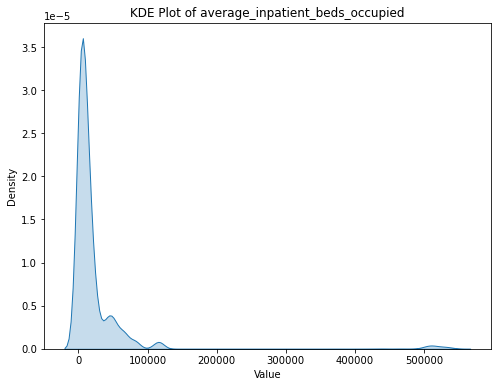

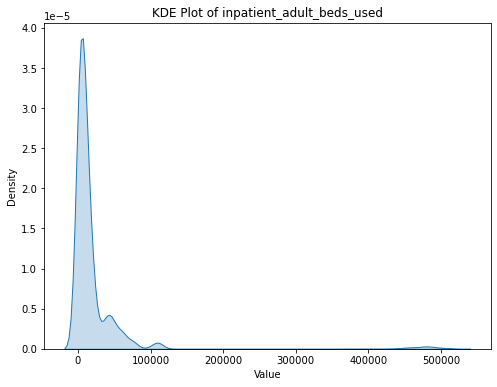

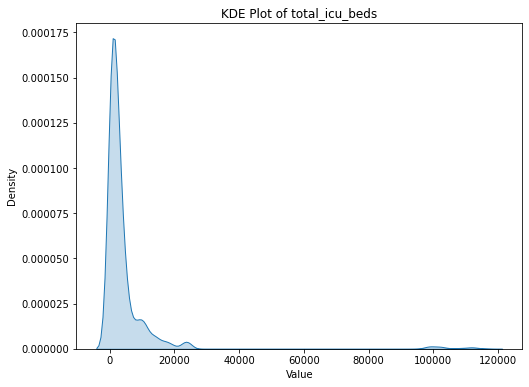

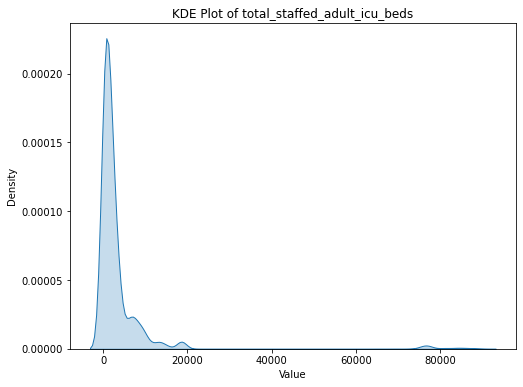

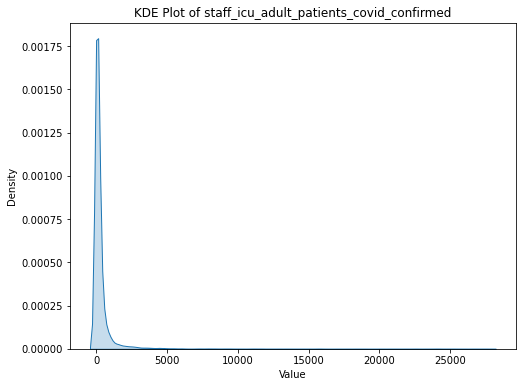

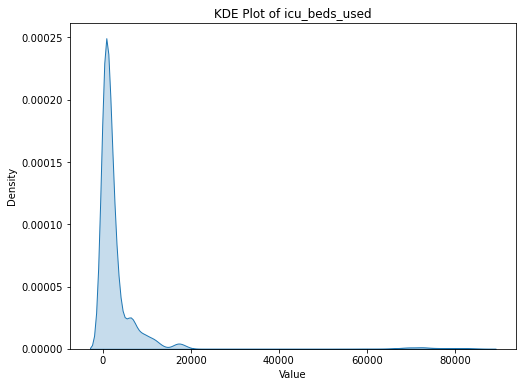

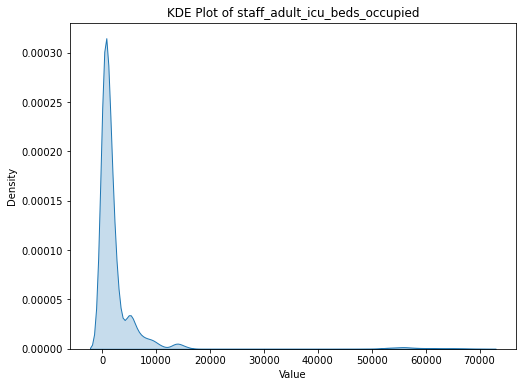

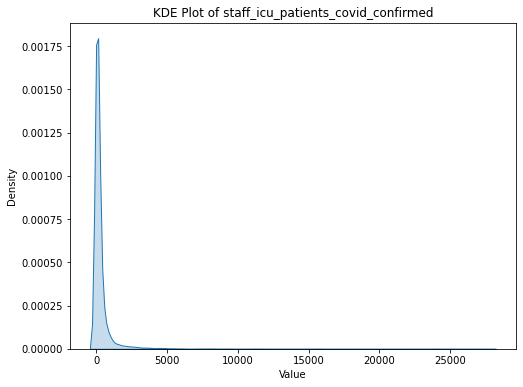

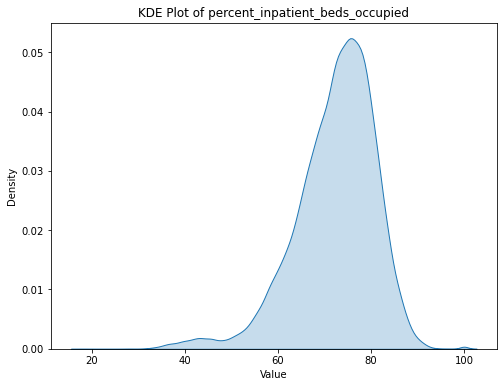

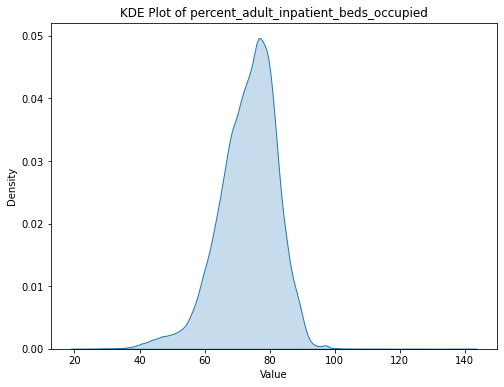

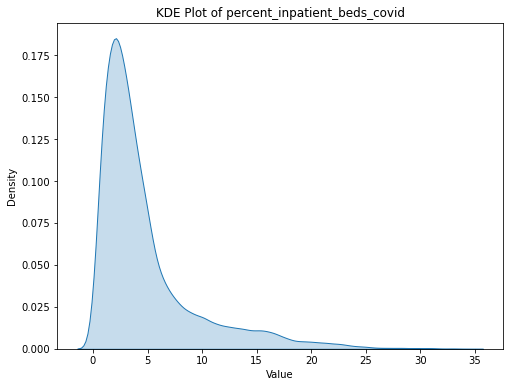

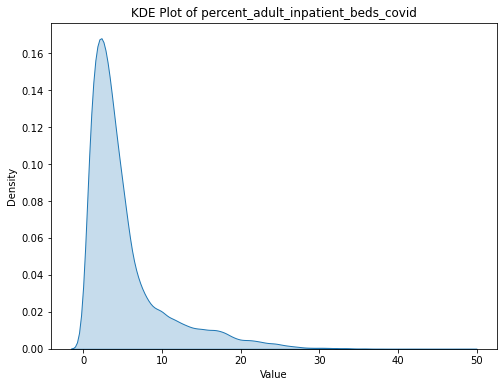

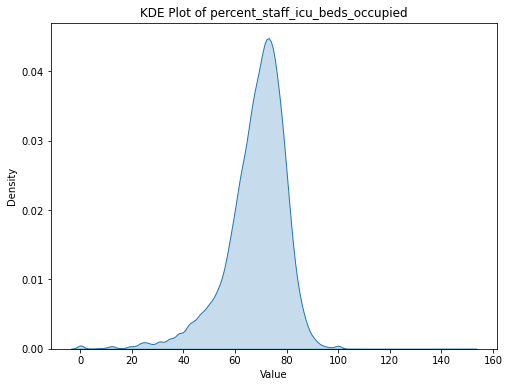

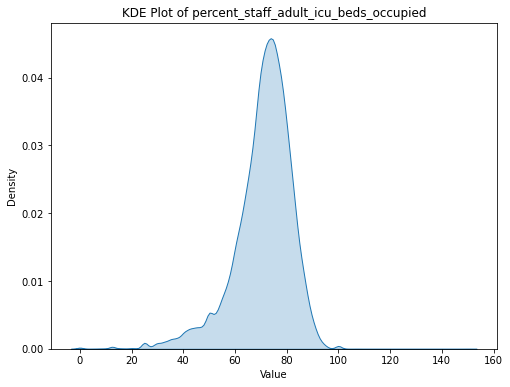

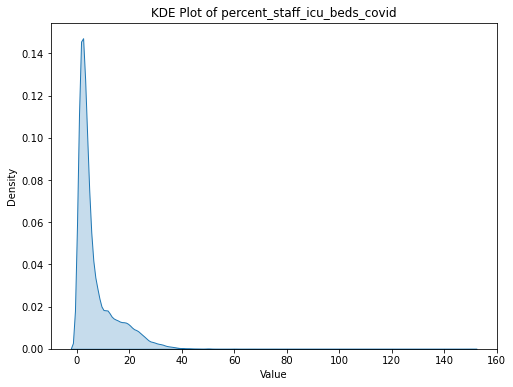

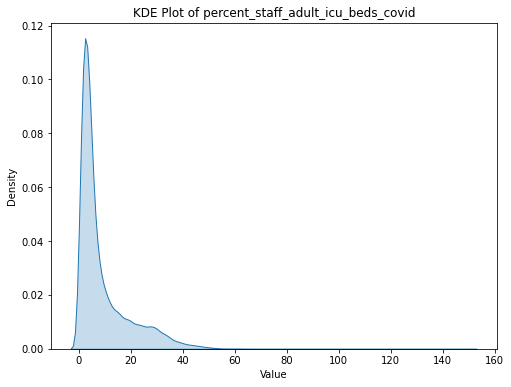

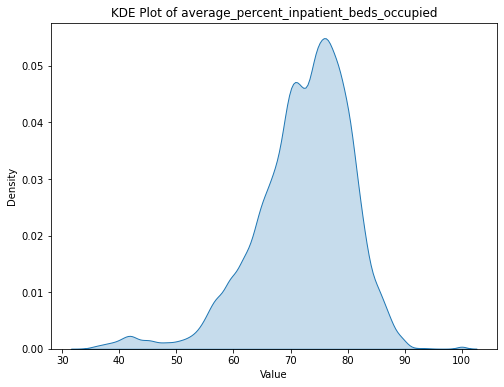

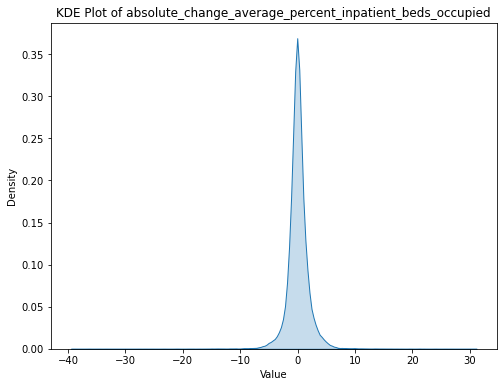

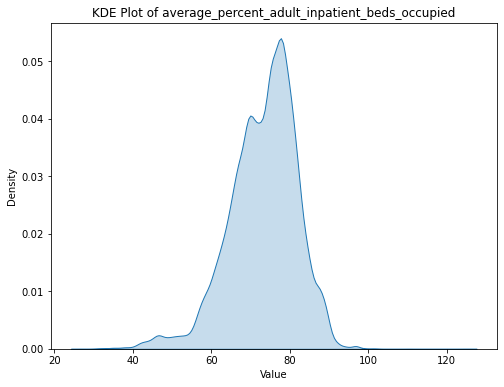

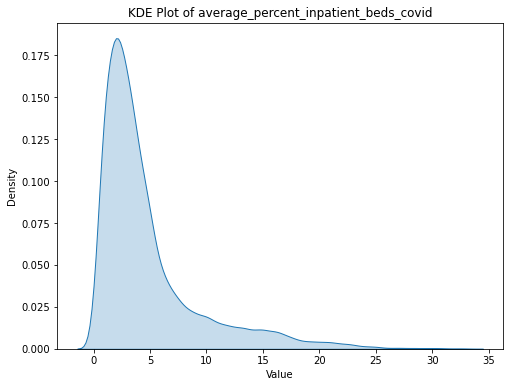

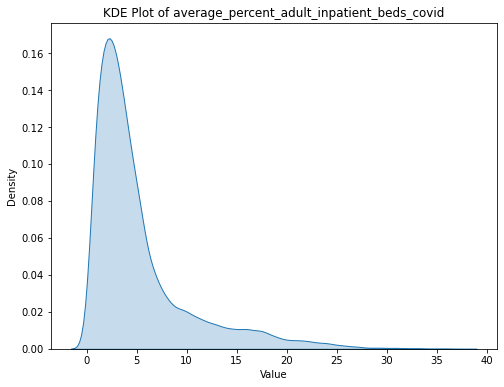

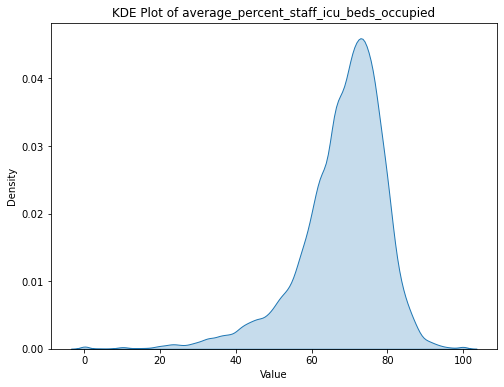

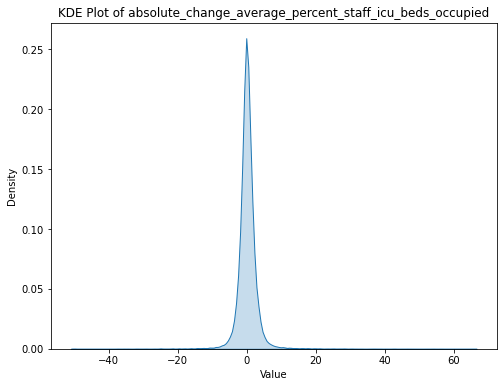

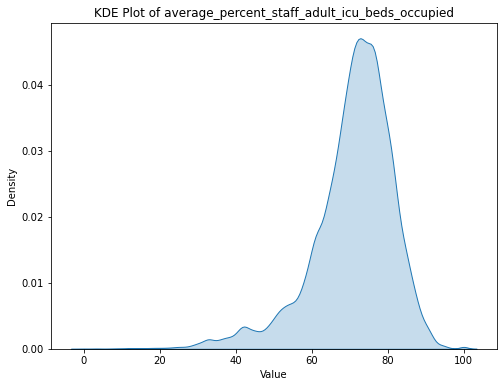

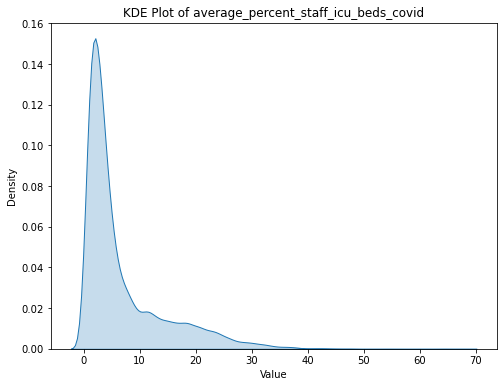

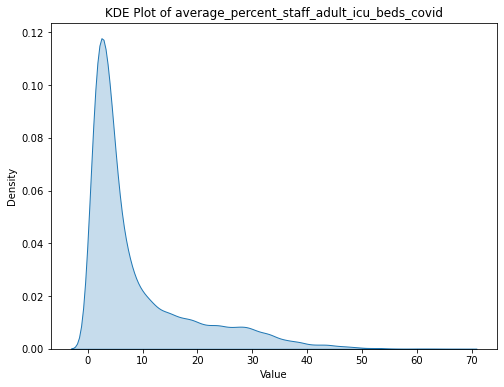

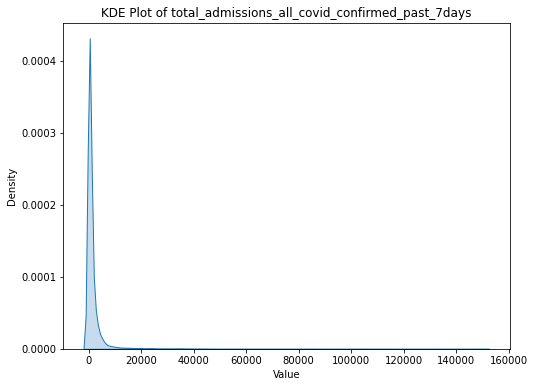

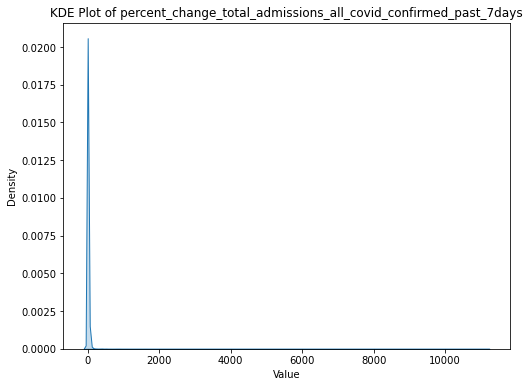

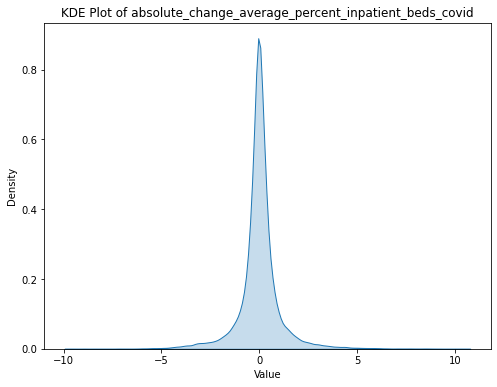

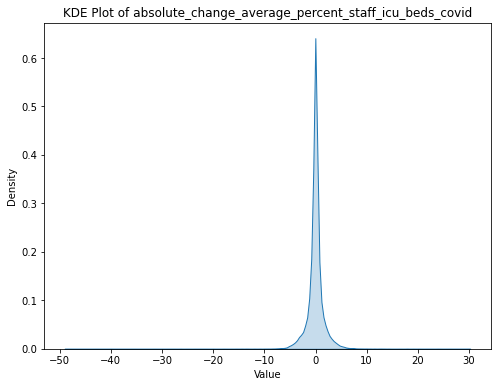

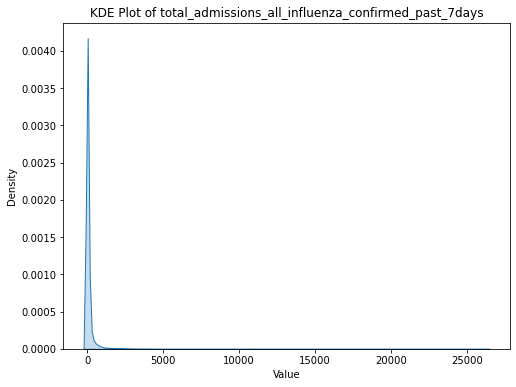

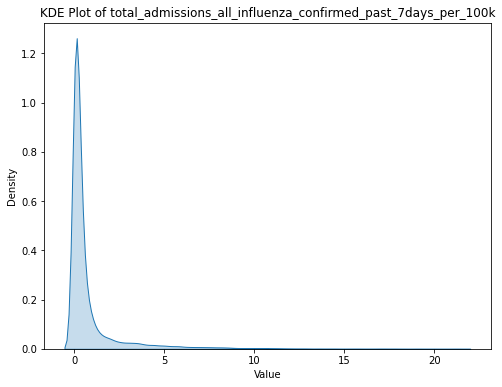

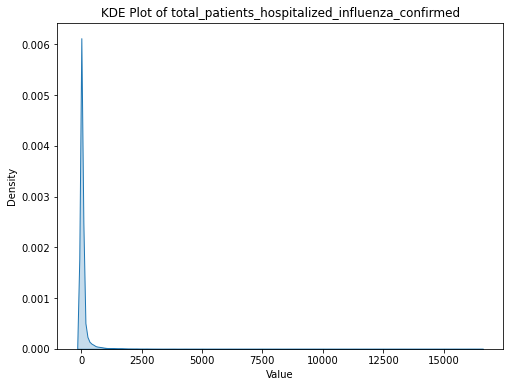

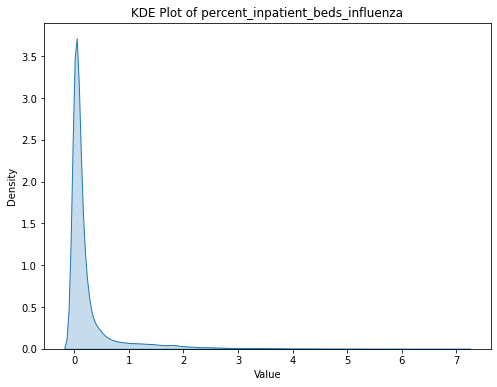

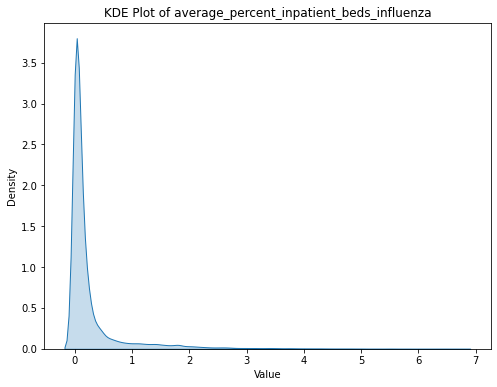

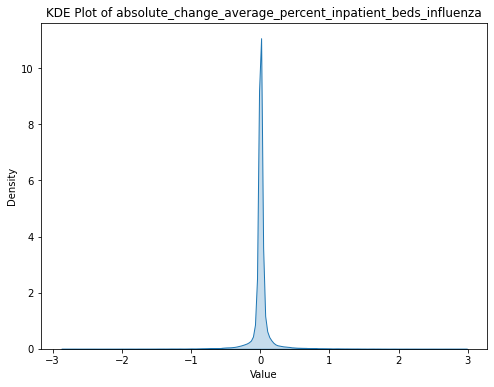

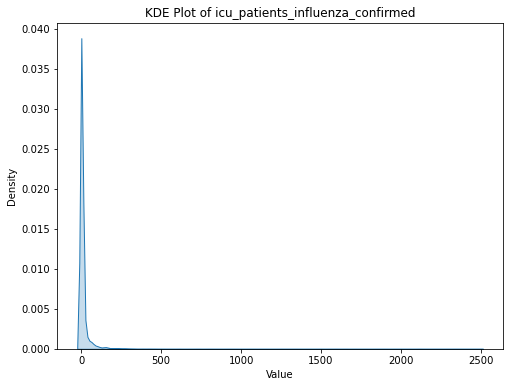

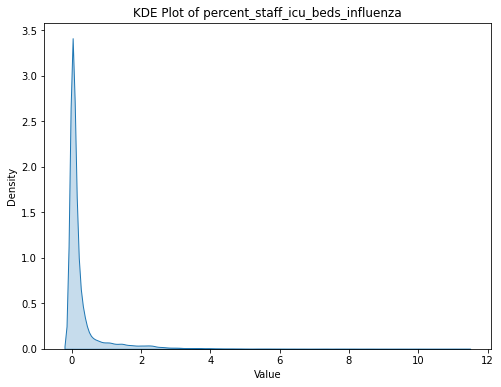

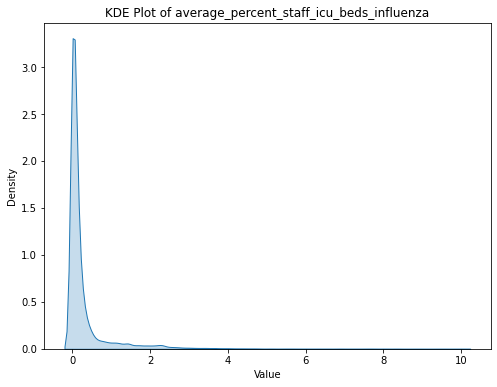

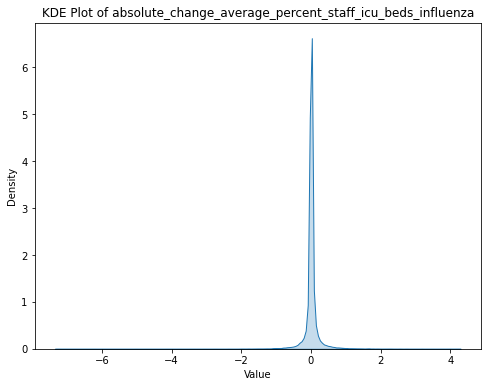

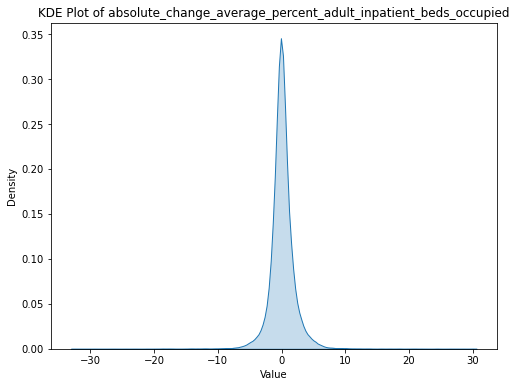

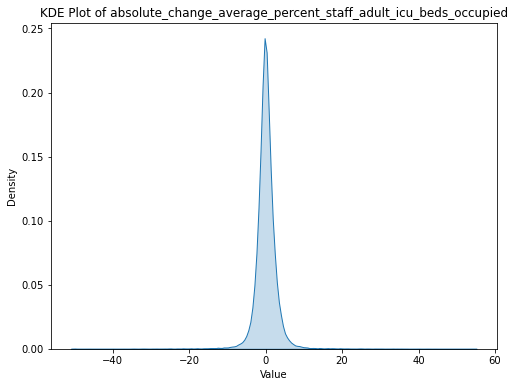

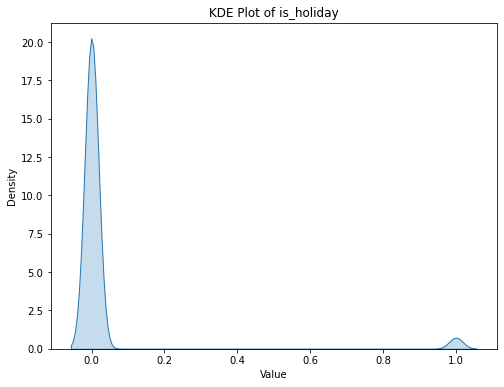

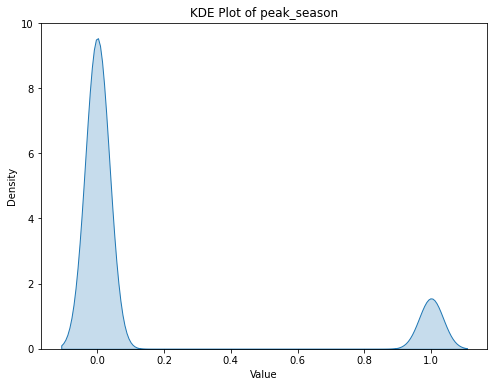

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'Jurisdiction' and 'collection_date' columns
df_filtered = df.drop(['jurisdiction','state' ,'collection_date'], axis=1)

# Iterate over each remaining column and create a KDE plot
for col in df_filtered.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.kdeplot(df_filtered[col].dropna(), shade=True)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()


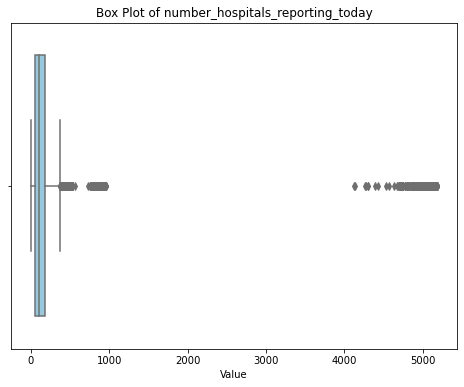

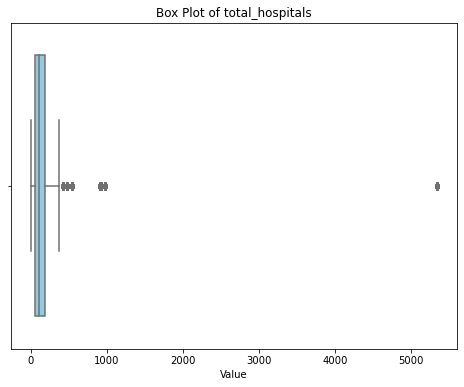

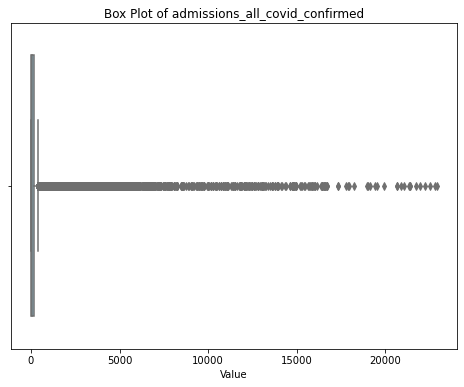

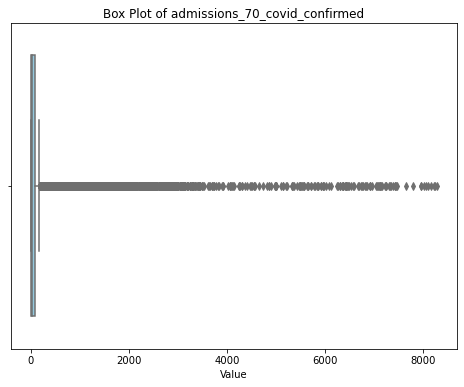

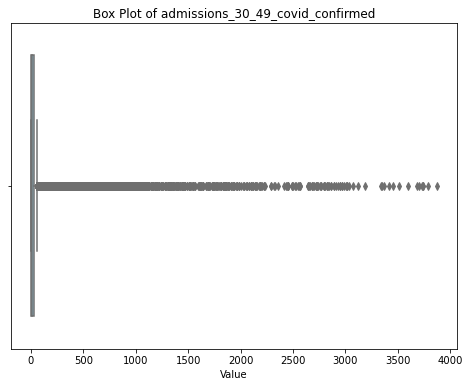

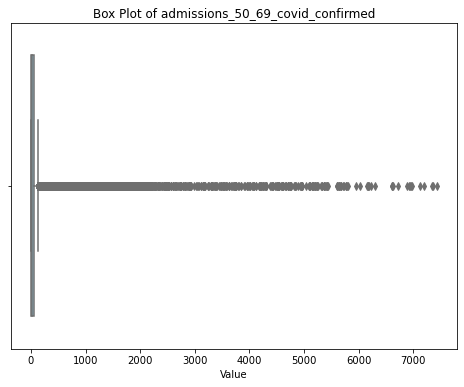

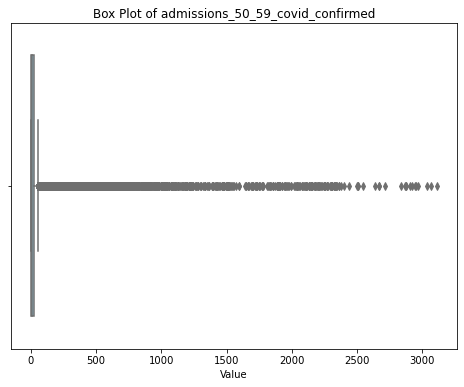

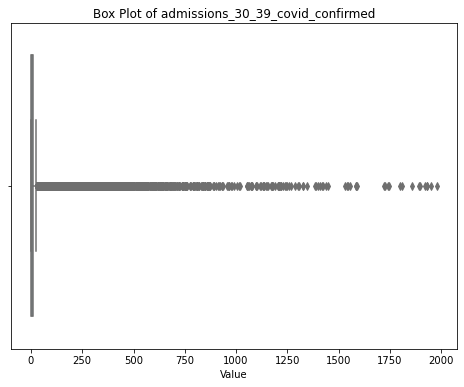

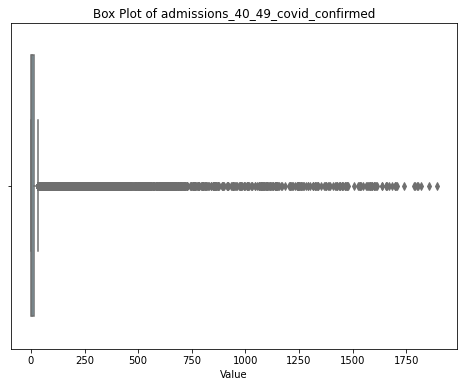

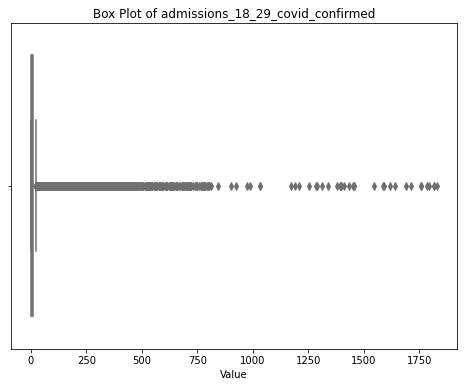

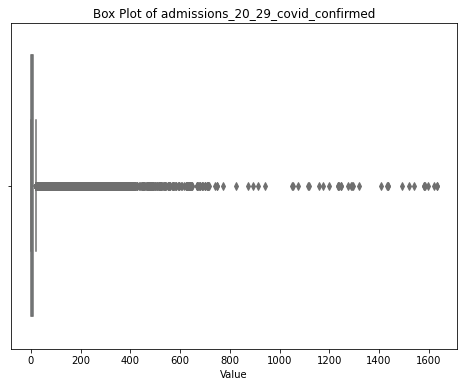

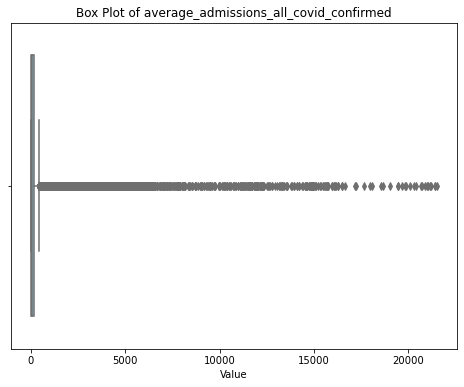

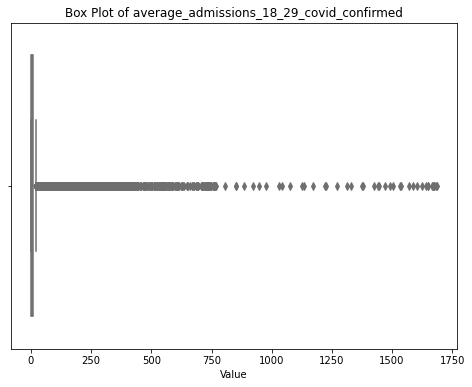

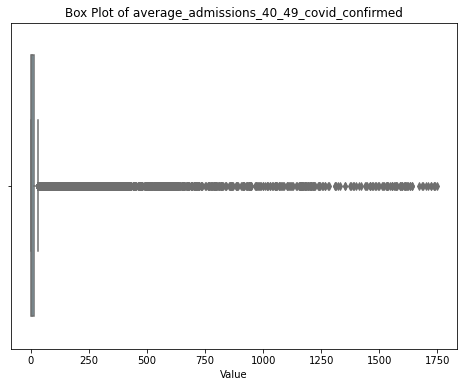

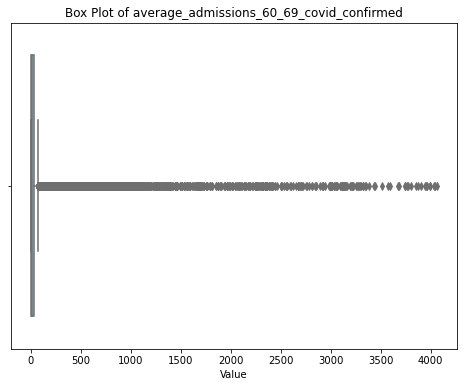

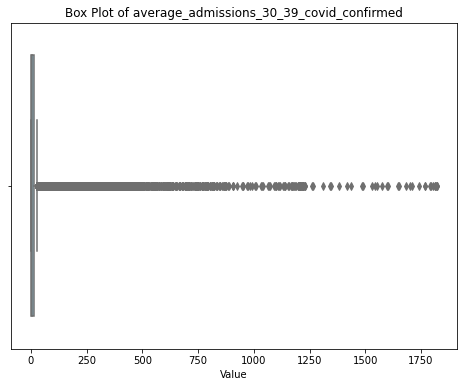

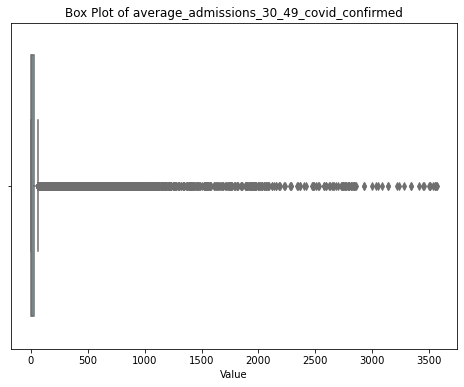

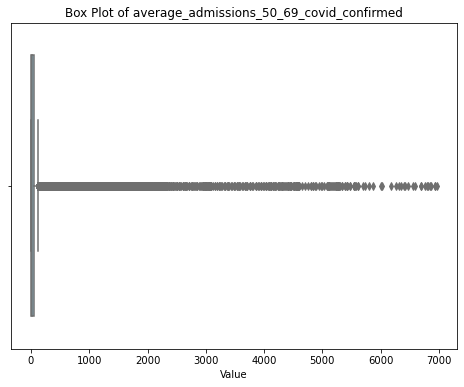

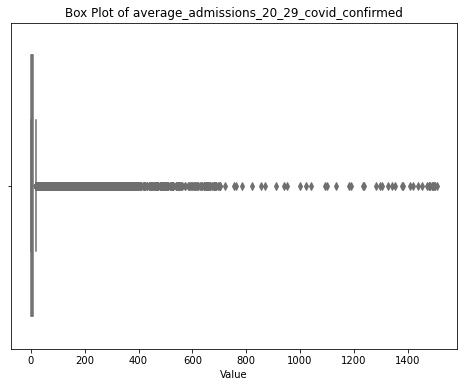

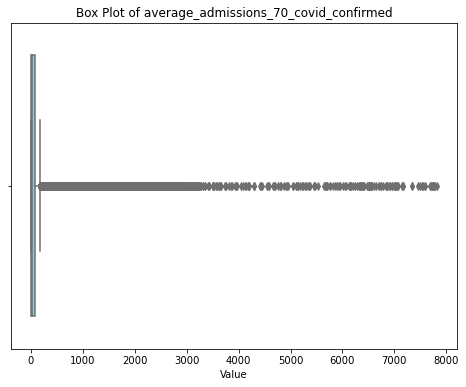

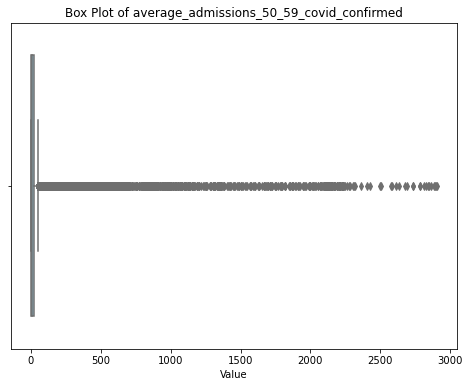

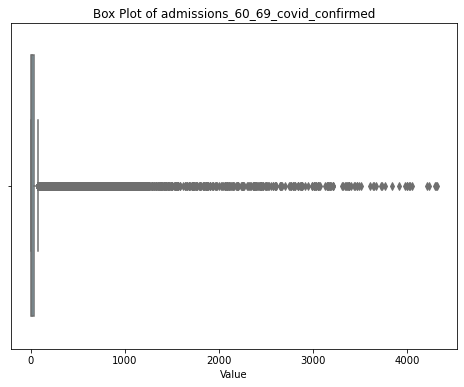

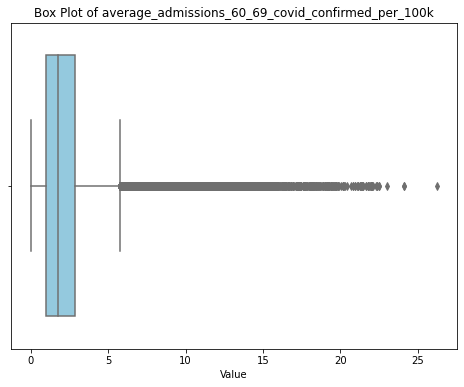

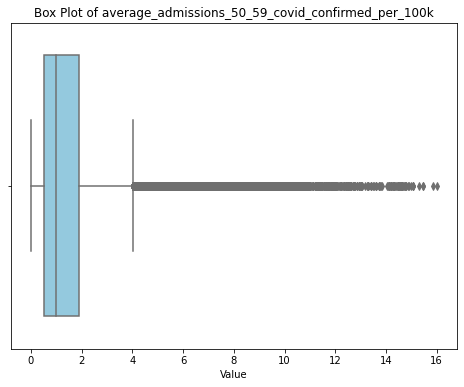

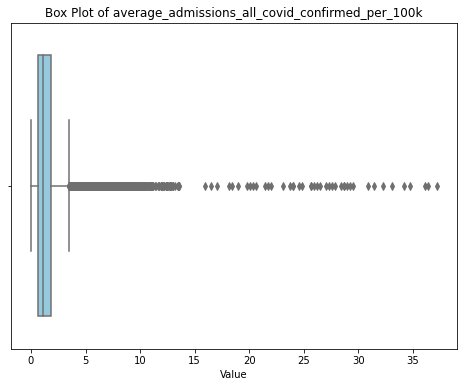

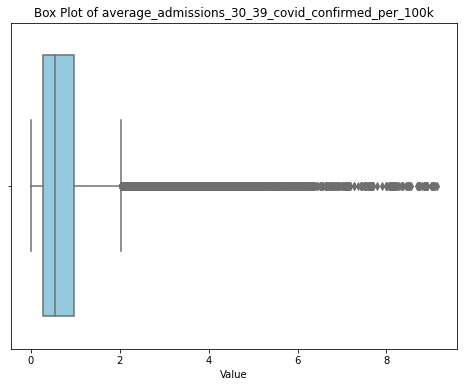

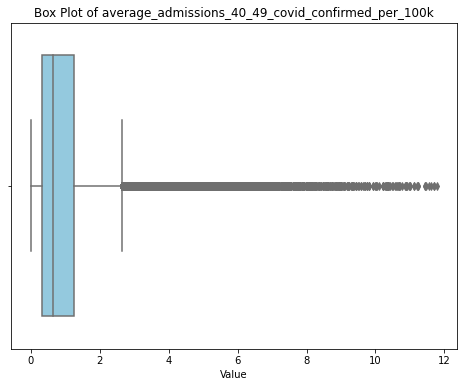

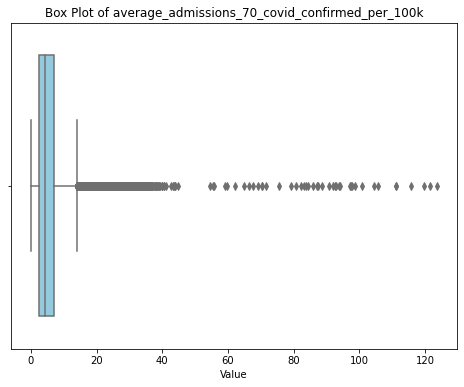

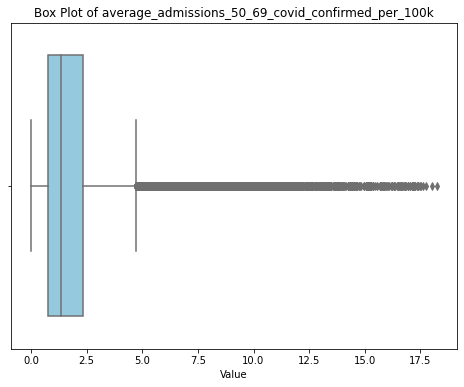

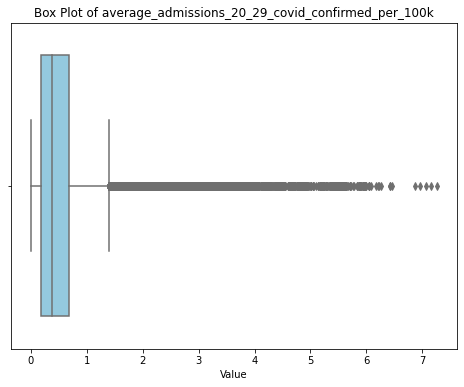

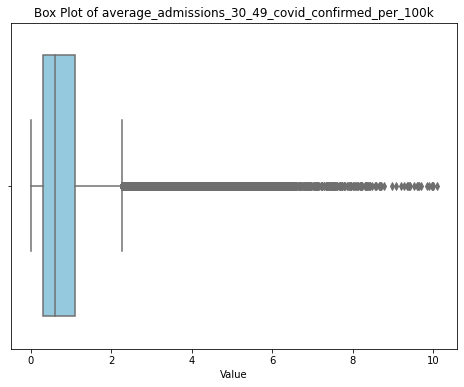

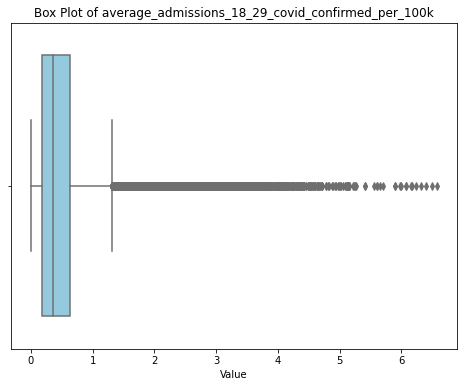

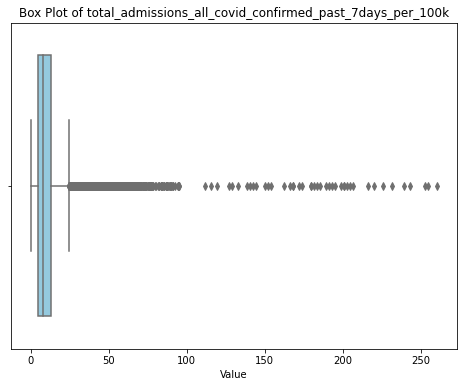

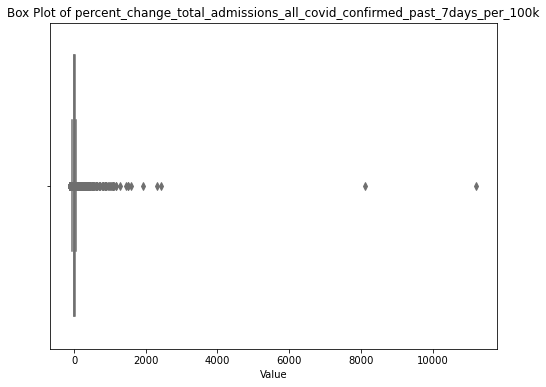

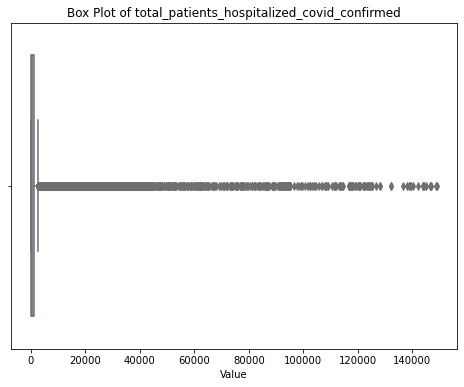

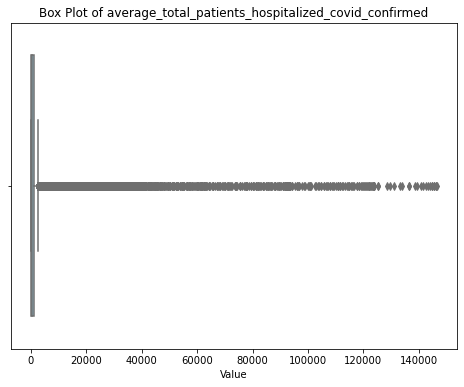

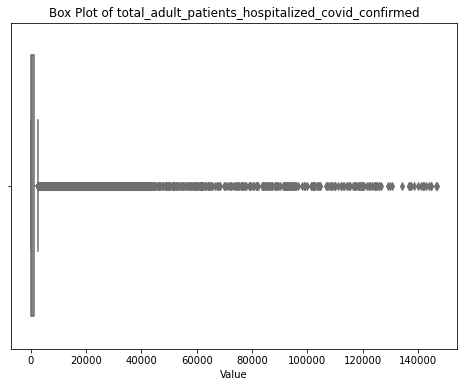

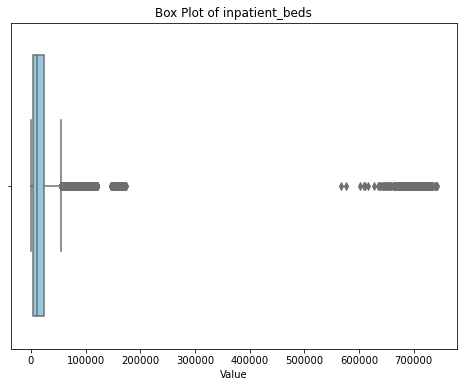

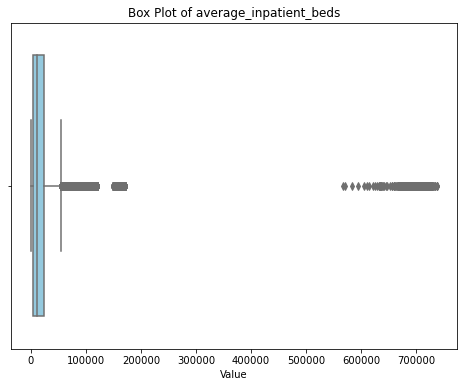

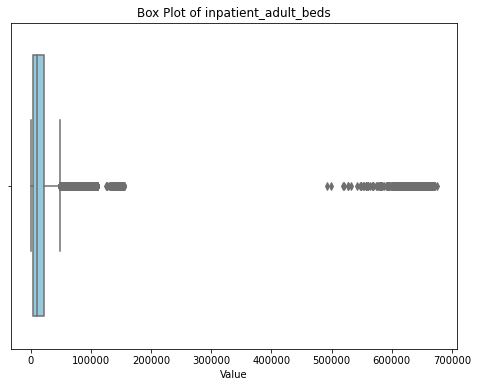

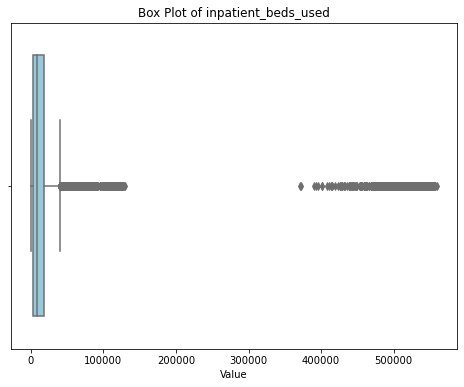

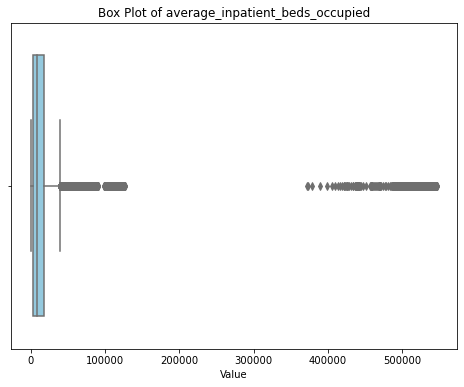

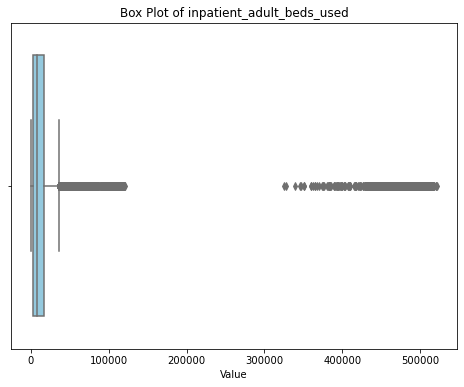

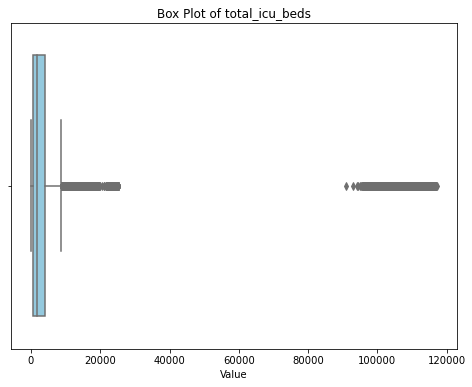

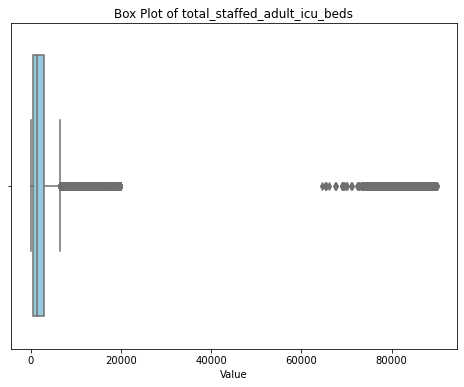

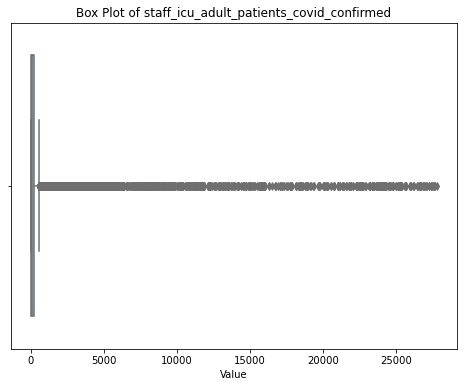

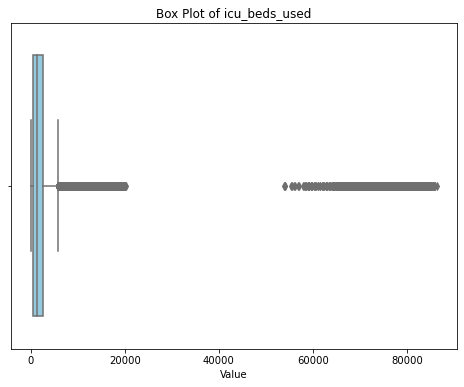

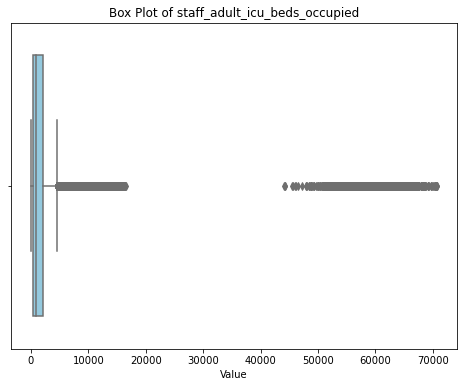

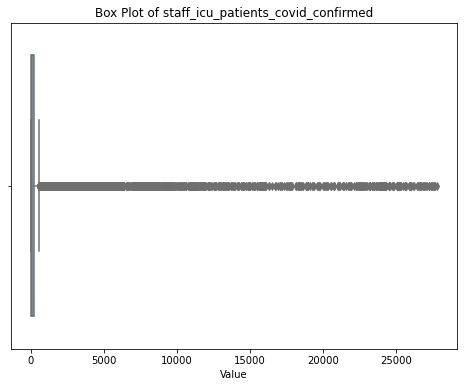

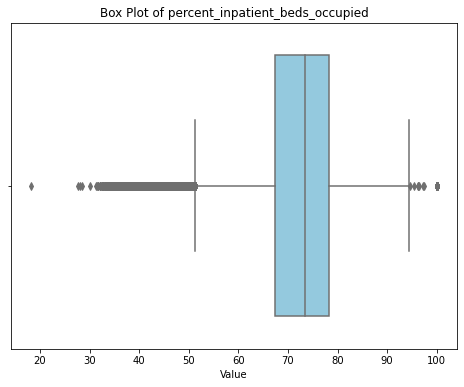

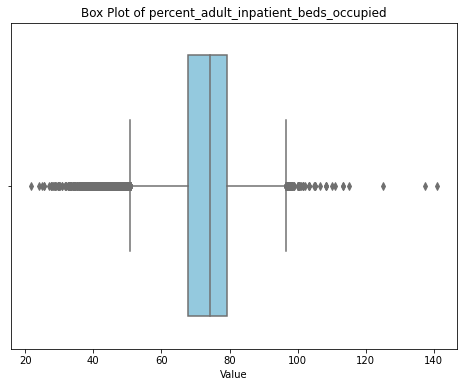

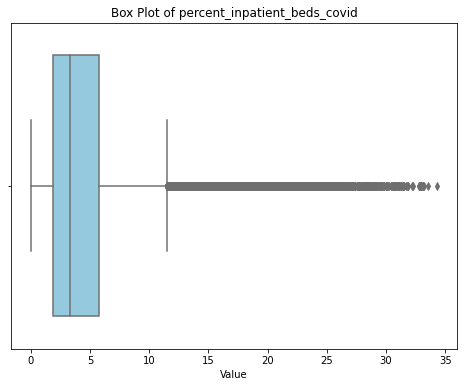

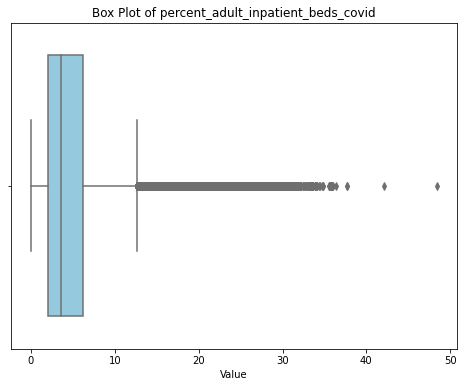

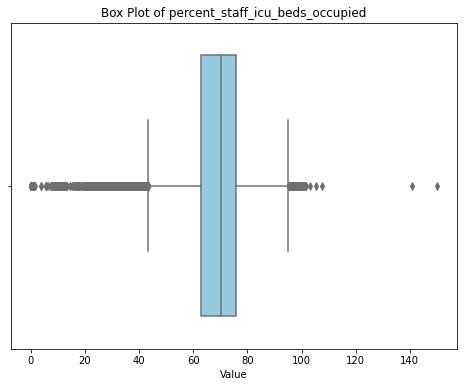

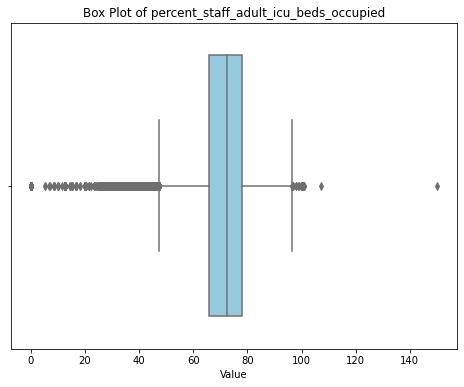

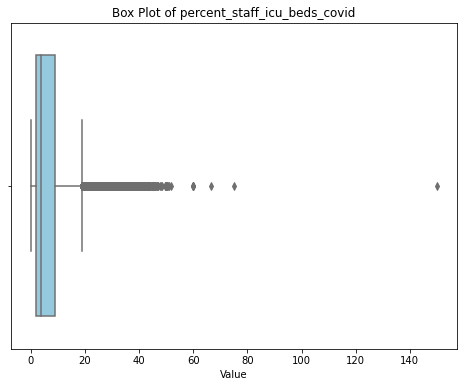

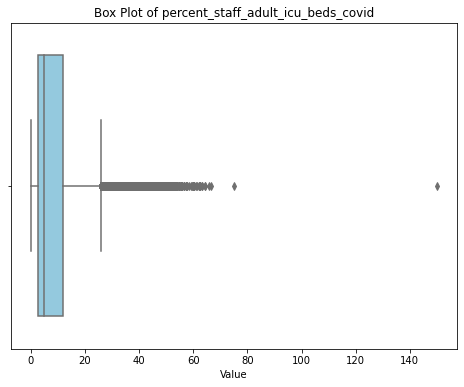

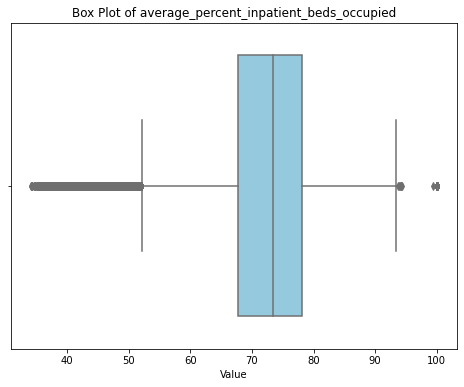

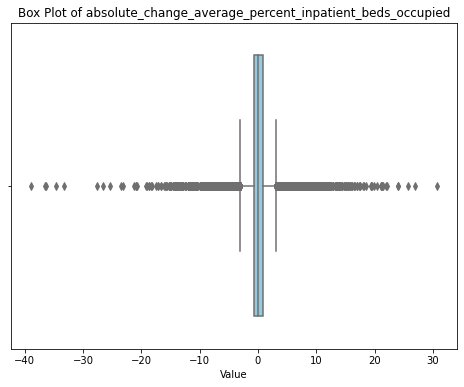

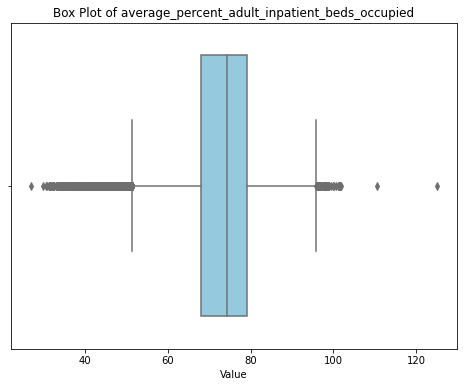

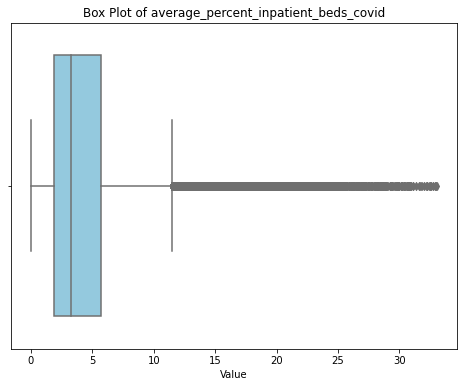

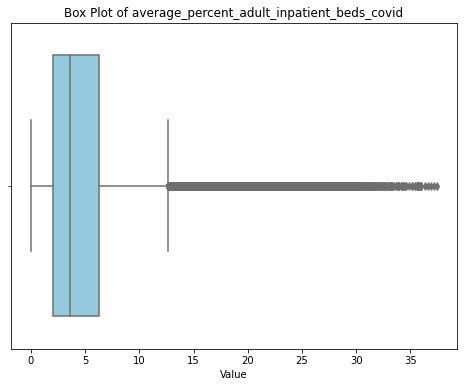

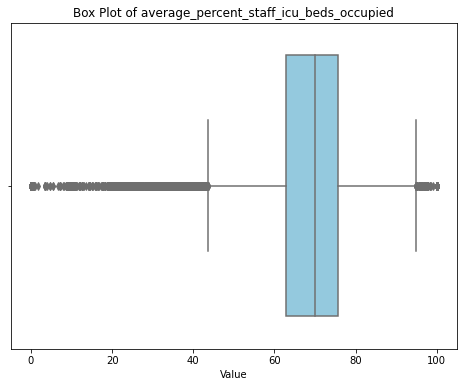

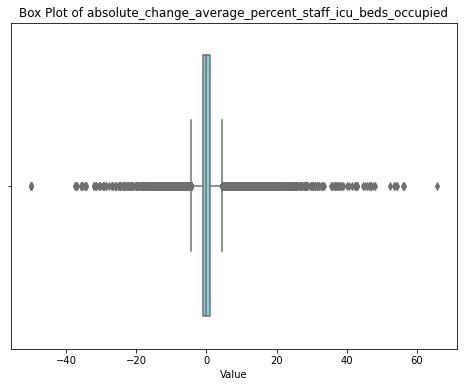

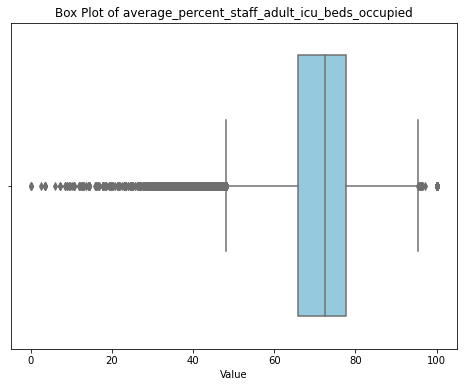

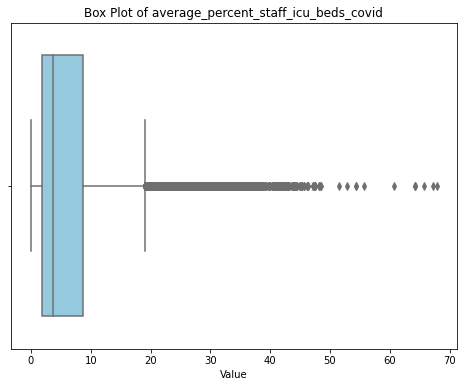

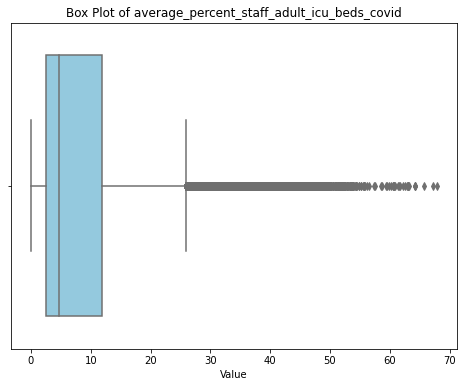

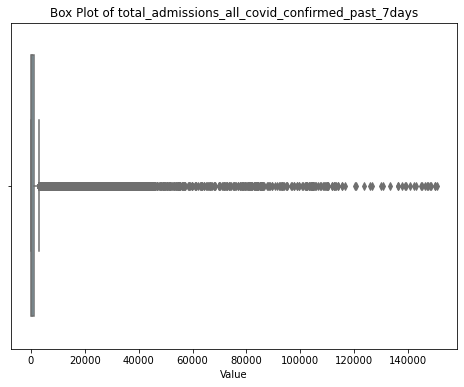

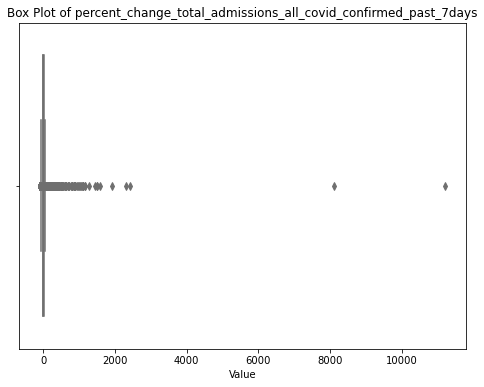

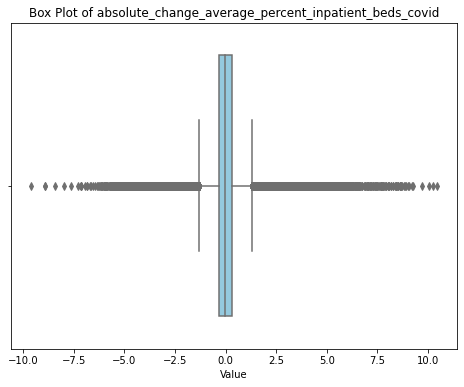

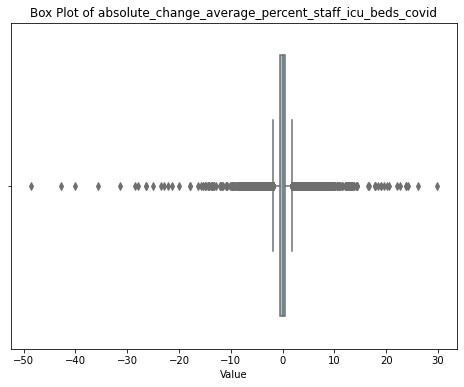

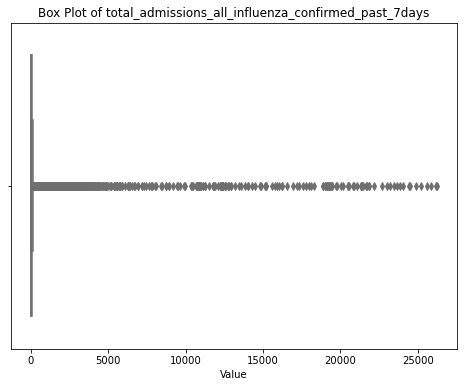

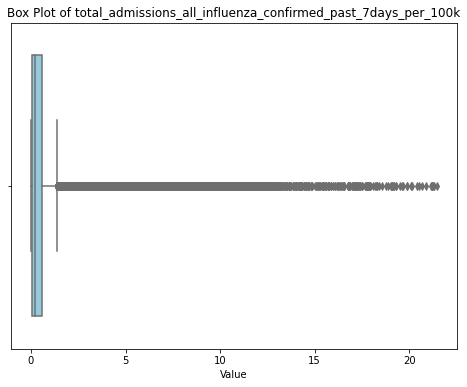

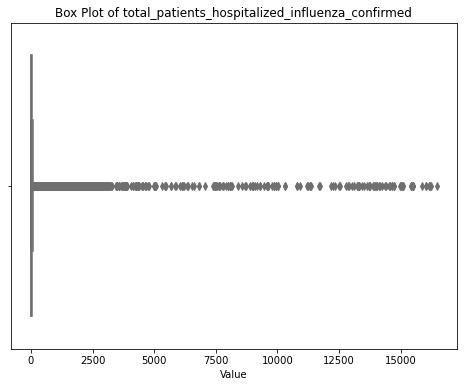

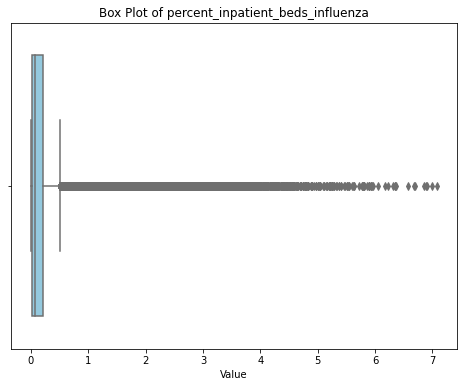

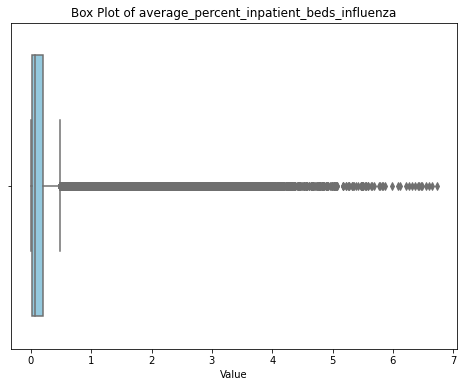

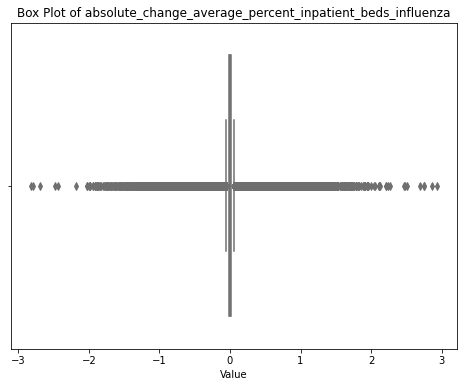

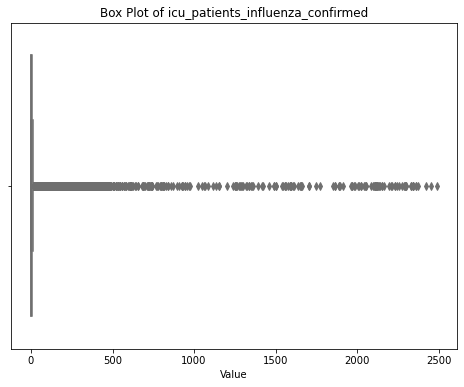

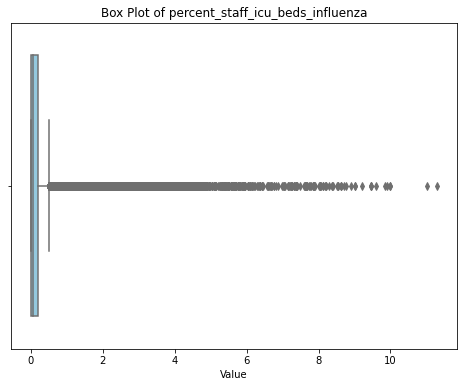

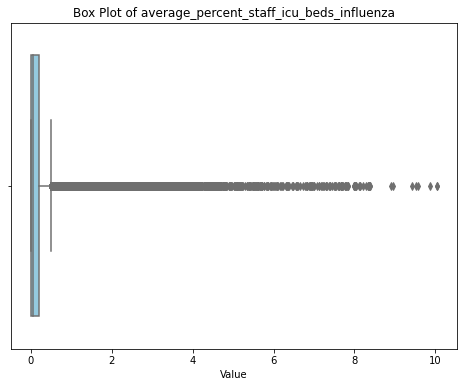

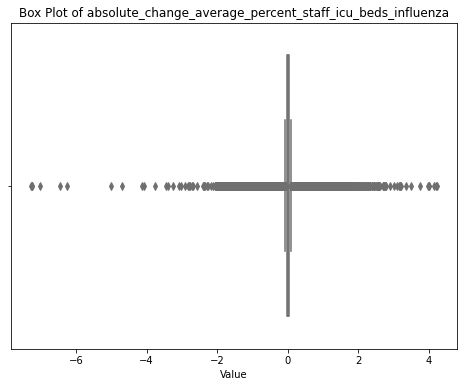

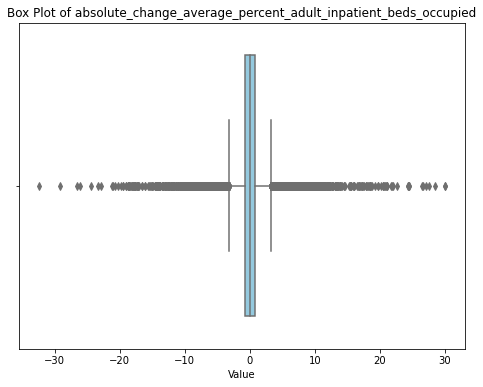

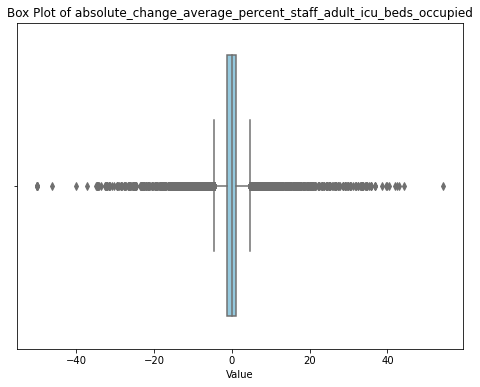

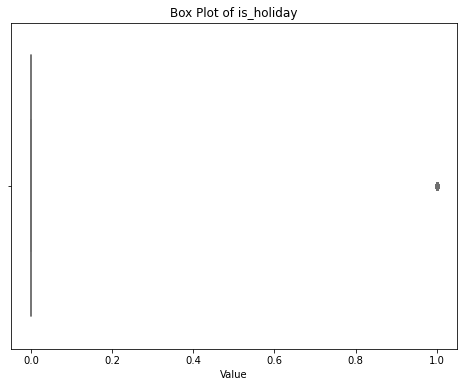

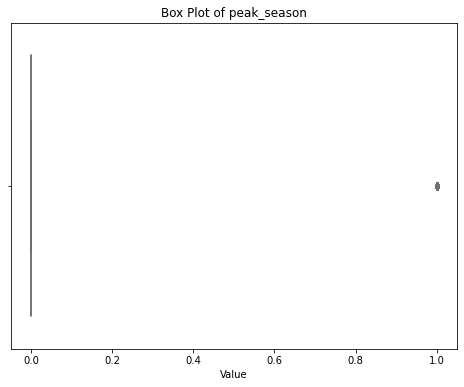

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# Iterate over each remaining column and create a box plot
for col in df_filtered.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.boxplot(x=df_filtered[col].dropna(), color="skyblue")
    plt.title(f"Box Plot of {col}")
    plt.xlabel("Value")
    plt.show()


In [11]:
from sklearn.preprocessing import QuantileTransformer

# Exclude the first three columns
df_features = df.iloc[:, 3:]

# Instantiate the QuantileTransformer object
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit and transform the data
transformed_data = quantile_transformer.fit_transform(df_features)

# Combine the transformed features with the first three columns
transformed_df = pd.concat([df.iloc[:, :3], pd.DataFrame(transformed_data, columns=df_features.columns)], axis=1)


In [12]:
transformed_df

jurisdiction    state collection_date  number_hospitals_reporting_today  \
0               AZ  Arizona      08-01-2020                         -0.517790   
1               AZ  Arizona      08-02-2020                         -0.254038   
2               AZ  Arizona      08-03-2020                         -0.244548   
3               AZ  Arizona      08-04-2020                         -0.247134   
4               AZ  Arizona      08-05-2020                         -0.238089   
...            ...      ...             ...                               ...   
83606           UT     Utah      13-02-2024                         -0.639462   
83607           UT     Utah      14-02-2024                         -0.665852   
83608           UT     Utah      15-02-2024                         -0.665852   
83609           UT     Utah      16-02-2024                         -0.665852   
83610           UT     Utah      17-02-2024                         -0.665852   

       total_hospitals  admissions_all_covid_confirmed  \
0            -0.101796                        0.313694   
1            -0.101796                        0.475214   
2            -0.101796                        0.345485   
3            -0.101796                        0.462610   
4            -0.101796                        0.458426   
...                ...                             ...   
83606        -0.618059                       -0.664287   
83607        -0.618059                       -0.549616   
83608        -0.618059                       -0.697507   
83609        -0.618059                       -1.072973   
83610        -0.618059                       -0.860725   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                           0.027604                          0.429351   
1                           0.101796                          0.667419   
2                           0.027604                          0.589456   
3                           0.166367                          0.639462   
4                           0.050204                          0.761353   
...                              ...                               ...   
83606                      -0.648724                         -0.231641   
83607                      -0.523537                         -0.959440   
83608                      -0.648724                         -0.478025   
83609                      -1.169401                         -0.668987   
83610                      -0.809168                         -0.959440   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                              0.439001                          0.475214   
1                              0.422483                          0.312376   
2                              0.303168                          0.401995   
3                              0.383024                          0.312376   
4                              0.439001                          0.401995   
...                                 ...                               ...   
83606                         -1.116369                         -5.199338   
83607                         -0.571638                         -0.443149   
83608                         -1.116369                         -0.939747   
83609                         -1.116369                         -0.939747   
83610                         -0.670557                         -0.641002   

       ...  average_percent_inpatient_beds_influenza  \
0      ...                                 -5.199338   
1      ...                                 -5.199338   
2      ...                                 -5.199338   
3      ...                                 -5.199338   
4      ...                                 -5.199338   
...    ...                                       ...   
83606  ...                                  0.964736   
83607  ...                                  0.983374   
83608  ...        

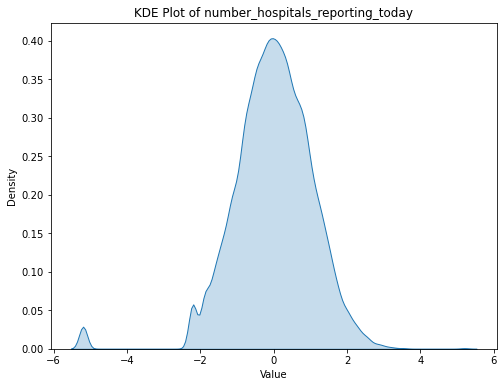

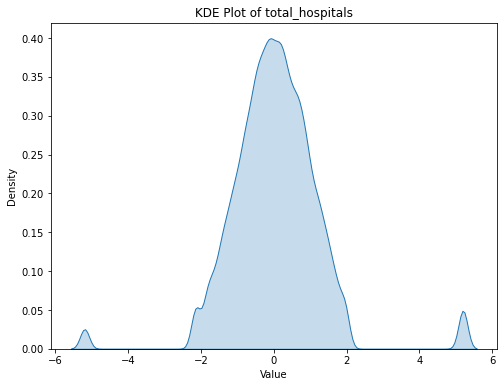

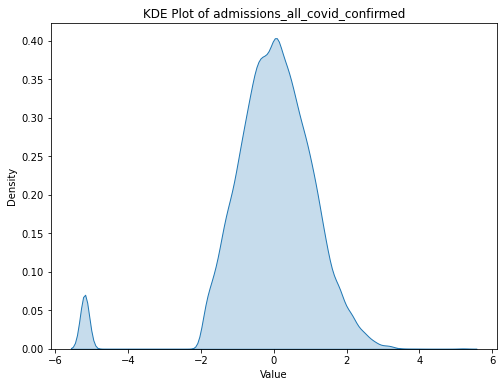

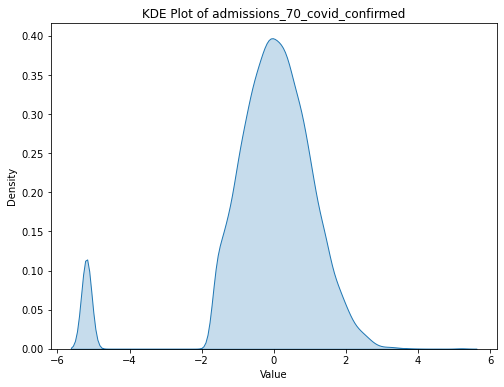

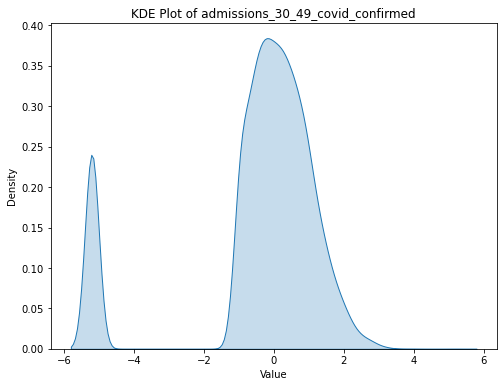

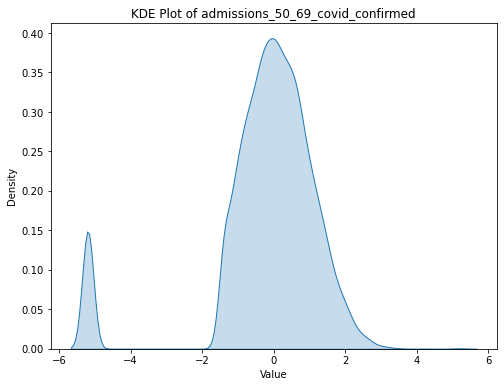

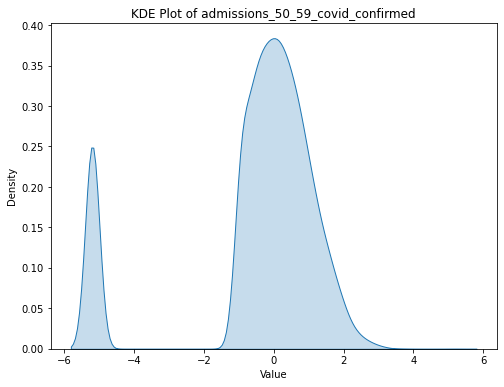

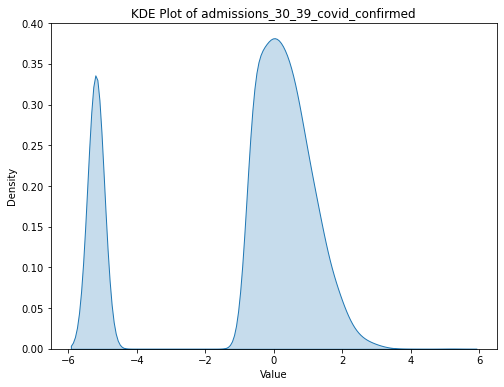

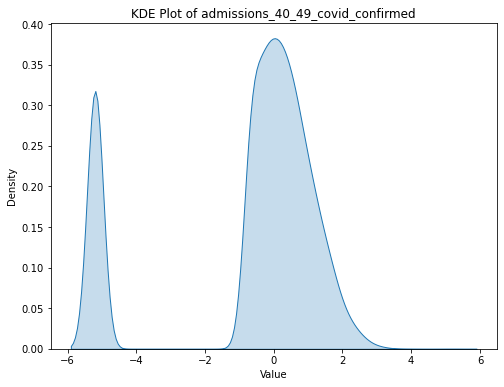

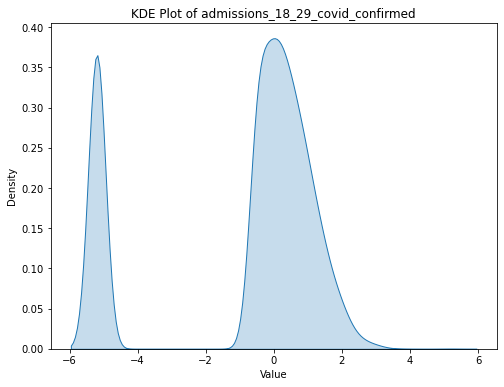

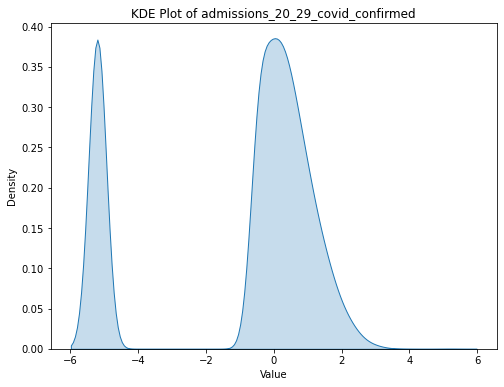

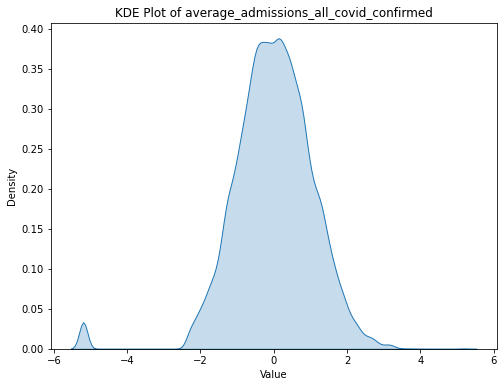

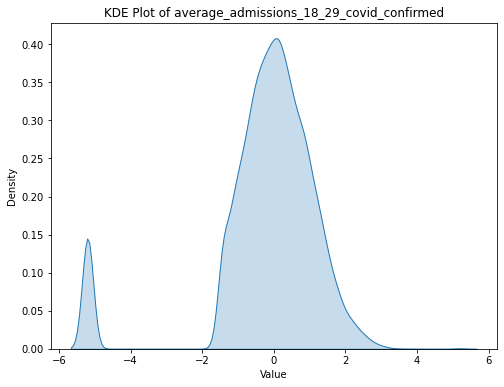

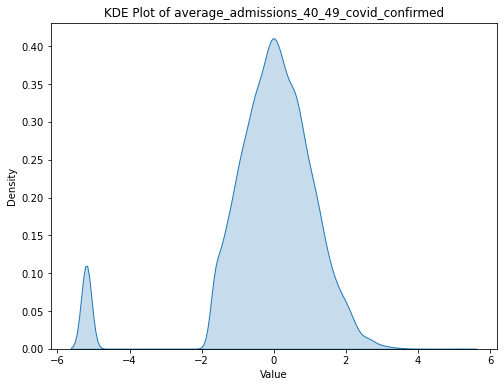

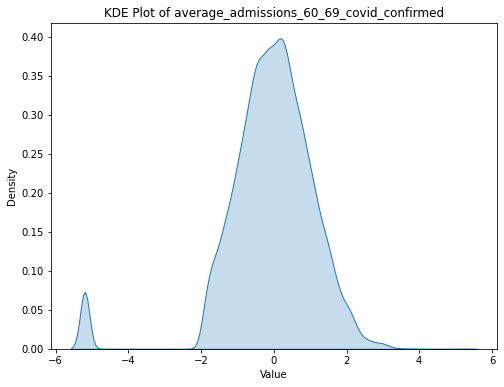

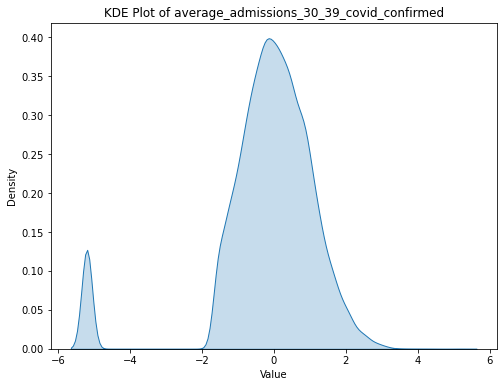

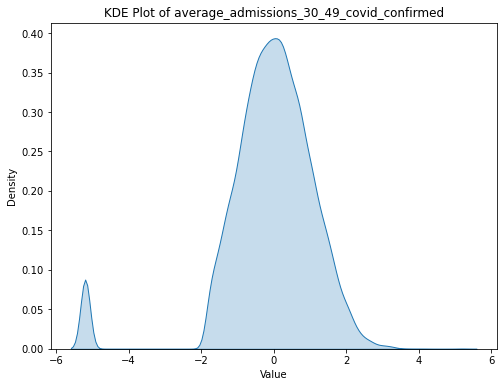

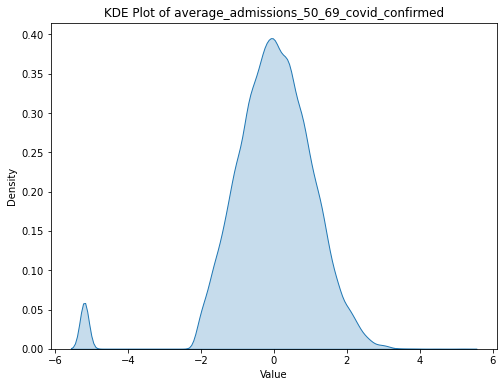

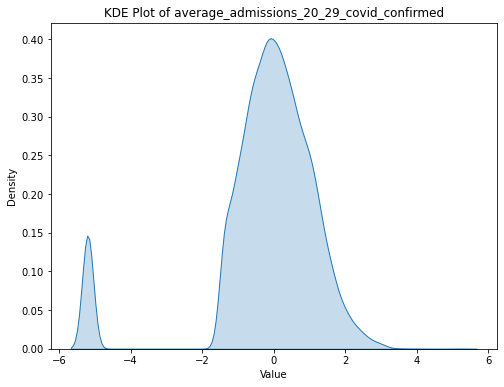

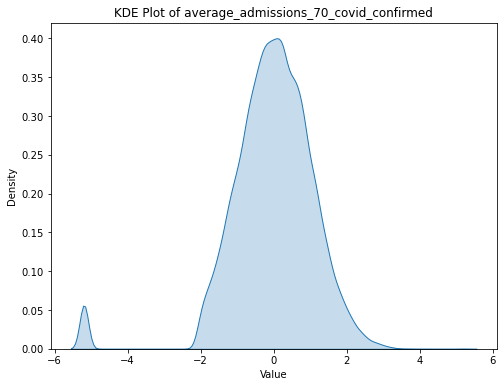

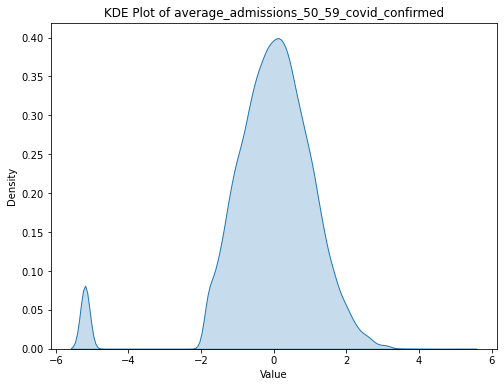

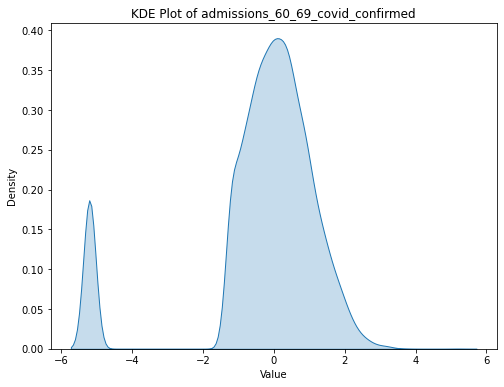

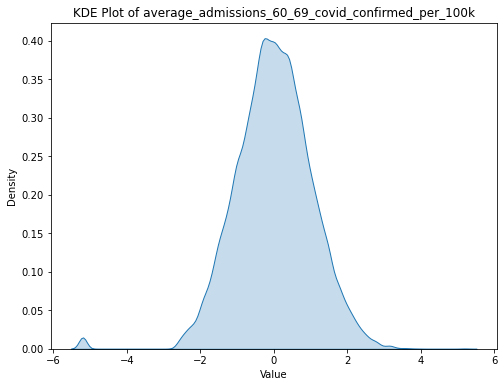

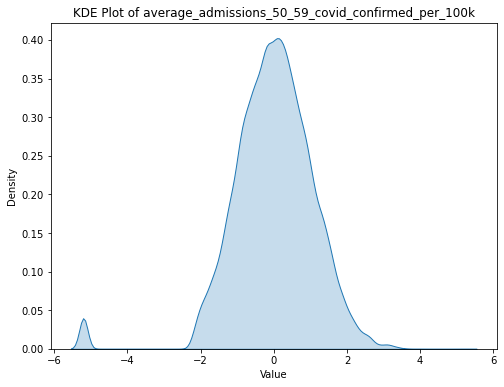

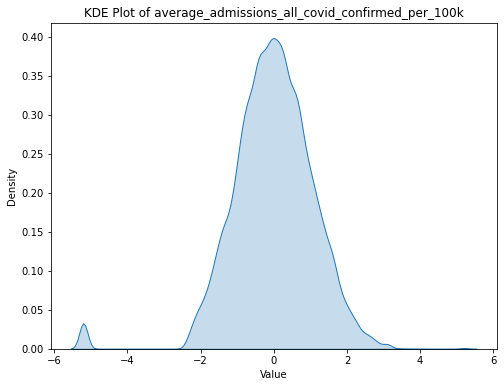

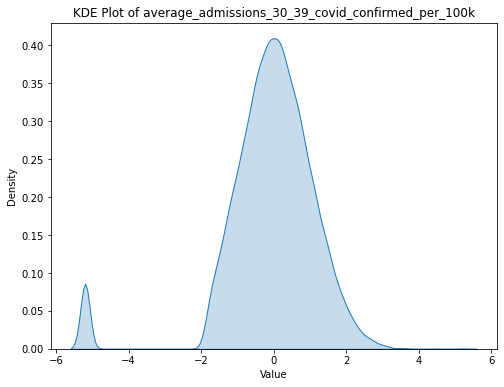

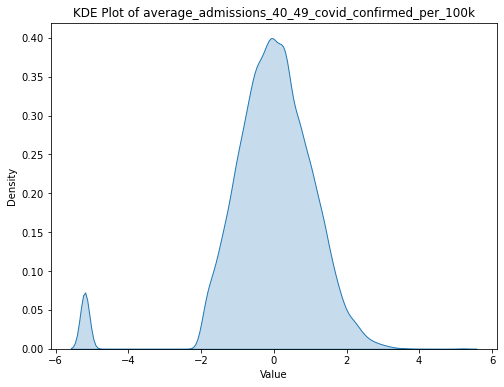

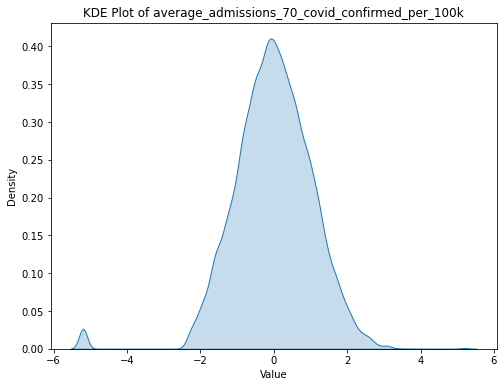

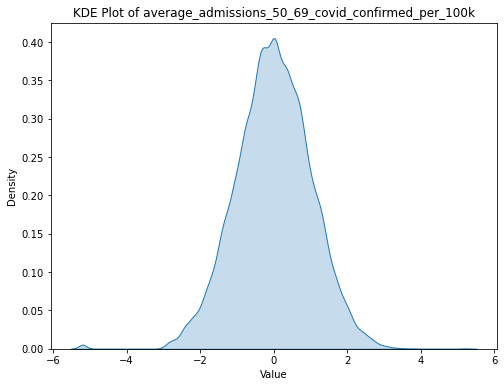

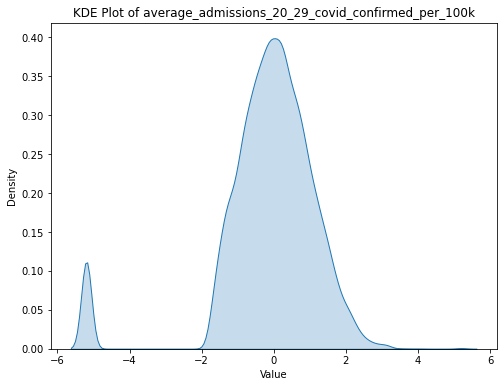

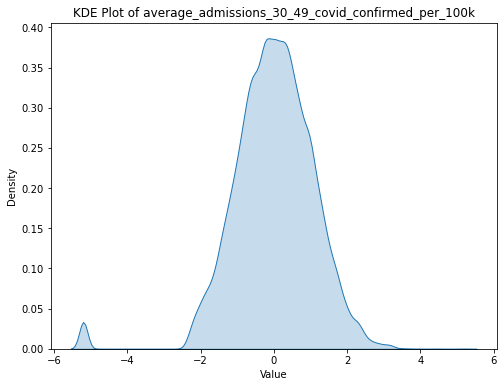

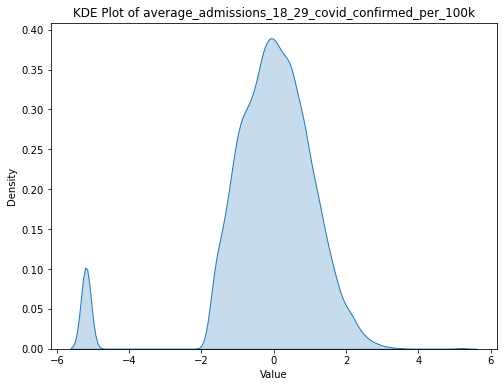

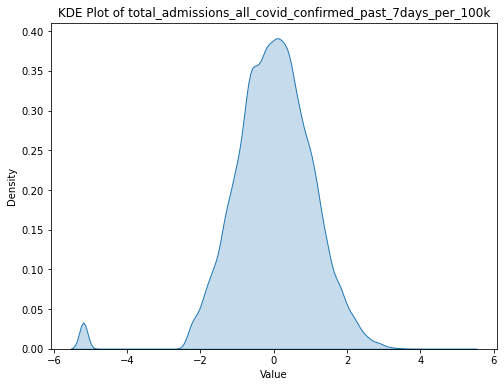

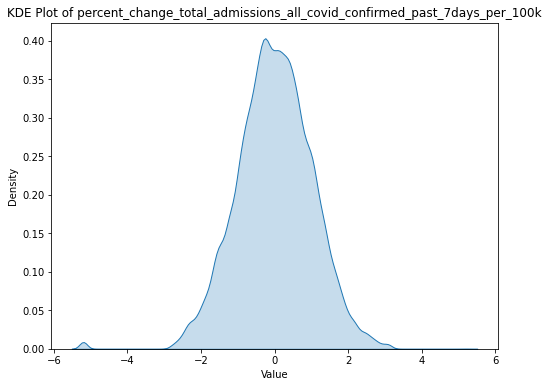

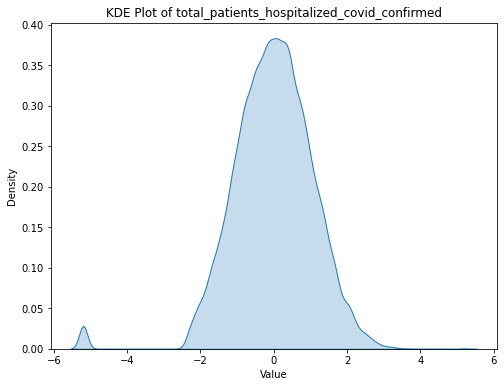

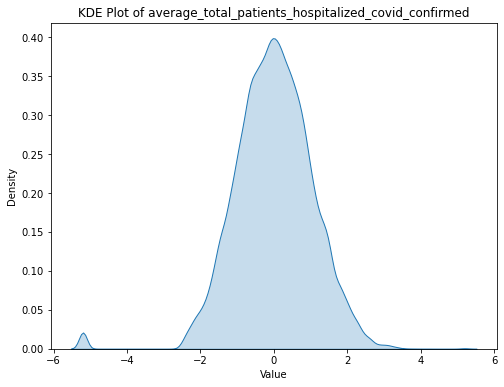

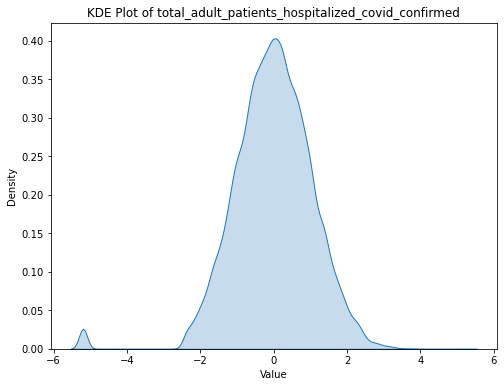

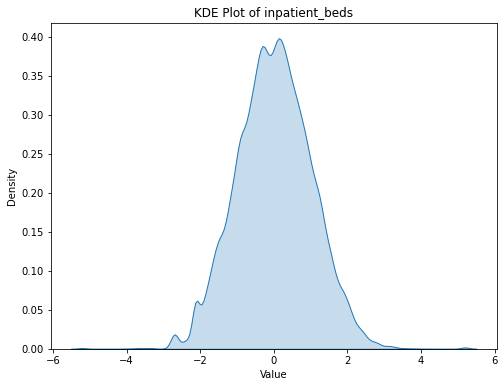

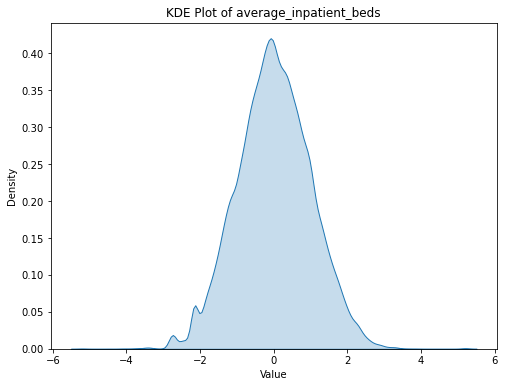

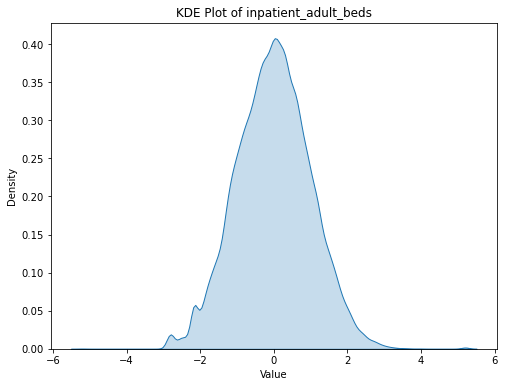

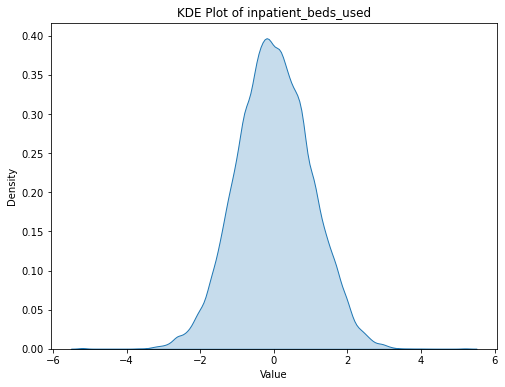

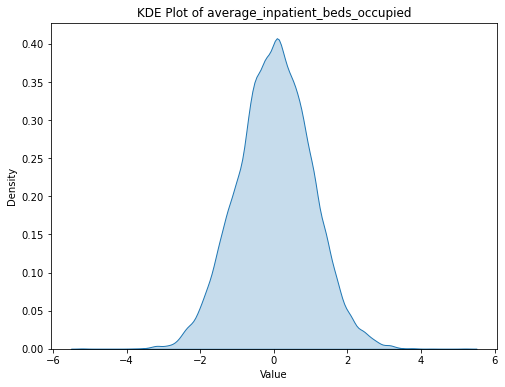

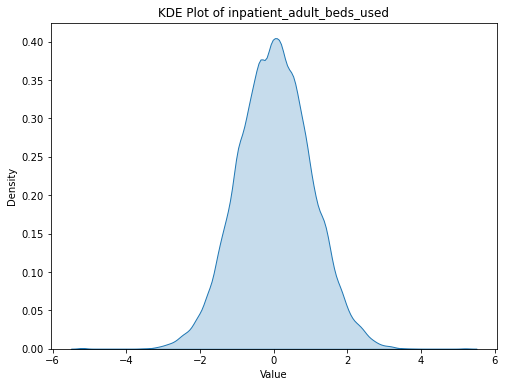

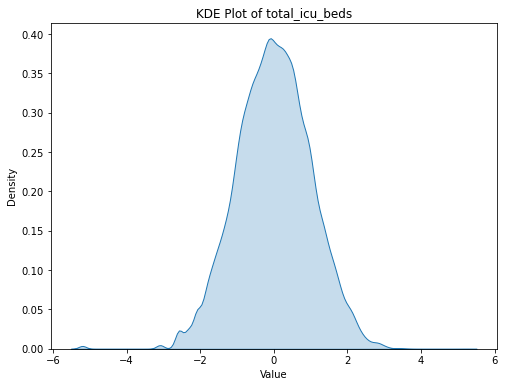

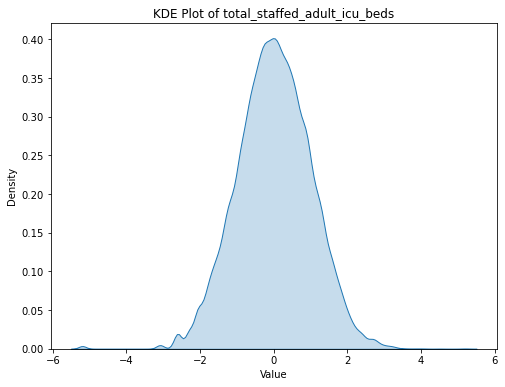

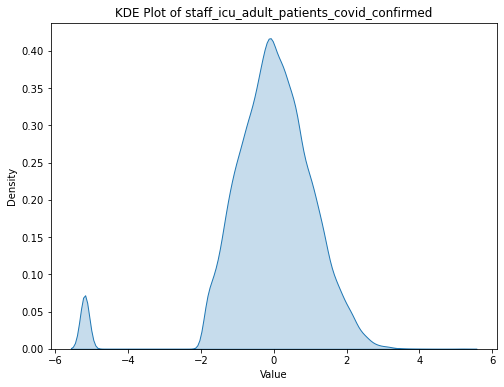

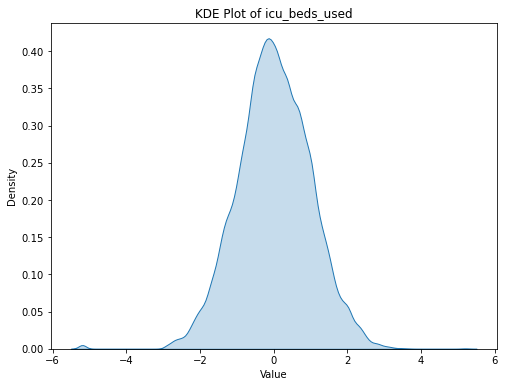

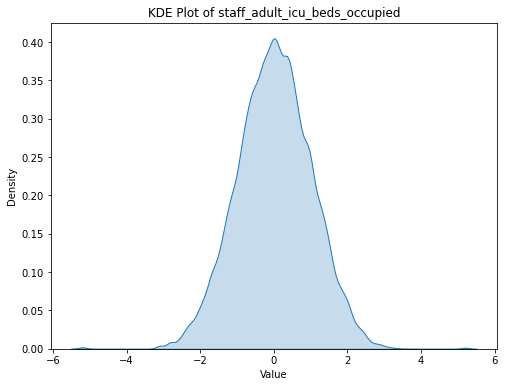

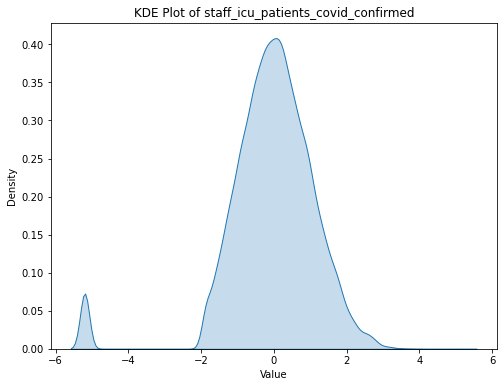

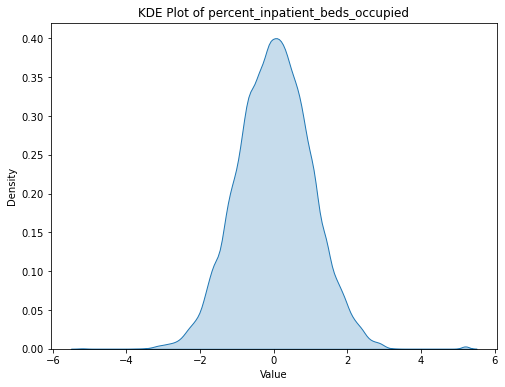

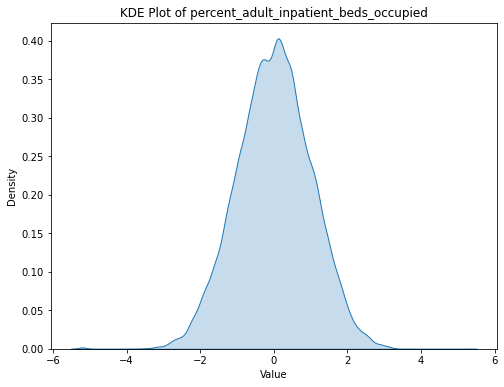

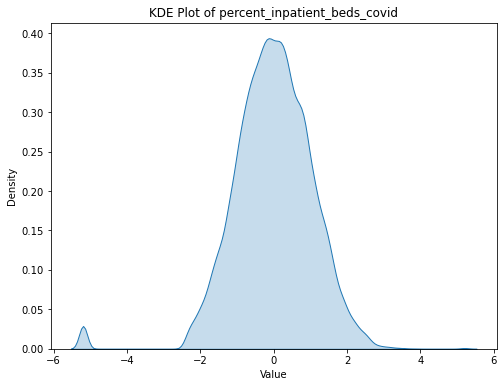

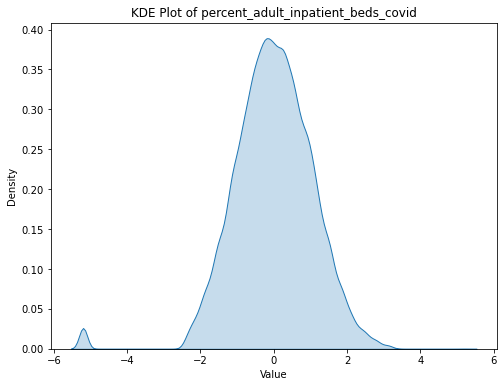

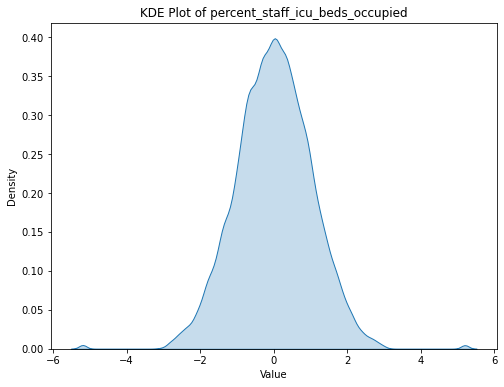

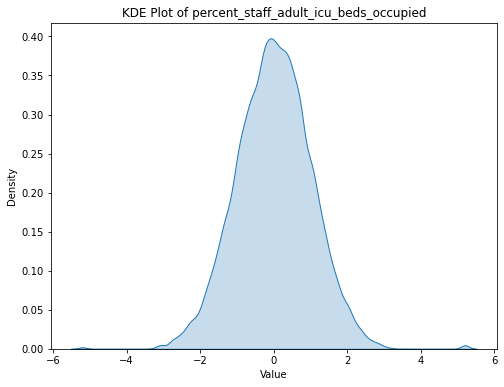

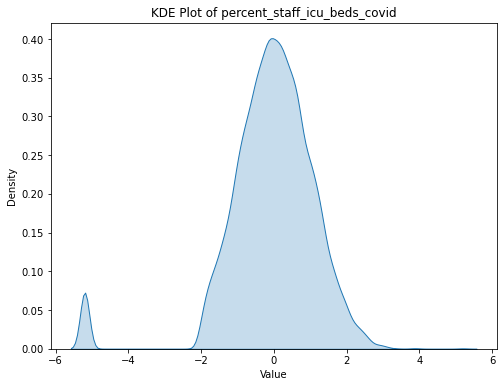

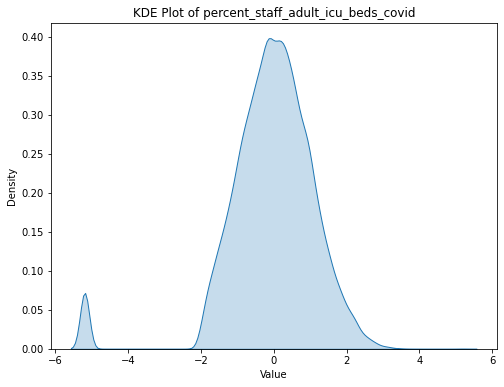

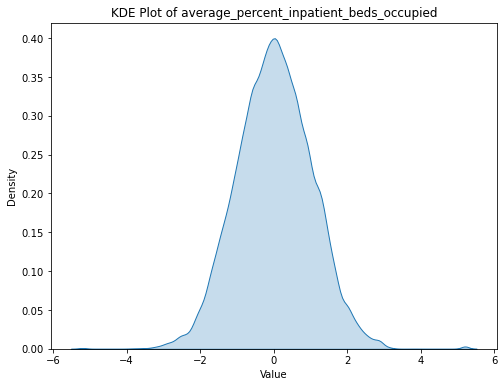

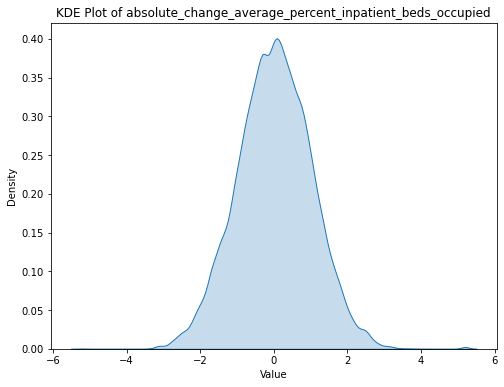

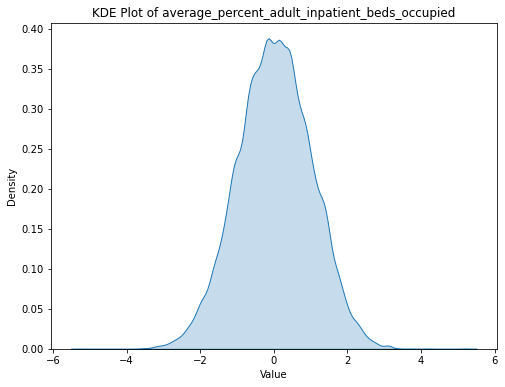

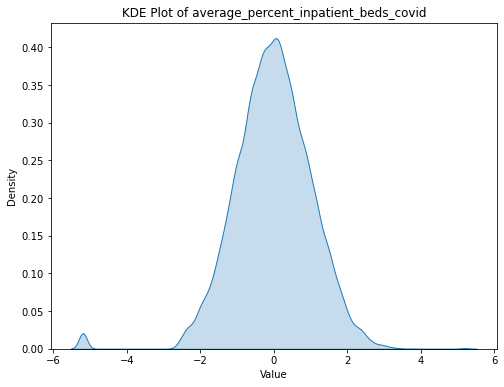

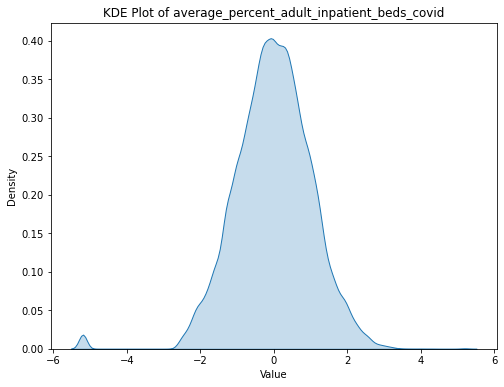

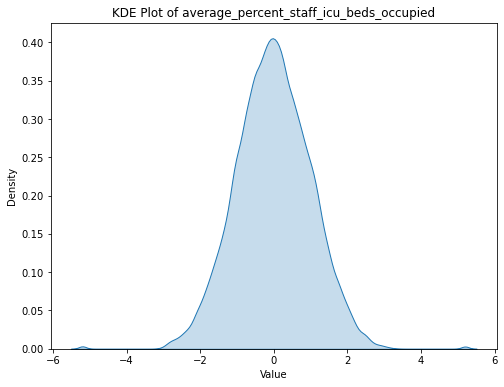

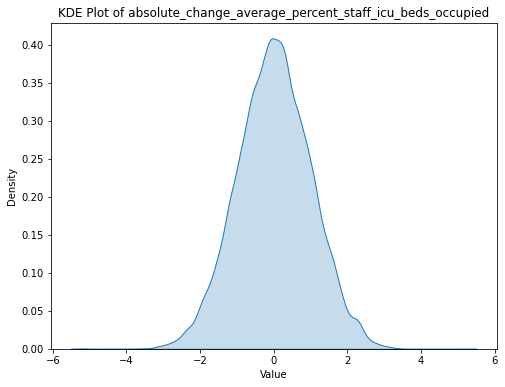

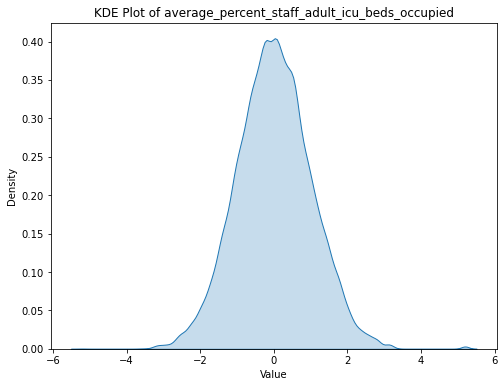

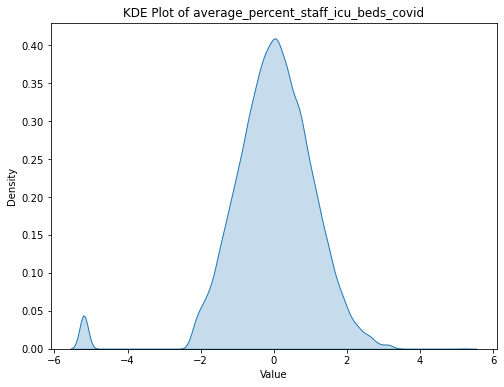

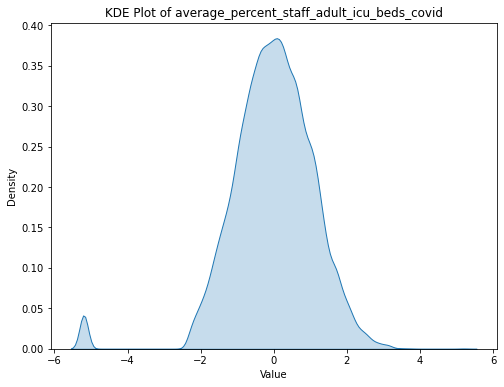

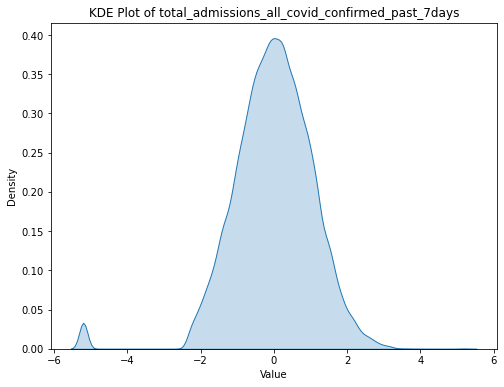

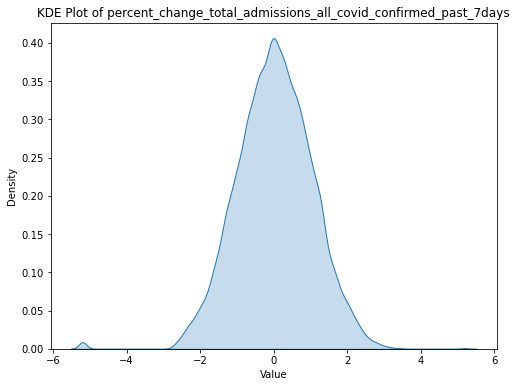

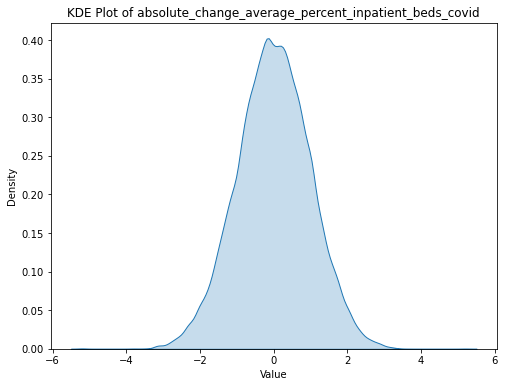

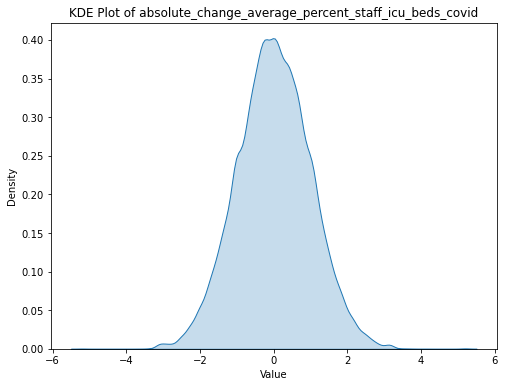

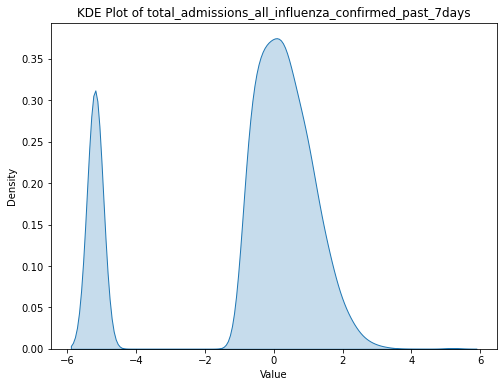

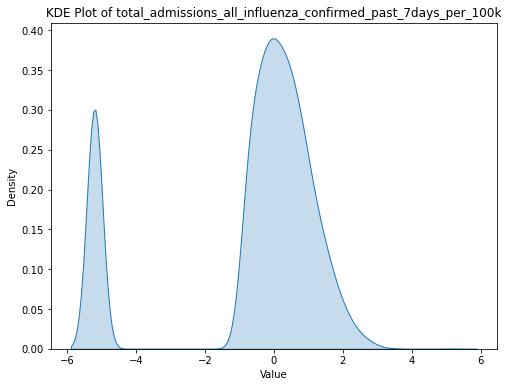

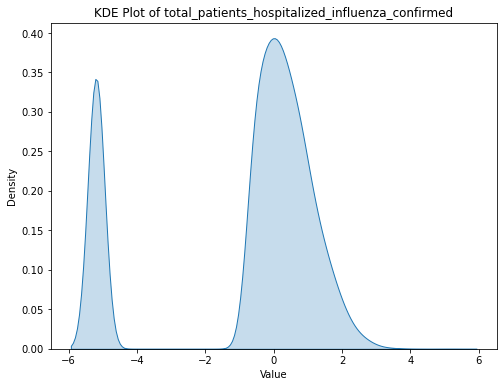

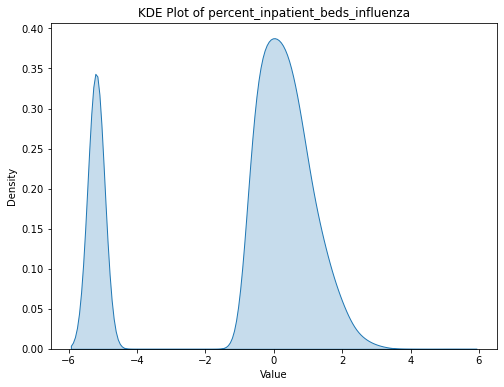

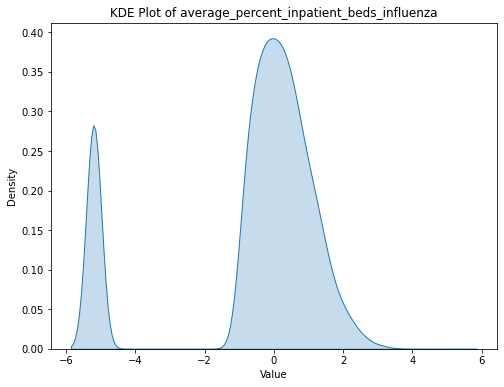

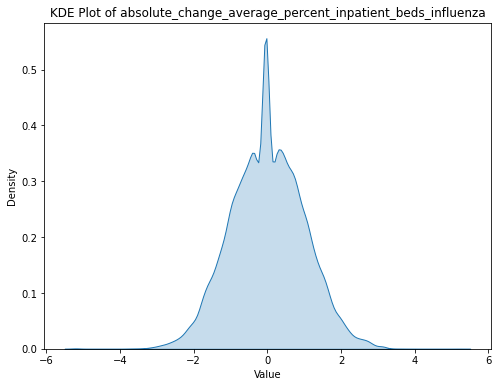

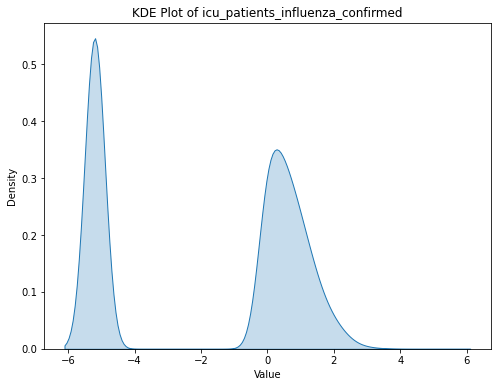

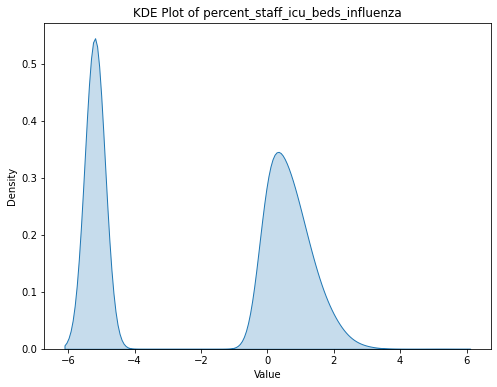

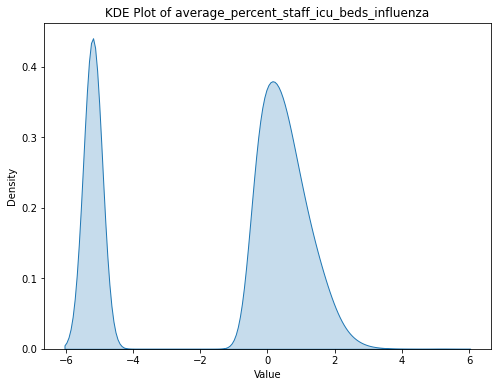

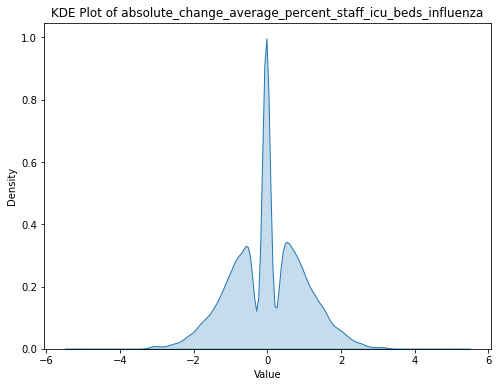

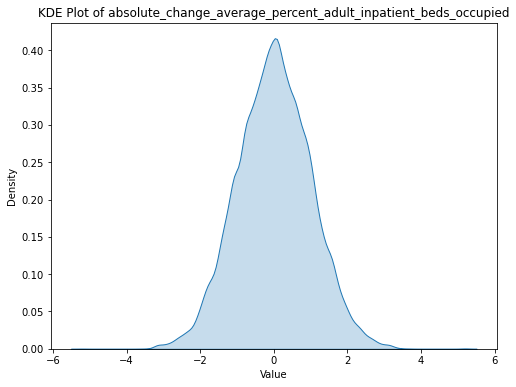

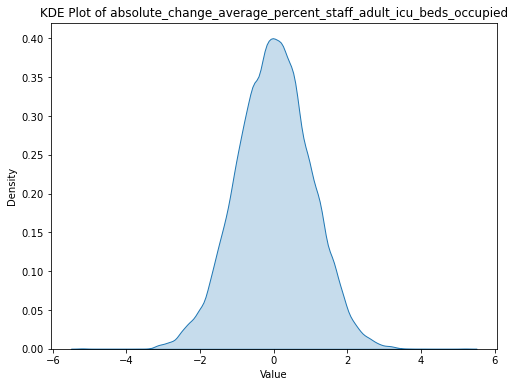

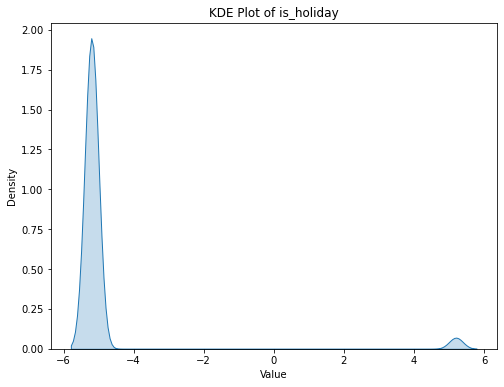

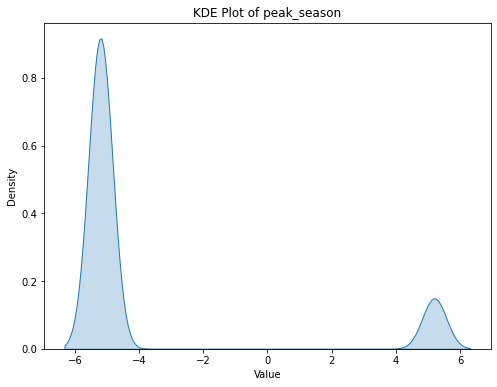

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'Jurisdiction' and 'collection_date' columns
df_filtered = transformed_df.drop(['jurisdiction','state' ,'collection_date'], axis=1)

# Iterate over each remaining column and create a KDE plot
for col in df_filtered.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.kdeplot(df_filtered[col].dropna(), shade=True)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()


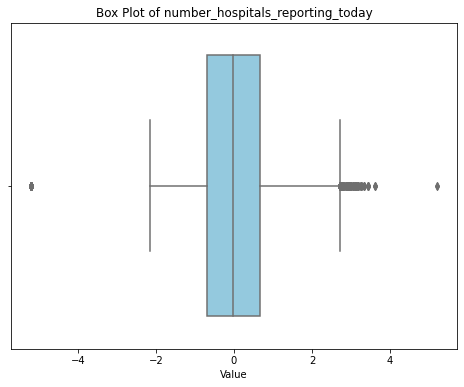

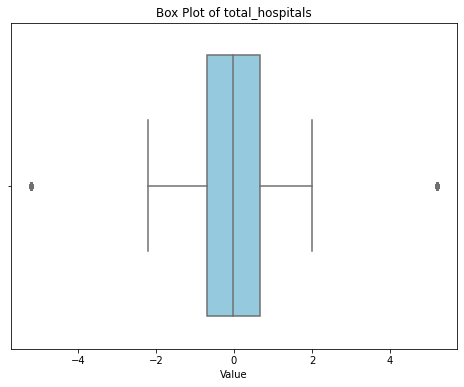

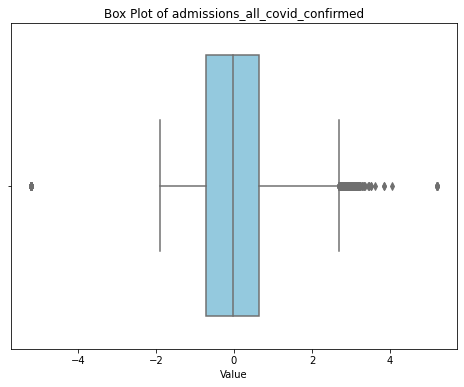

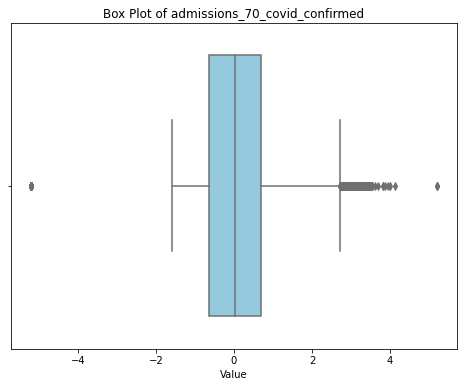

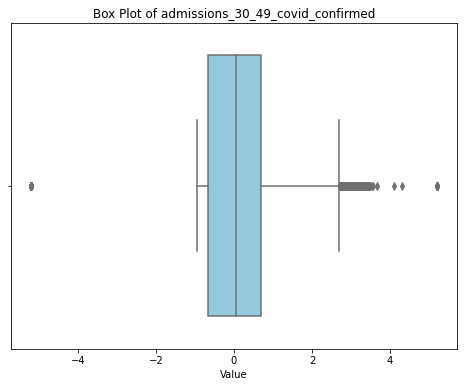

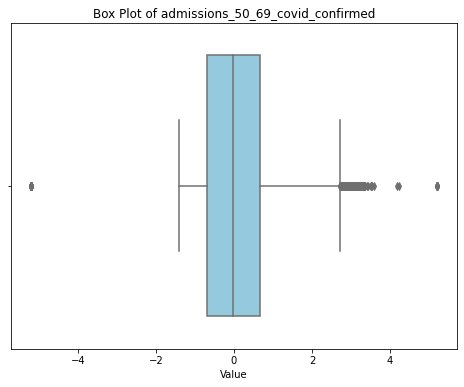

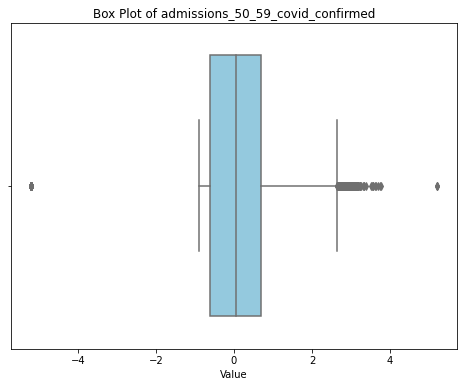

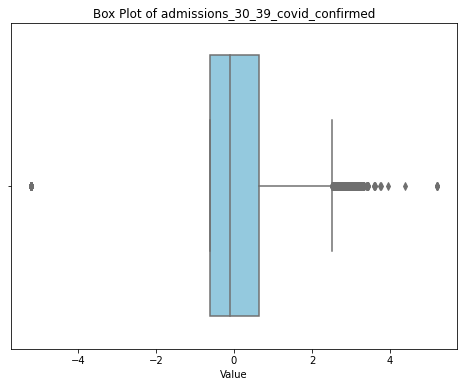

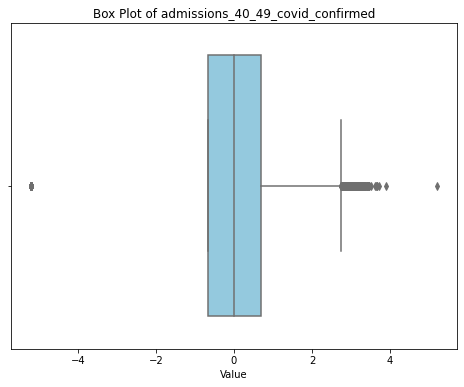

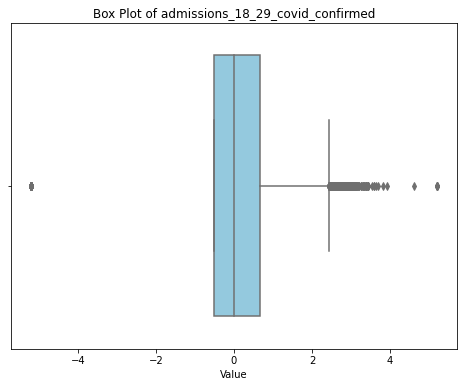

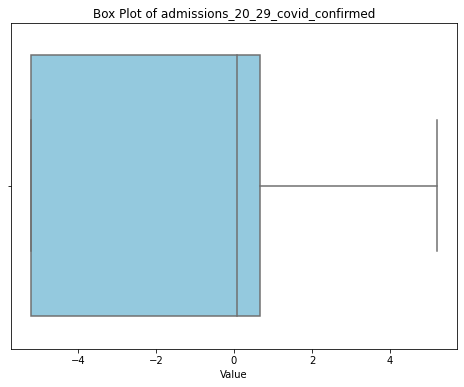

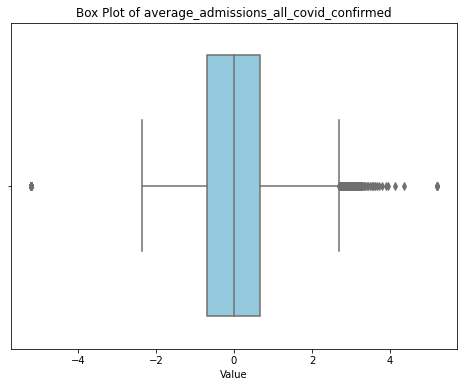

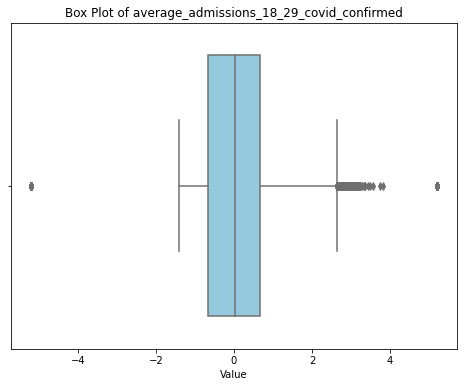

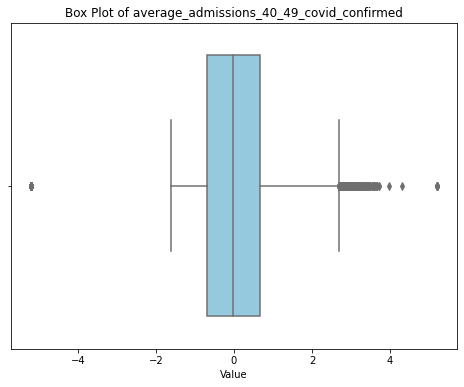

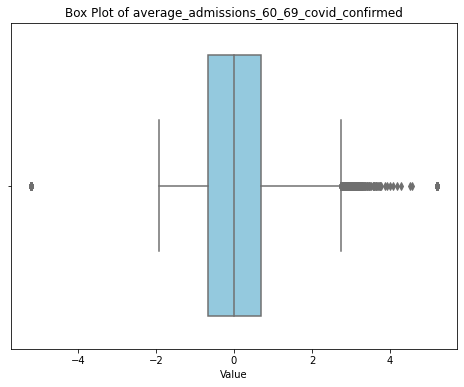

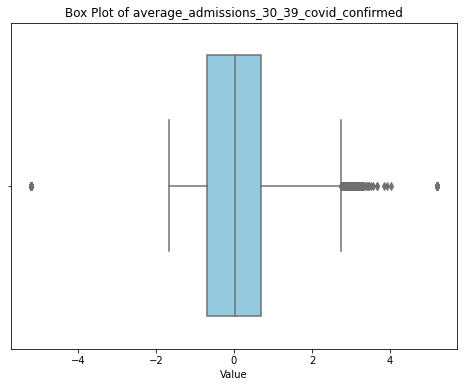

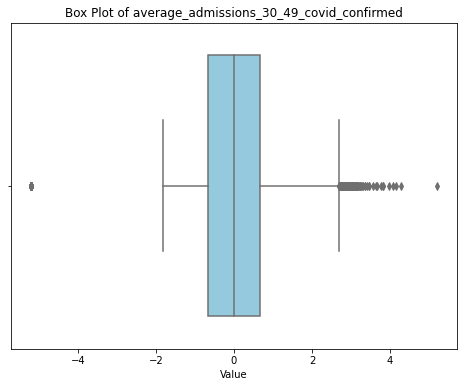

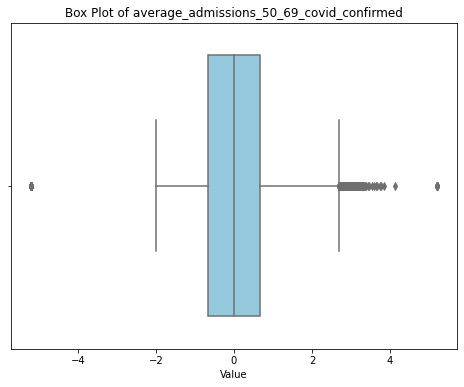

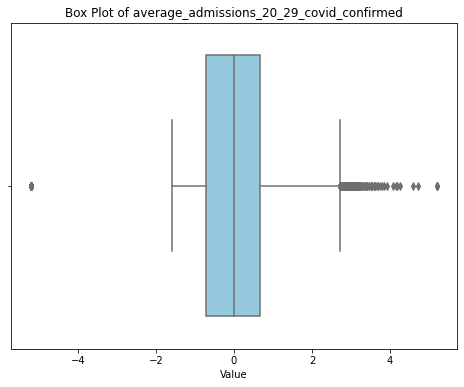

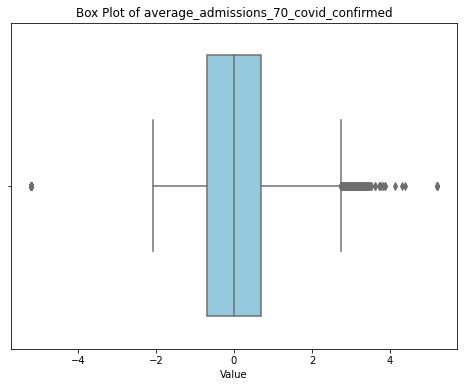

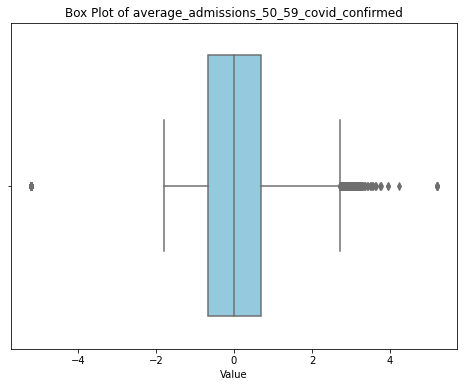

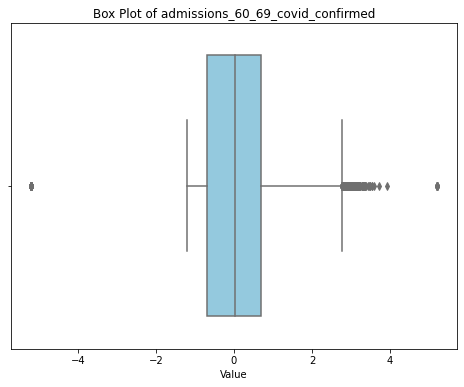

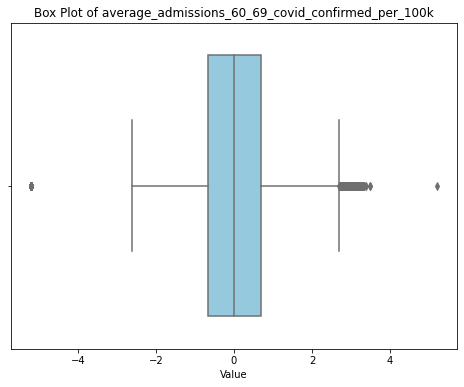

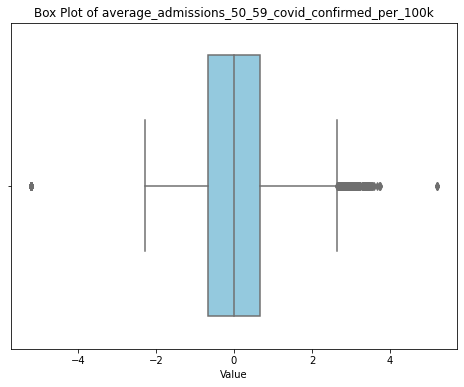

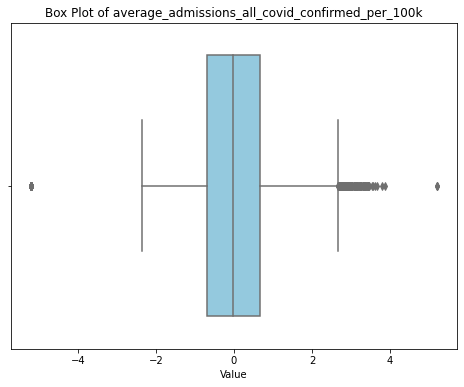

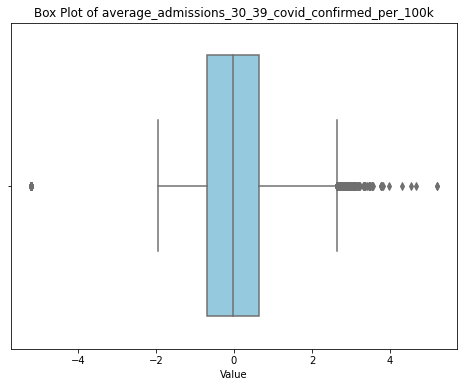

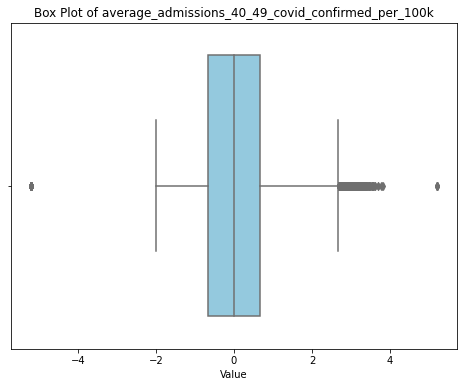

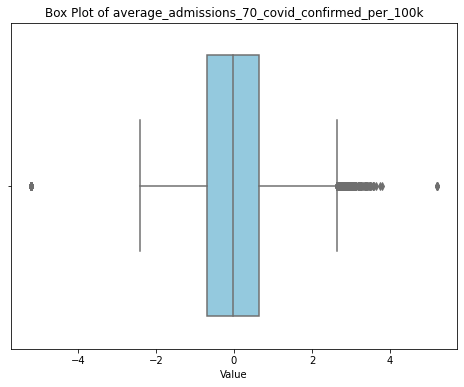

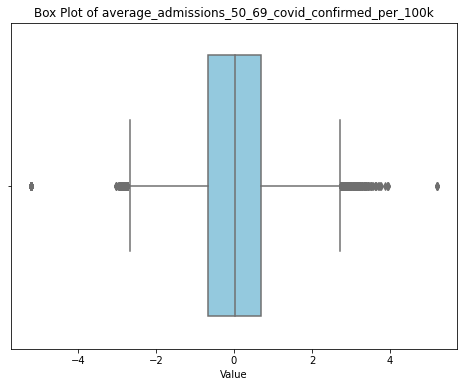

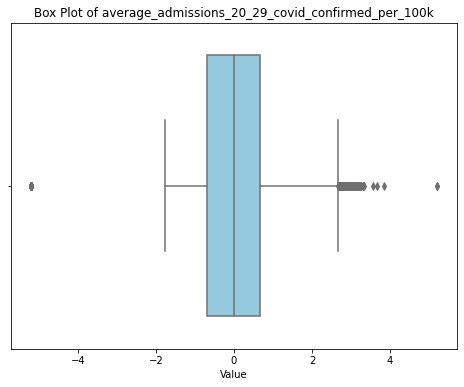

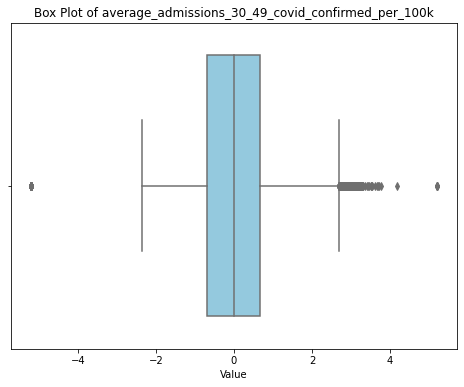

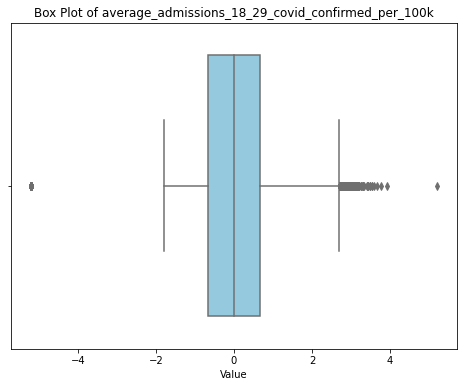

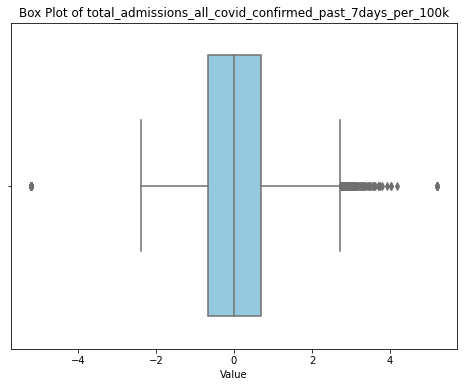

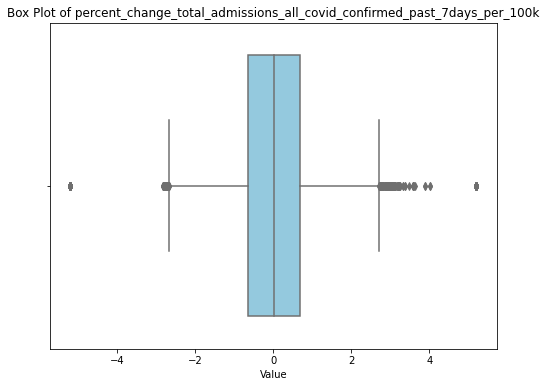

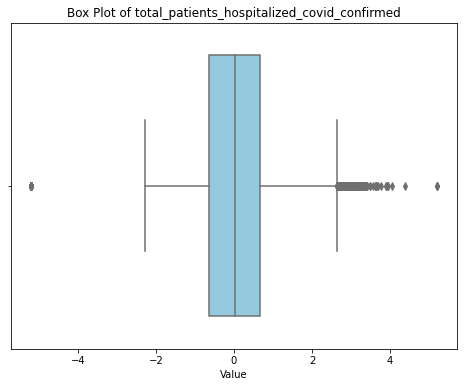

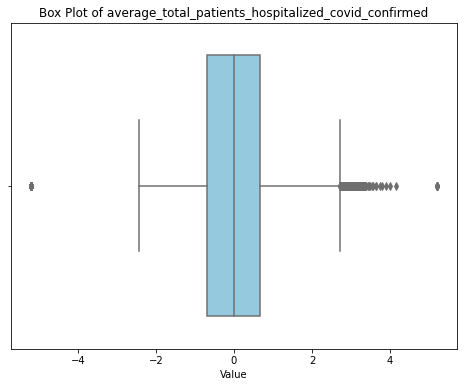

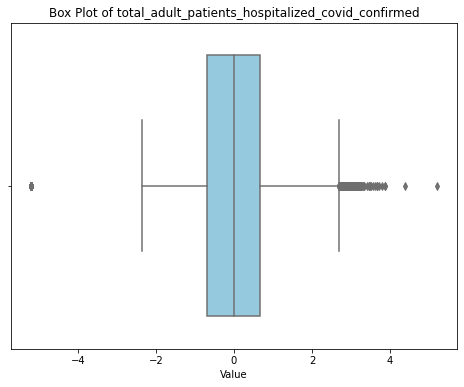

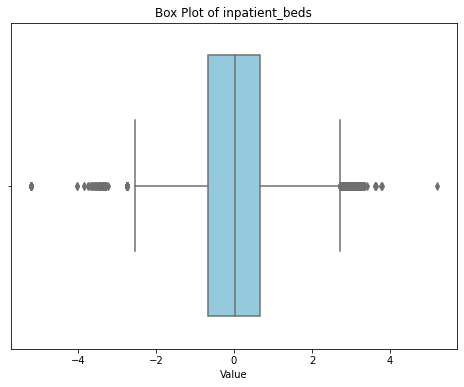

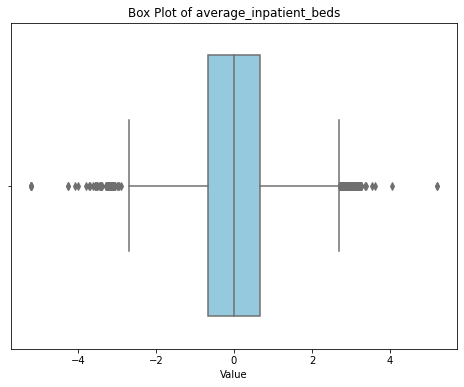

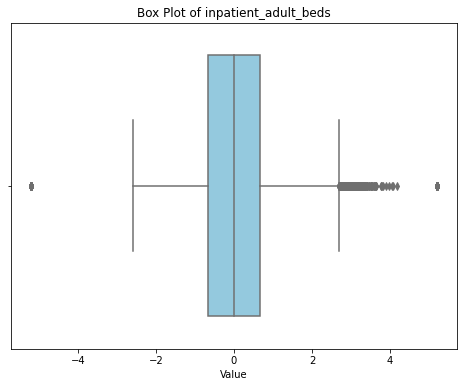

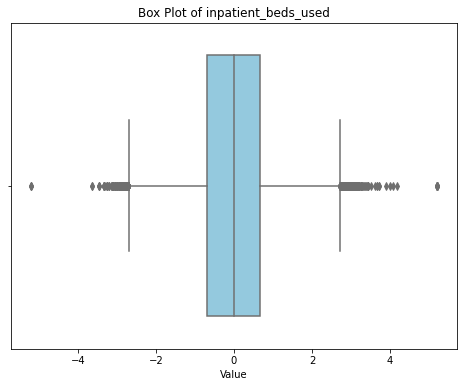

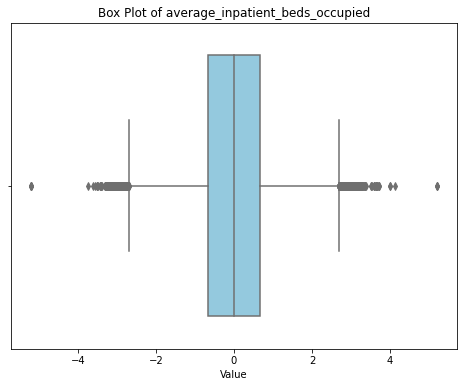

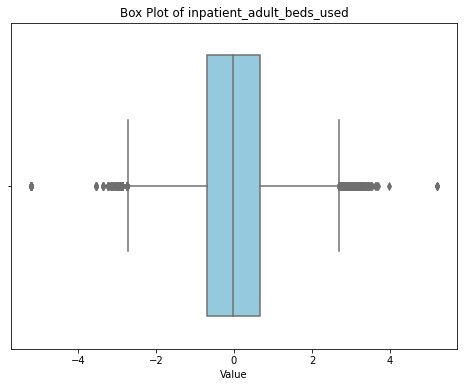

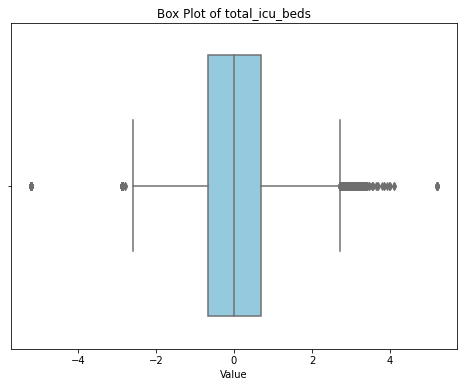

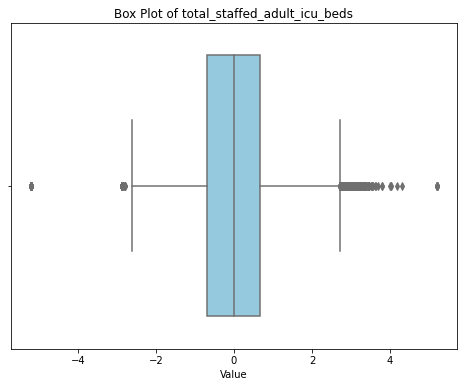

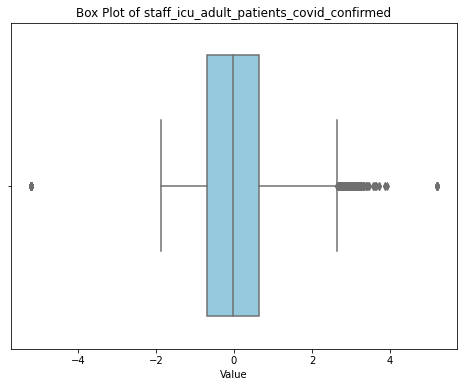

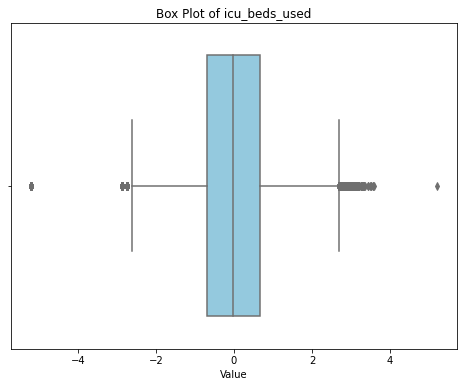

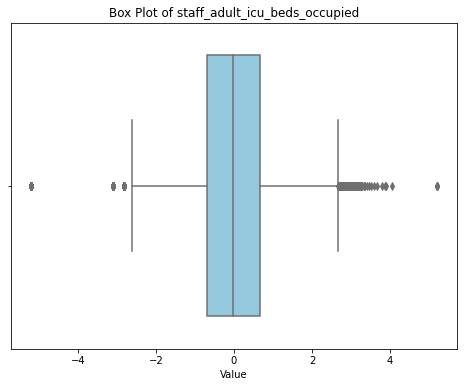

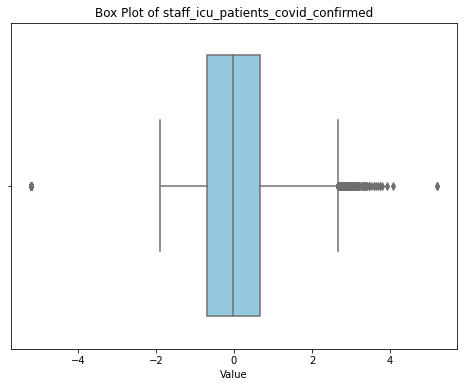

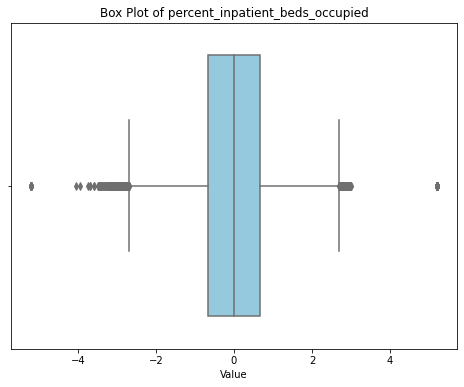

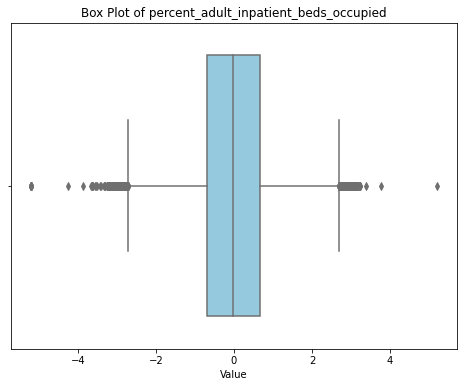

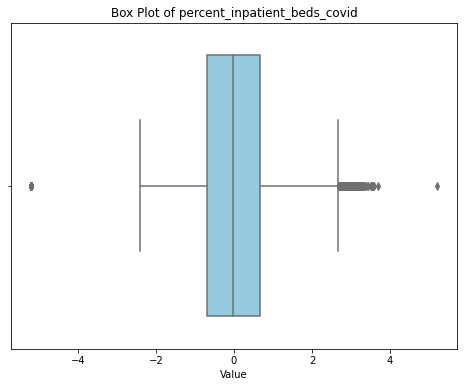

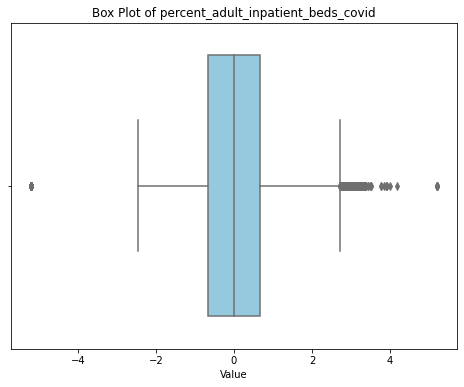

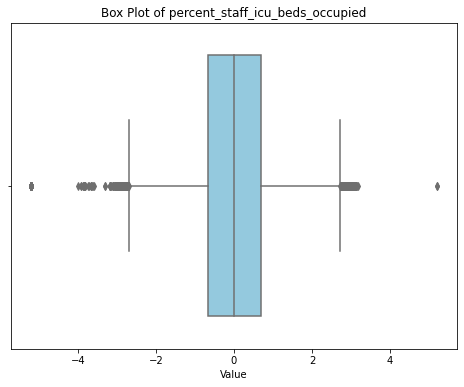

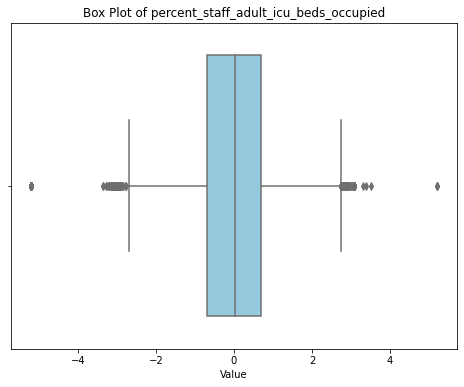

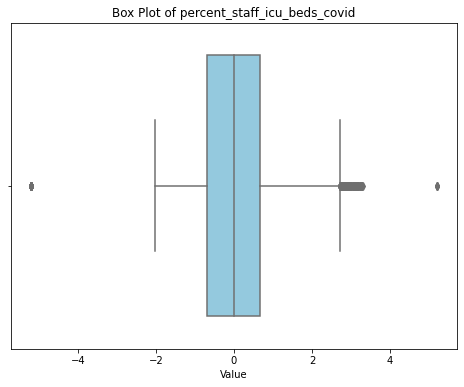

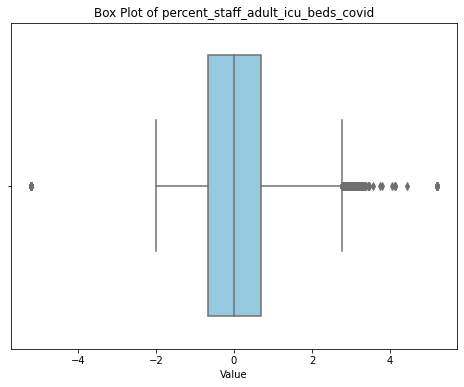

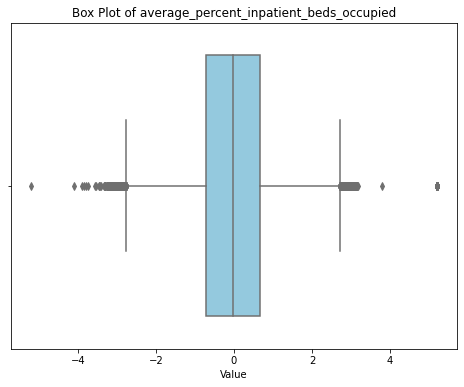

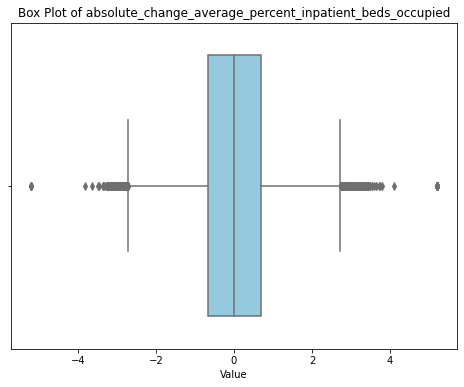

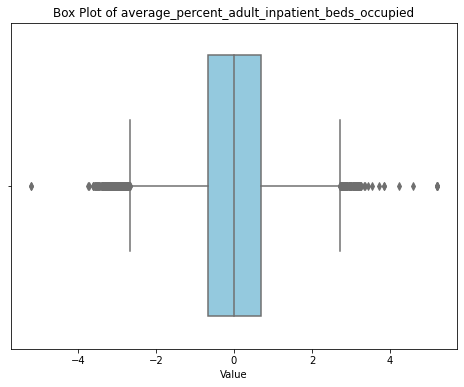

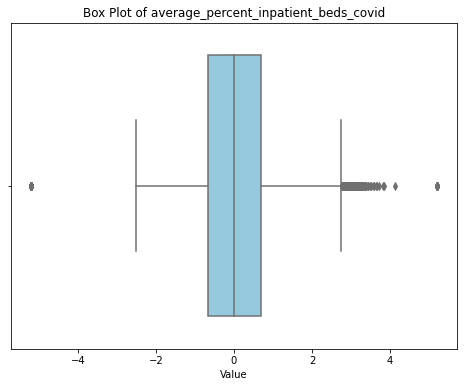

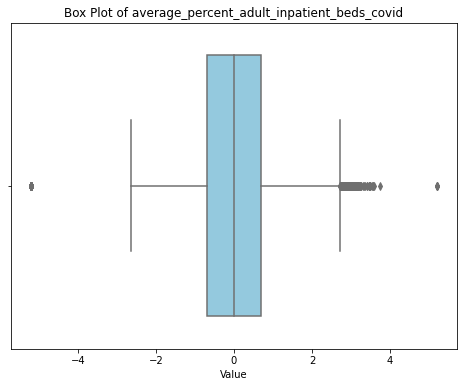

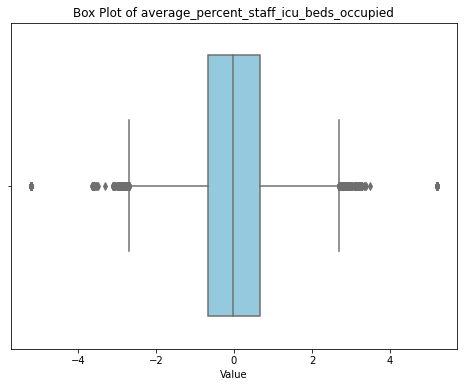

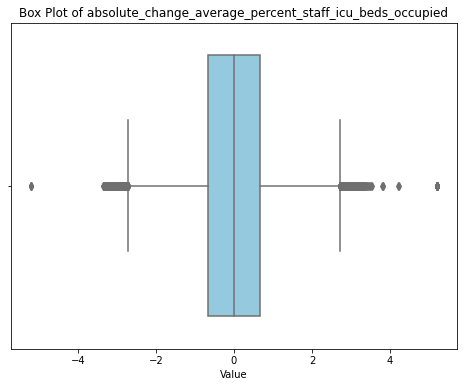

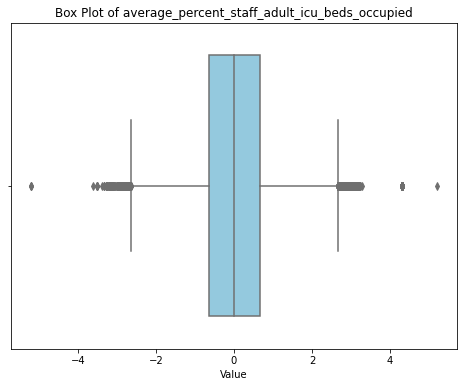

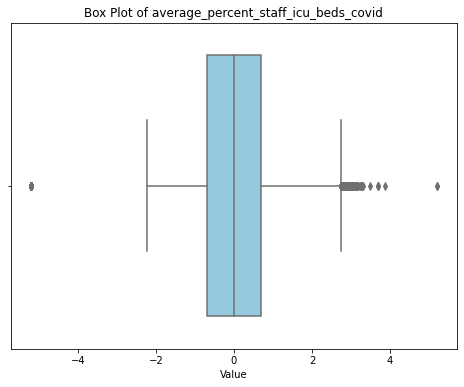

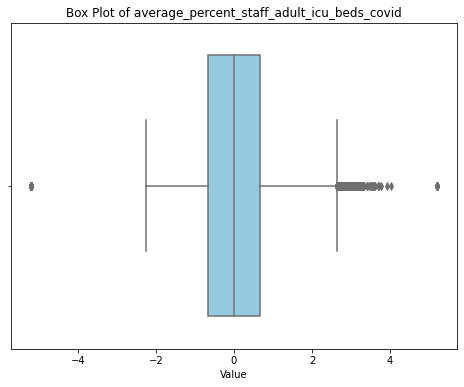

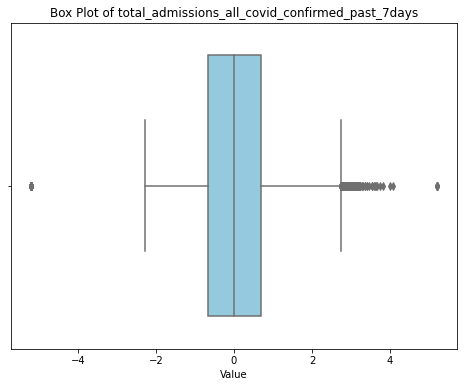

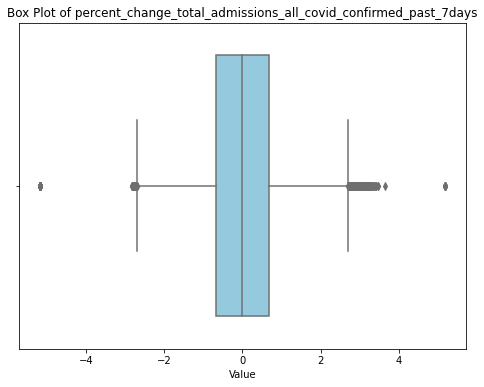

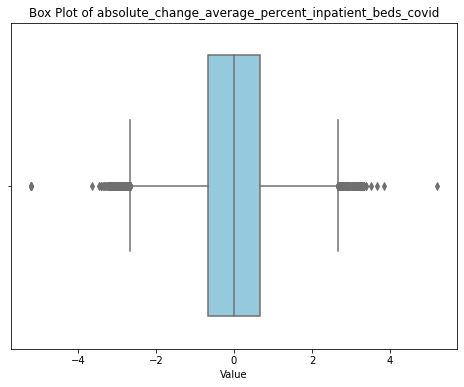

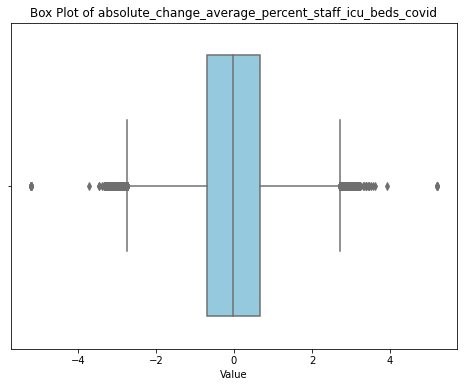

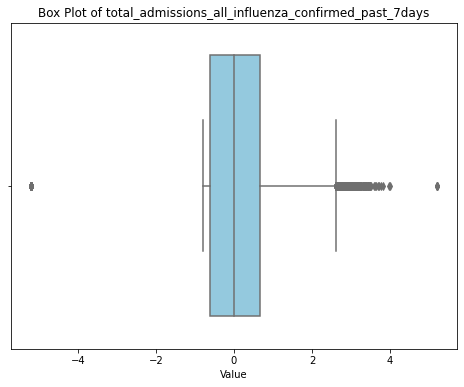

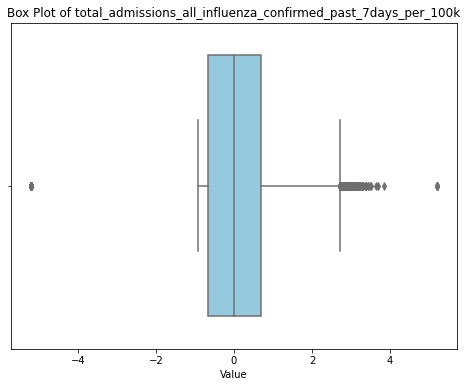

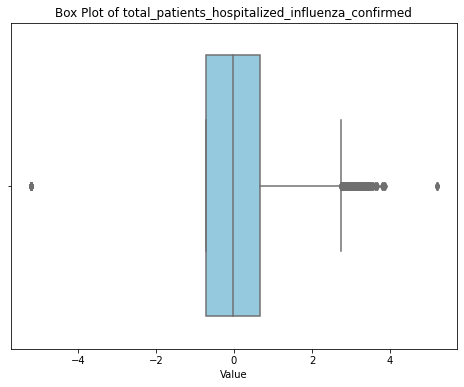

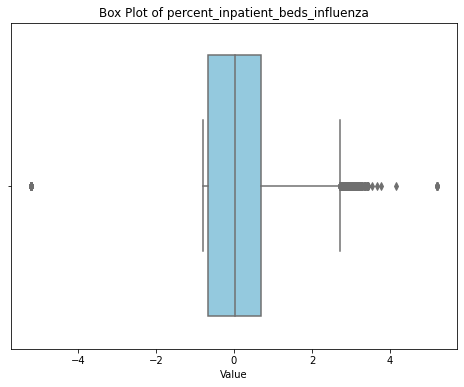

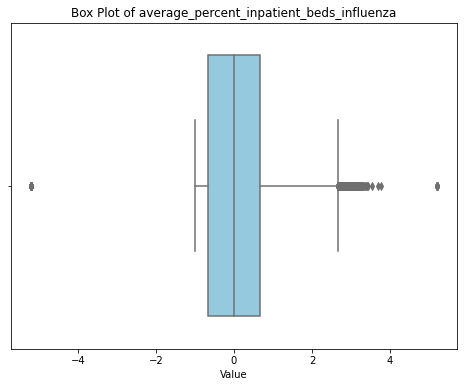

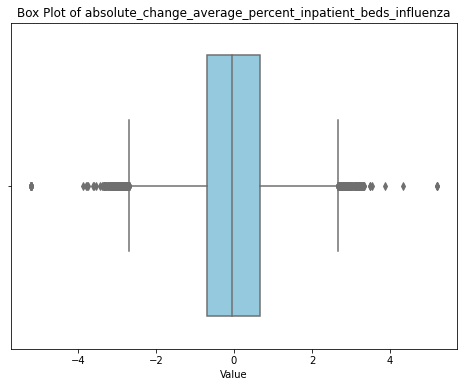

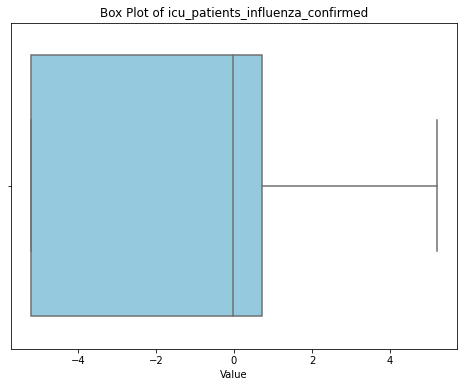

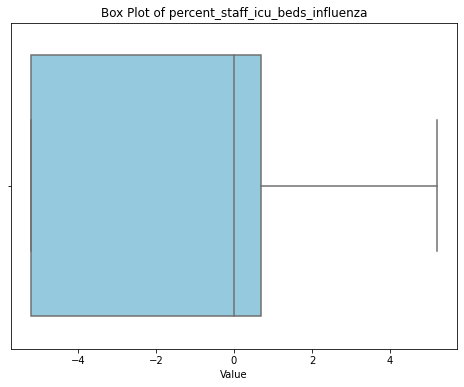

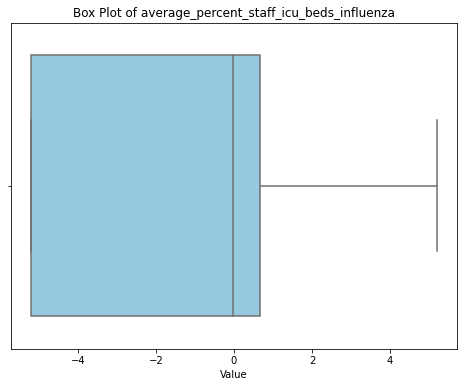

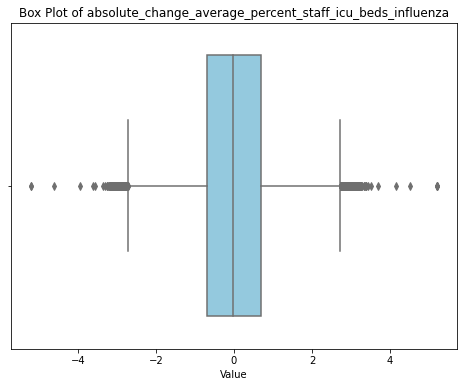

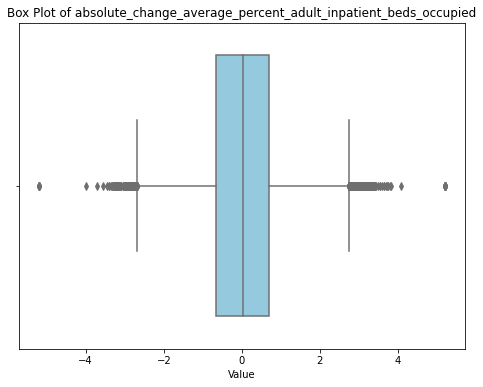

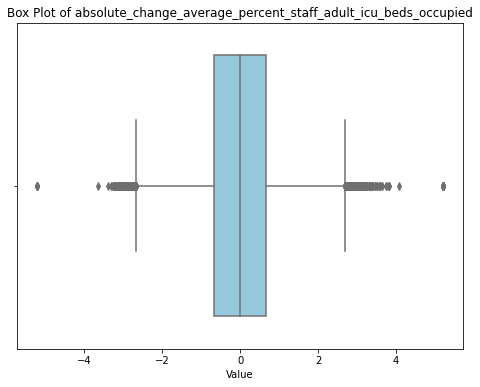

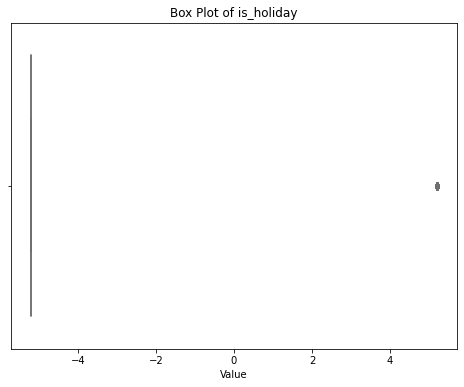

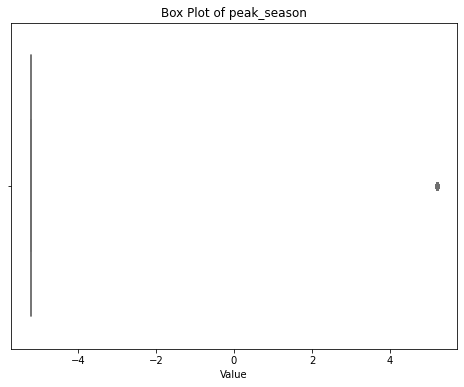

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Iterate over each remaining column and create a box plot
for col in df_filtered.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.boxplot(x=df_filtered[col].dropna(), color="skyblue")
    plt.title(f"Box Plot of {col}")
    plt.xlabel("Value")
    plt.show()


In [14]:
# Perform inverse transformation to get back to original scale
inverse_transformed_data = quantile_transformer.inverse_transform(transformed_data)

# Combine the inverse-transformed features with the first three columns
inverse_transformed_df = pd.concat([df.iloc[:, :3], pd.DataFrame(inverse_transformed_data, columns=df_features.columns)], axis=1)


C:\Users\aksho\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [15]:
inverse_transformed_df

jurisdiction    state collection_date  number_hospitals_reporting_today  \
0               AZ  Arizona      08-01-2020                              55.0   
1               AZ  Arizona      08-02-2020                              76.0   
2               AZ  Arizona      08-03-2020                              82.0   
3               AZ  Arizona      08-04-2020                              81.0   
4               AZ  Arizona      08-05-2020                              84.0   
...            ...      ...             ...                               ...   
83606           UT     Utah      13-02-2024                              50.0   
83607           UT     Utah      14-02-2024                              49.0   
83608           UT     Utah      15-02-2024                              49.0   
83609           UT     Utah      16-02-2024                              49.0   
83610           UT     Utah      17-02-2024                              49.0   

       total_hospitals  admissions_all_covid_confirmed  \
0                 95.0                            95.0   
1                 95.0                           124.0   
2                 95.0                           100.0   
3                 95.0                           121.0   
4                 95.0                           120.0   
...                ...                             ...   
83606             53.0                            18.0   
83607             53.0                            22.0   
83608             53.0                            17.0   
83609             53.0                             9.0   
83610             53.0                            13.0   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                               26.0                              16.0   
1                               29.0                              24.0   
2                               26.0                              21.0   
3                               32.0                              23.0   
4                               27.0                              28.0   
...                              ...                               ...   
83606                            8.0                               5.0   
83607                           10.0                               1.0   
83608                            8.0                               3.0   
83609                            3.0                               2.0   
83610                            6.0                               1.0   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                                  35.0                              16.0   
1                                  34.0                              12.0   
2                                  28.0                              14.0   
3                                  32.0                              12.0   
4                                  35.0                              14.0   
...                                 ...                               ...   
83606                               2.0                               0.0   
83607                               6.0                               3.0   
83608                               2.0                               1.0   
83609                               2.0                               1.0   
83610                               5.0                               2.0   

       ...  average_percent_inpatient_beds_influenza  \
0      ...                                  0.000000   
1      ...                                  0.000000   
2      ...                                  0.000000   
3      ...                                  0.000000   
4      ...                                  0.000000   
...    ...                                       ...   
83606  ...                                  0.347009   
83607  ...                                  0.361430   
83608  ...        

In [16]:
df

jurisdiction    state collection_date  number_hospitals_reporting_today  \
0               AZ  Arizona      08-01-2020                              55.0   
1               AZ  Arizona      08-02-2020                              76.0   
2               AZ  Arizona      08-03-2020                              82.0   
3               AZ  Arizona      08-04-2020                              81.0   
4               AZ  Arizona      08-05-2020                              84.0   
...            ...      ...             ...                               ...   
83606           UT     Utah      13-02-2024                              50.0   
83607           UT     Utah      14-02-2024                              49.0   
83608           UT     Utah      15-02-2024                              49.0   
83609           UT     Utah      16-02-2024                              49.0   
83610           UT     Utah      17-02-2024                              49.0   

       total_hospitals  admissions_all_covid_confirmed  \
0                 95.0                            95.0   
1                 95.0                           124.0   
2                 95.0                           100.0   
3                 95.0                           121.0   
4                 95.0                           120.0   
...                ...                             ...   
83606             53.0                            18.0   
83607             53.0                            22.0   
83608             53.0                            17.0   
83609             53.0                             9.0   
83610             53.0                            13.0   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                               26.0                              16.0   
1                               29.0                              24.0   
2                               26.0                              21.0   
3                               32.0                              23.0   
4                               27.0                              28.0   
...                              ...                               ...   
83606                            8.0                               5.0   
83607                           10.0                               1.0   
83608                            8.0                               3.0   
83609                            3.0                               2.0   
83610                            6.0                               1.0   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                                  35.0                              16.0   
1                                  34.0                              12.0   
2                                  28.0                              14.0   
3                                  32.0                              12.0   
4                                  35.0                              14.0   
...                                 ...                               ...   
83606                               2.0                               0.0   
83607                               6.0                               3.0   
83608                               2.0                               1.0   
83609                               2.0                               1.0   
83610                               5.0                               2.0   

       ...  average_percent_inpatient_beds_influenza  \
0      ...                                  0.000000   
1      ...                                  0.000000   
2      ...                                  0.000000   
3      ...                                  0.000000   
4      ...                                  0.000000   
...    ...                                       ...   
83606  ...                                  0.347009   
83607  ...                                  0.361430   
83608  ...        

In [19]:
transformed_df

jurisdiction    state collection_date  number_hospitals_reporting_today  \
0               AZ  Arizona      08-01-2020                         -0.517790   
1               AZ  Arizona      08-02-2020                         -0.254038   
2               AZ  Arizona      08-03-2020                         -0.244548   
3               AZ  Arizona      08-04-2020                         -0.247134   
4               AZ  Arizona      08-05-2020                         -0.238089   
...            ...      ...             ...                               ...   
83606           UT     Utah      13-02-2024                         -0.639462   
83607           UT     Utah      14-02-2024                         -0.665852   
83608           UT     Utah      15-02-2024                         -0.665852   
83609           UT     Utah      16-02-2024                         -0.665852   
83610           UT     Utah      17-02-2024                         -0.665852   

       total_hospitals  admissions_all_covid_confirmed  \
0            -0.101796                        0.313694   
1            -0.101796                        0.475214   
2            -0.101796                        0.345485   
3            -0.101796                        0.462610   
4            -0.101796                        0.458426   
...                ...                             ...   
83606        -0.618059                       -0.664287   
83607        -0.618059                       -0.549616   
83608        -0.618059                       -0.697507   
83609        -0.618059                       -1.072973   
83610        -0.618059                       -0.860725   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                           0.027604                          0.429351   
1                           0.101796                          0.667419   
2                           0.027604                          0.589456   
3                           0.166367                          0.639462   
4                           0.050204                          0.761353   
...                              ...                               ...   
83606                      -0.648724                         -0.231641   
83607                      -0.523537                         -0.959440   
83608                      -0.648724                         -0.478025   
83609                      -1.169401                         -0.668987   
83610                      -0.809168                         -0.959440   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                              0.439001                          0.475214   
1                              0.422483                          0.312376   
2                              0.303168                          0.401995   
3                              0.383024                          0.312376   
4                              0.439001                          0.401995   
...                                 ...                               ...   
83606                         -1.116369                         -5.199338   
83607                         -0.571638                         -0.443149   
83608                         -1.116369                         -0.939747   
83609                         -1.116369                         -0.939747   
83610                         -0.670557                         -0.641002   

       ...  average_percent_inpatient_beds_influenza  \
0      ...                                 -5.199338   
1      ...                                 -5.199338   
2      ...                                 -5.199338   
3      ...                                 -5.199338   
4      ...                                 -5.199338   
...    ...                                       ...   
83606  ...                                  0.964736   
83607  ...                                  0.983374   
83608  ...        

In [17]:
from sklearn.preprocessing import RobustScaler

# Exclude the first three columns
df_features = df.iloc[:, 3:]

# Instantiate the RobustScaler object
robust_scaler = RobustScaler()

# Fit and transform the data
scaled_data = robust_scaler.fit_transform(df_features)

# Combine the scaled features with the first three columns
scaled_df = pd.concat([df.iloc[:, :3], pd.DataFrame(scaled_data, columns=df_features.columns)], axis=1)


In [18]:
scaled_df

jurisdiction    state collection_date  number_hospitals_reporting_today  \
0               AZ  Arizona      08-01-2020                         -0.328244   
1               AZ  Arizona      08-02-2020                         -0.167939   
2               AZ  Arizona      08-03-2020                         -0.122137   
3               AZ  Arizona      08-04-2020                         -0.129771   
4               AZ  Arizona      08-05-2020                         -0.106870   
...            ...      ...             ...                               ...   
83606           UT     Utah      13-02-2024                         -0.366412   
83607           UT     Utah      14-02-2024                         -0.374046   
83608           UT     Utah      15-02-2024                         -0.374046   
83609           UT     Utah      16-02-2024                         -0.374046   
83610           UT     Utah      17-02-2024                         -0.374046   

       total_hospitals  admissions_all_covid_confirmed  \
0            -0.035714                        0.238710   
1            -0.035714                        0.425806   
2            -0.035714                        0.270968   
3            -0.035714                        0.406452   
4            -0.035714                        0.400000   
...                ...                             ...   
83606        -0.335714                       -0.258065   
83607        -0.335714                       -0.232258   
83608        -0.335714                       -0.264516   
83609        -0.335714                       -0.316129   
83610        -0.335714                       -0.290323   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                           0.015152                          0.347826   
1                           0.060606                          0.695652   
2                           0.015152                          0.565217   
3                           0.106061                          0.652174   
4                           0.030303                          0.869565   
...                              ...                               ...   
83606                      -0.257576                         -0.130435   
83607                      -0.227273                         -0.304348   
83608                      -0.257576                         -0.217391   
83609                      -0.333333                         -0.260870   
83610                      -0.287879                         -0.304348   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                              0.367347                              0.45   
1                              0.346939                              0.25   
2                              0.224490                              0.35   
3                              0.306122                              0.25   
4                              0.367347                              0.35   
...                                 ...                               ...   
83606                         -0.306122                             -0.35   
83607                         -0.224490                             -0.20   
83608                         -0.306122                             -0.30   
83609                         -0.306122                             -0.30   
83610                         -0.244898                             -0.25   

       ...  average_percent_inpatient_beds_influenza  \
0      ...                                 -0.355412   
1      ...                                 -0.355412   
2      ...                                 -0.355412   
3      ...                                 -0.355412   
4      ...                                 -0.355412   
...    ...                                       ...   
83606  ...                                  1.485972   
83607  ...                                  1.562495   
83608  ...        

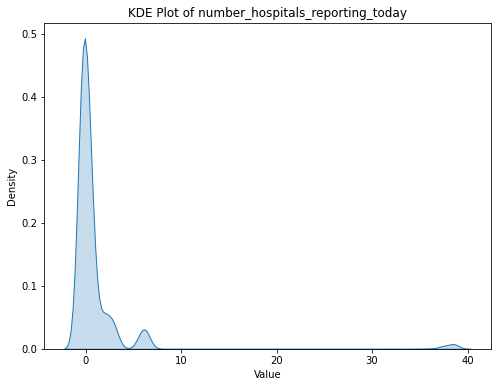

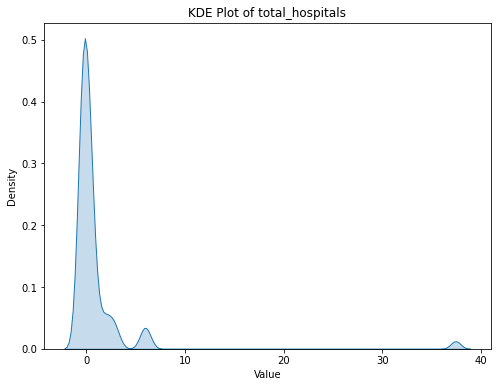

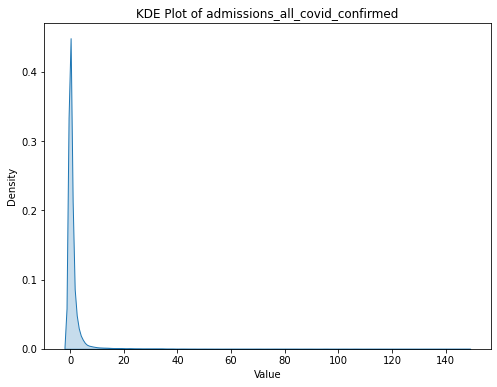

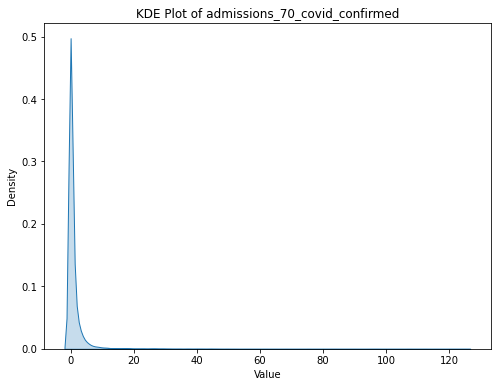

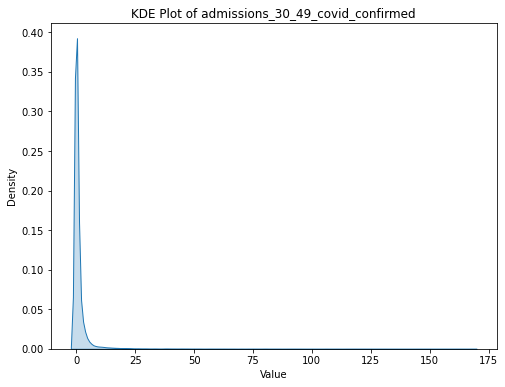

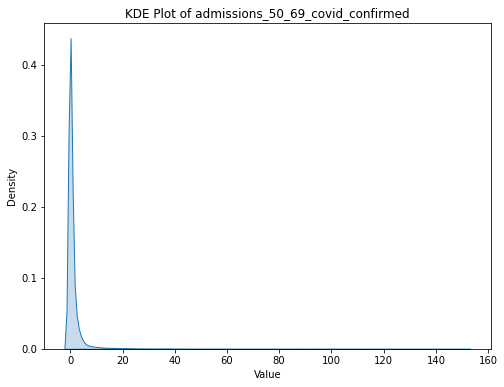

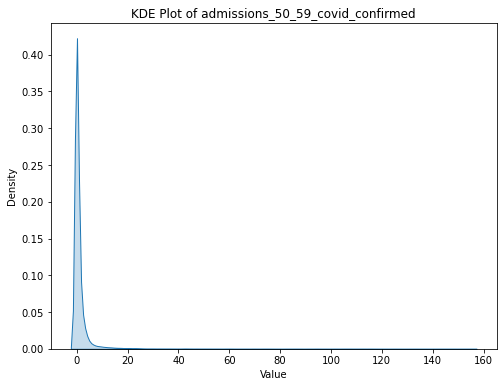

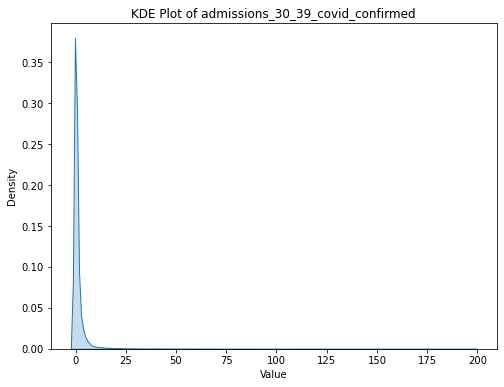

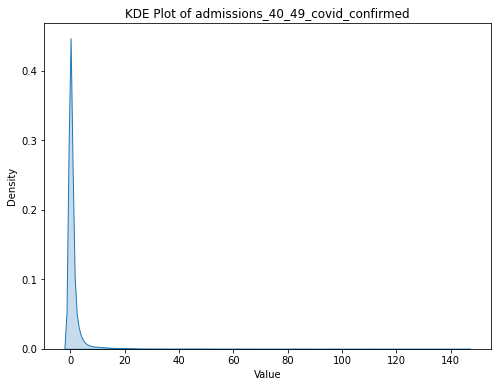

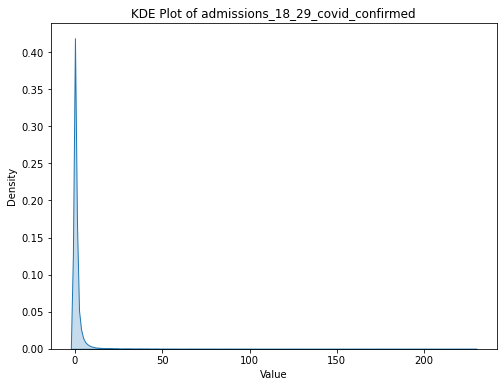

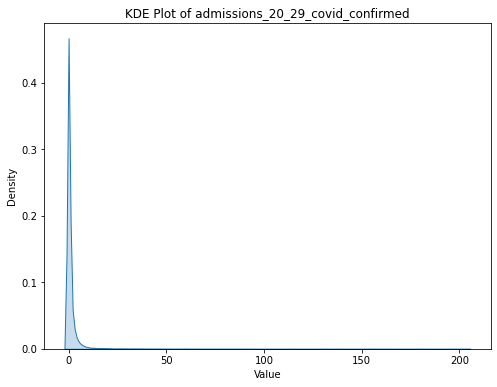

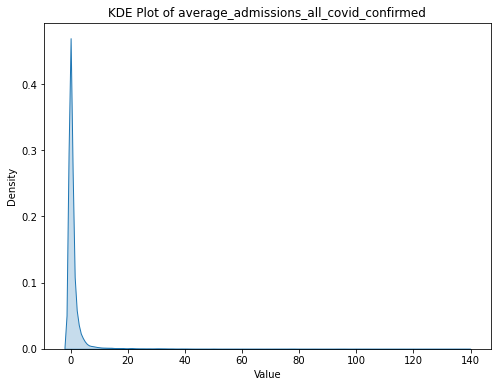

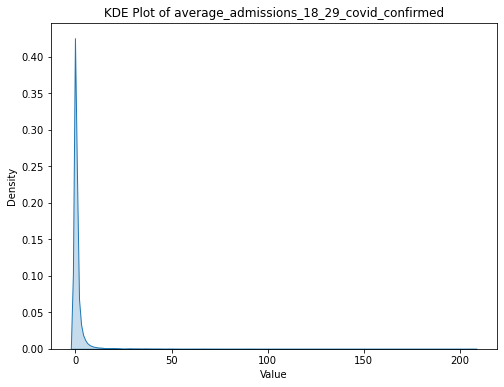

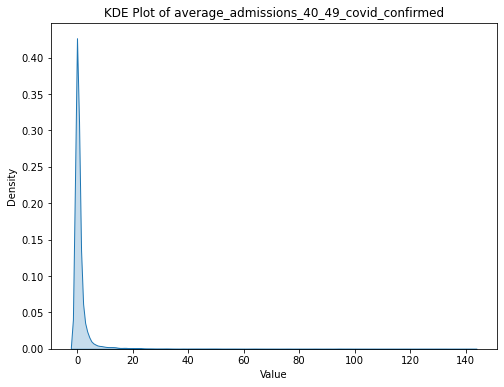

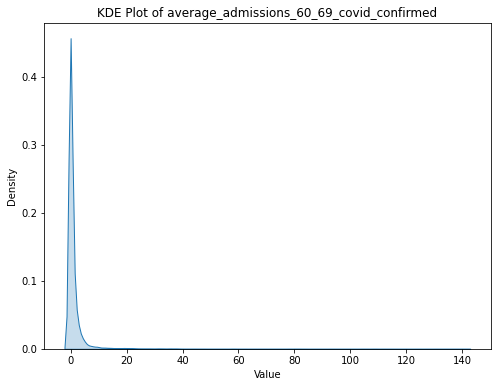

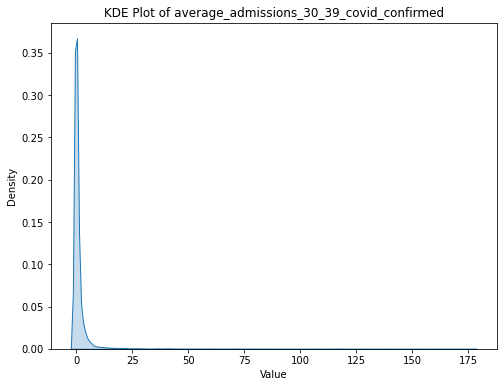

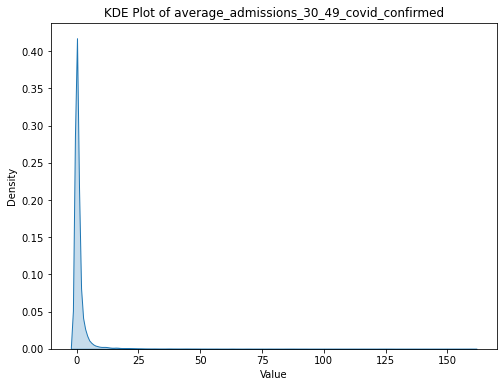

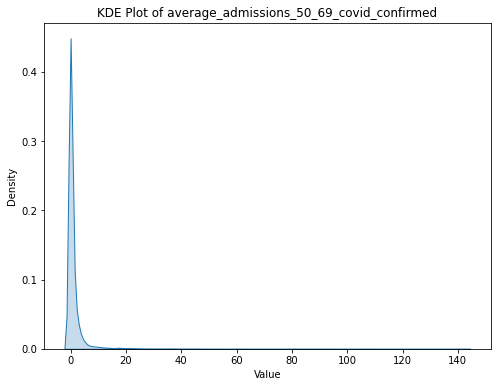

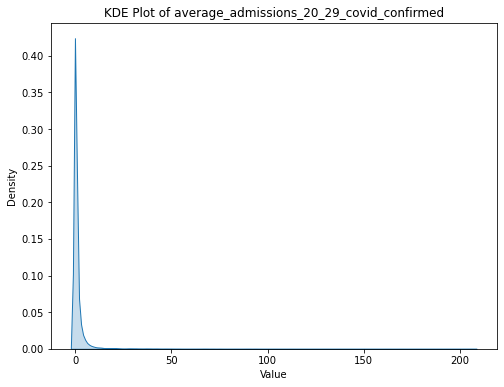

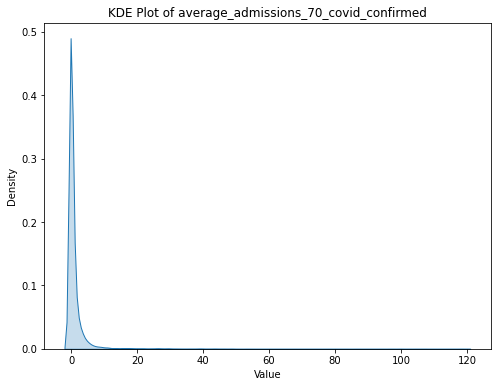

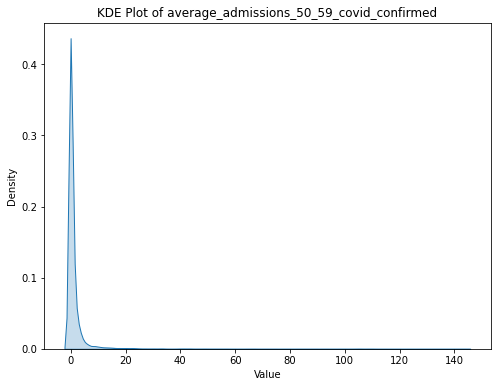

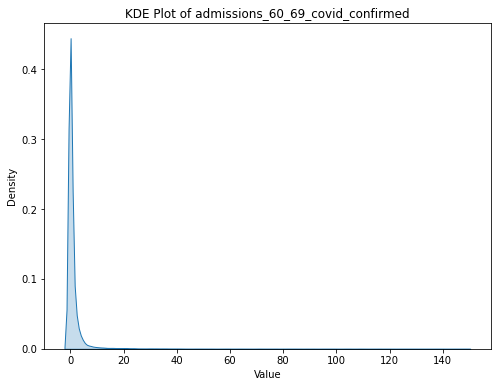

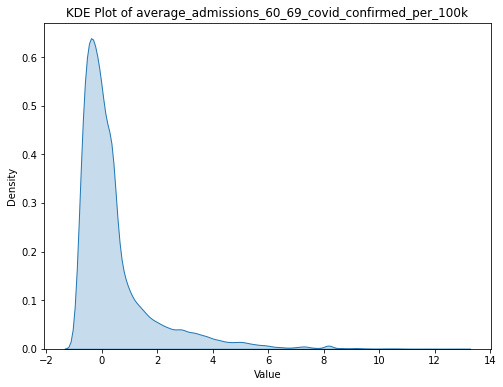

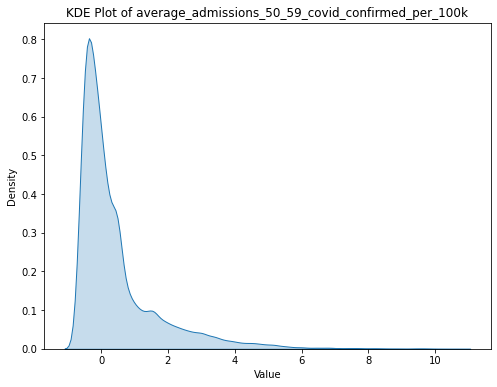

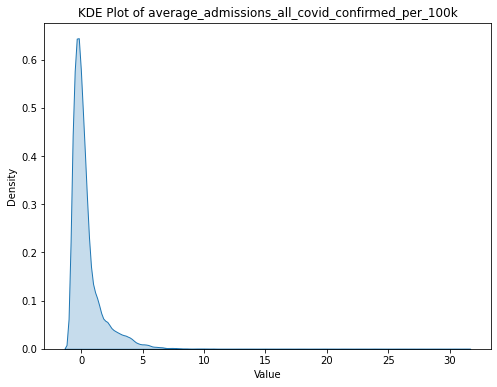

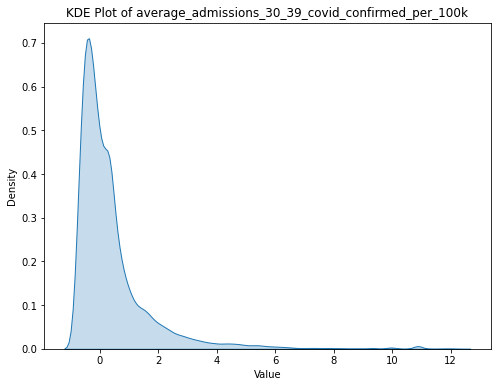

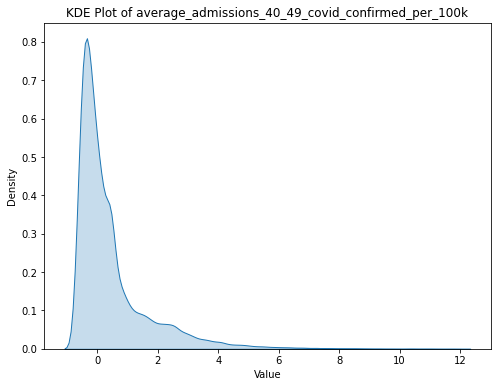

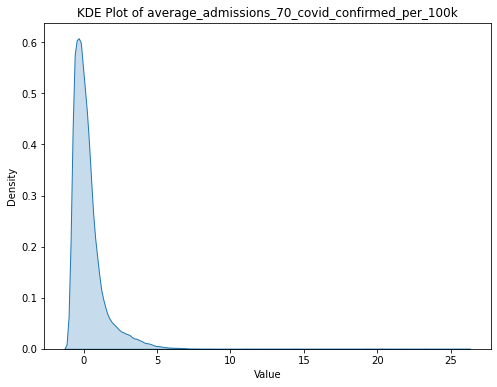

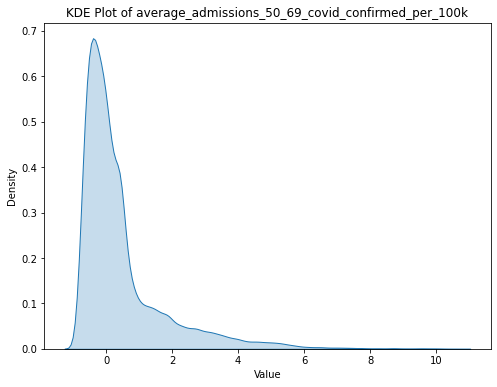

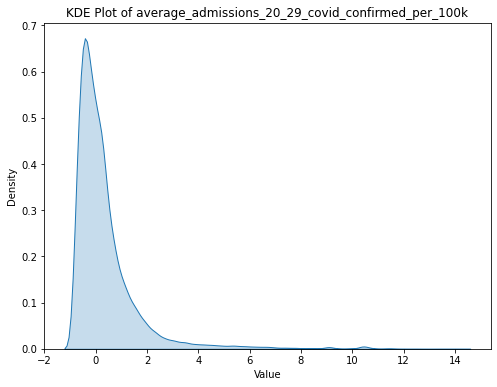

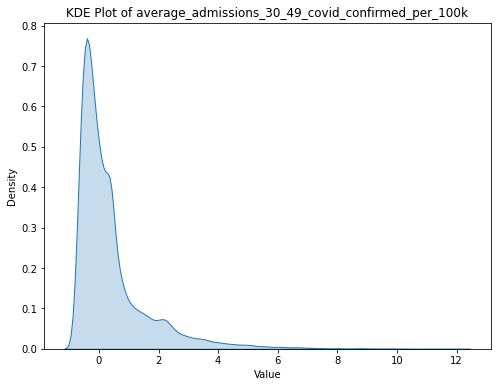

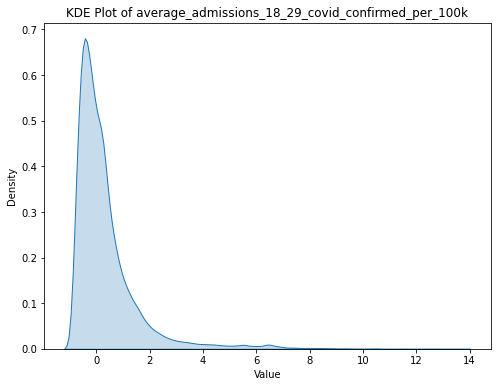

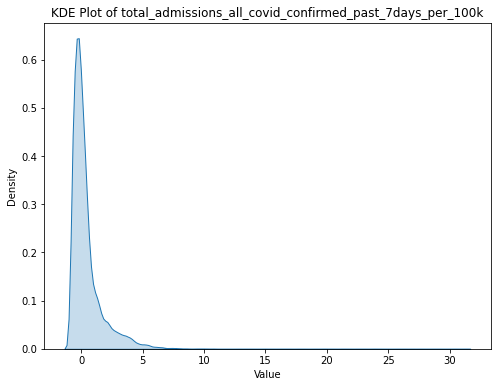

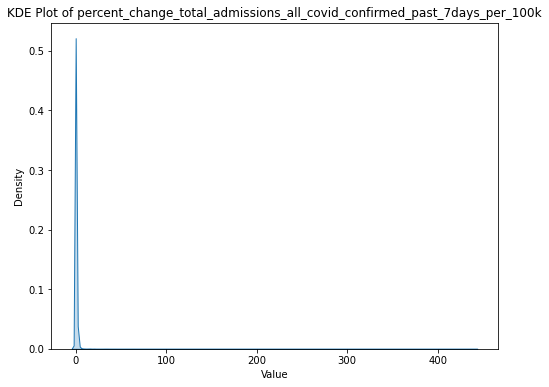

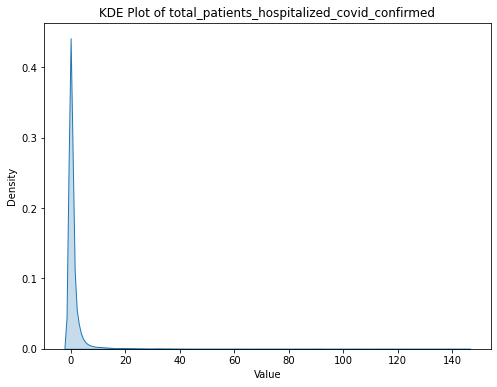

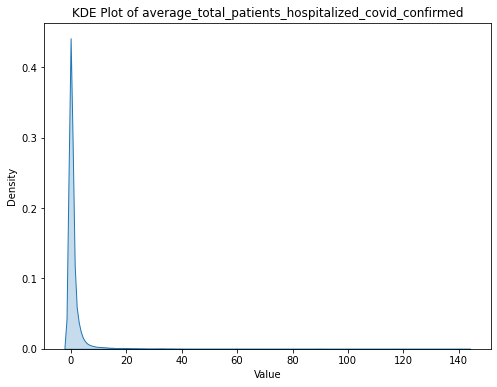

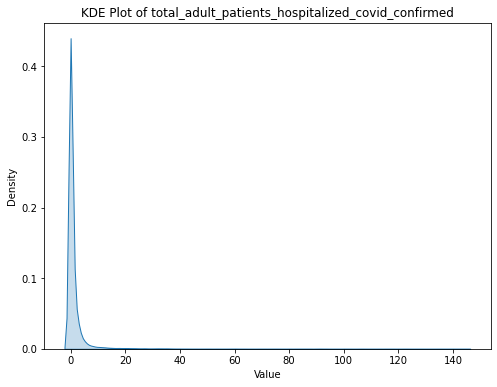

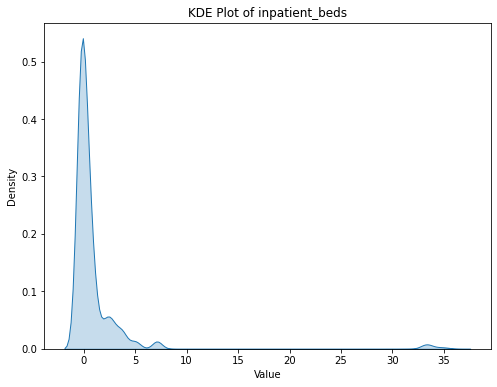

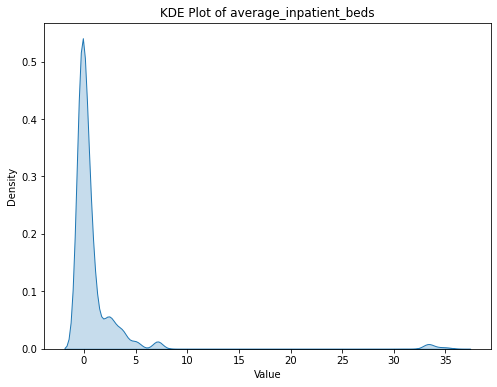

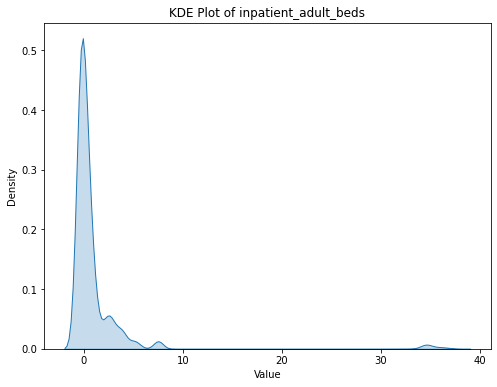

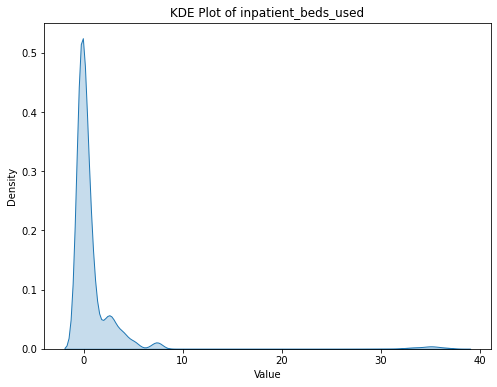

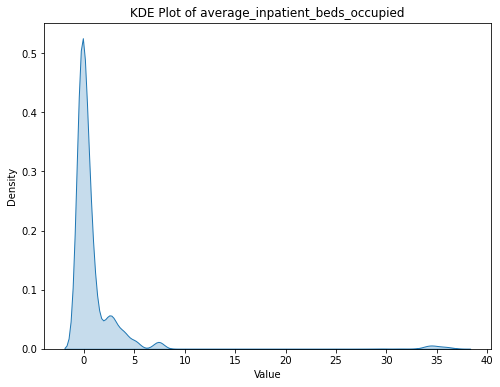

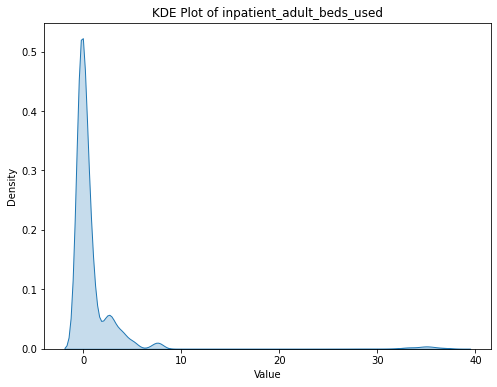

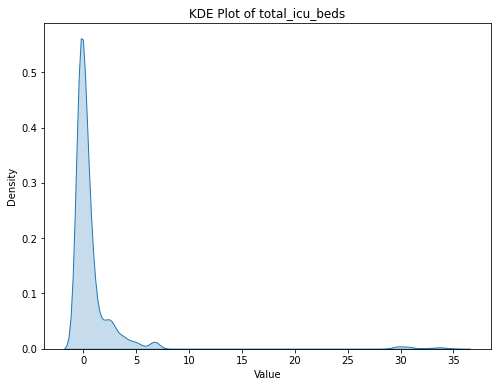

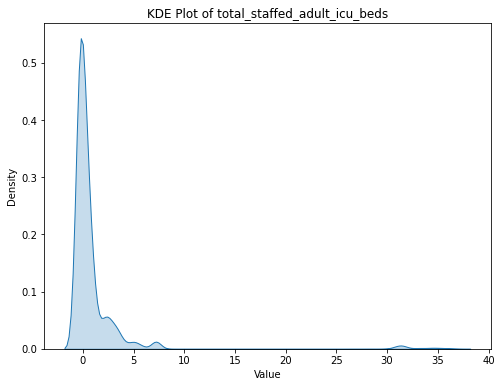

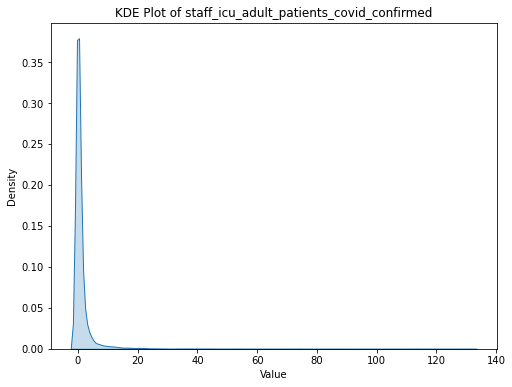

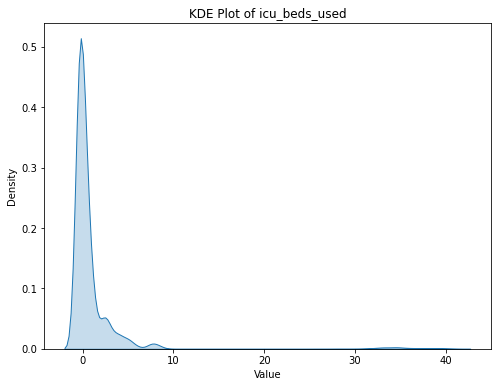

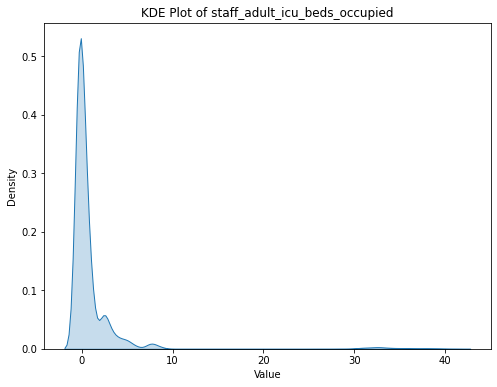

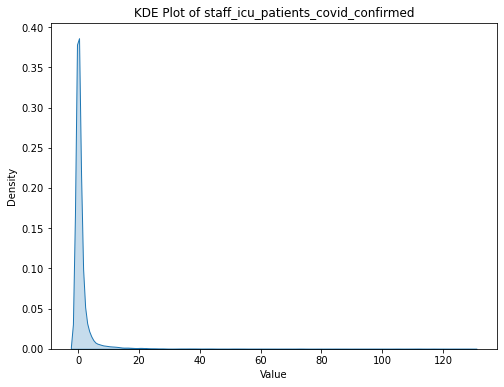

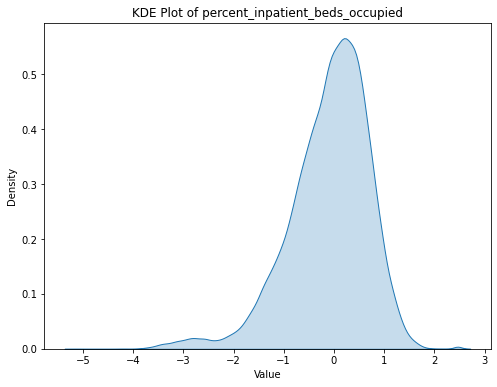

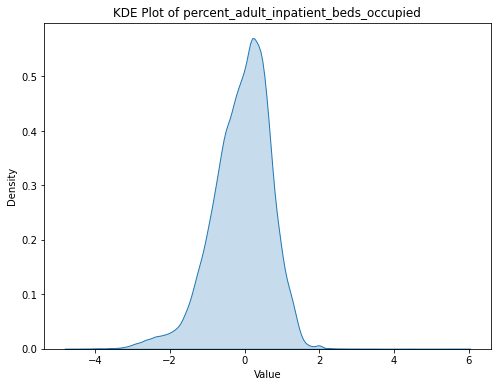

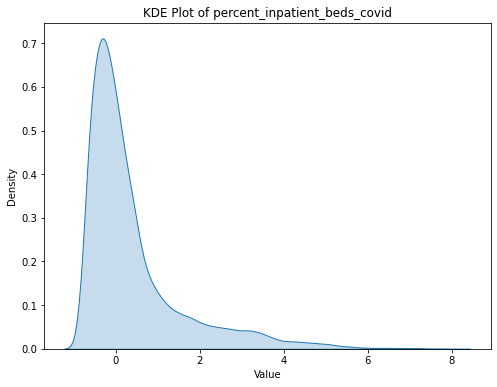

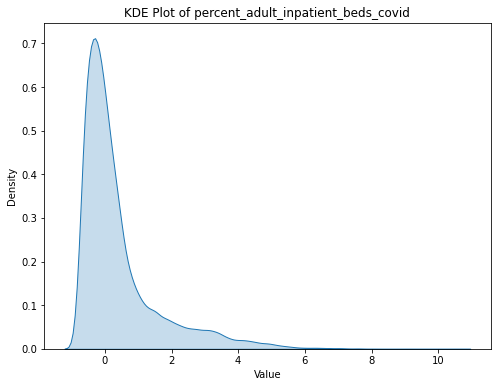

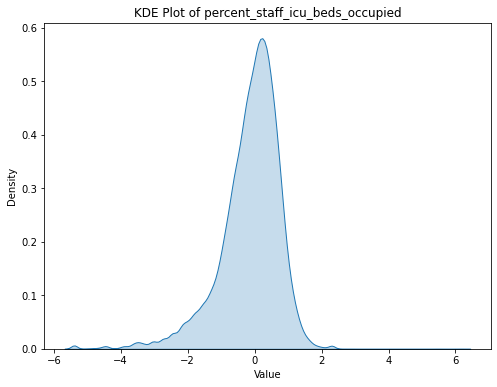

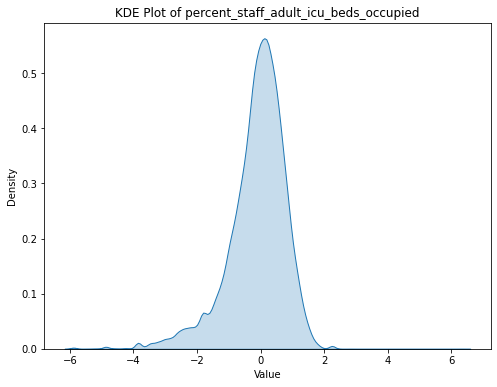

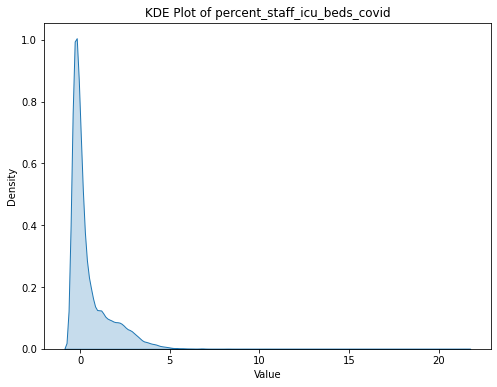

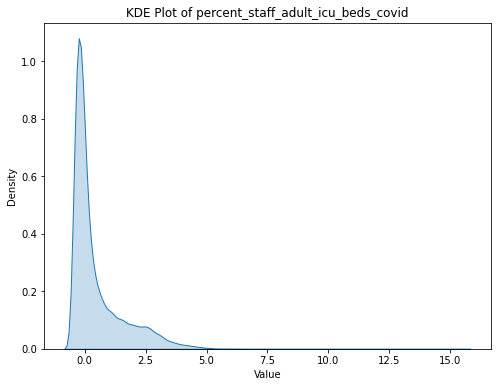

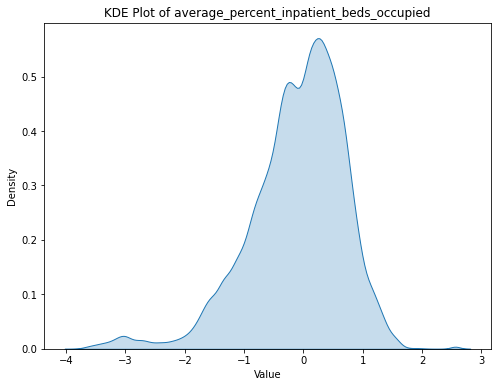

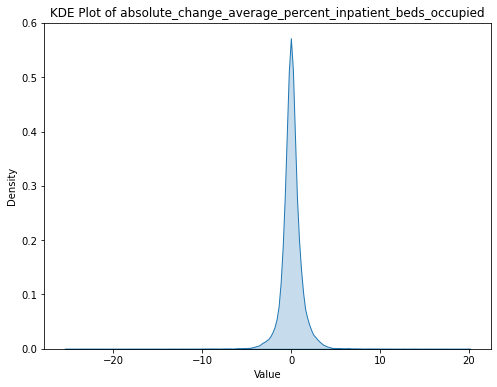

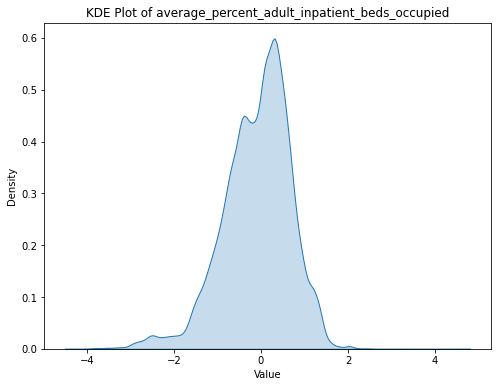

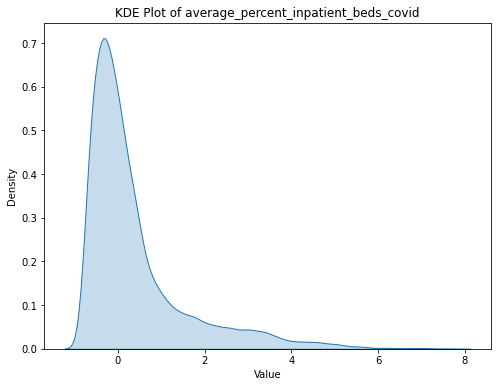

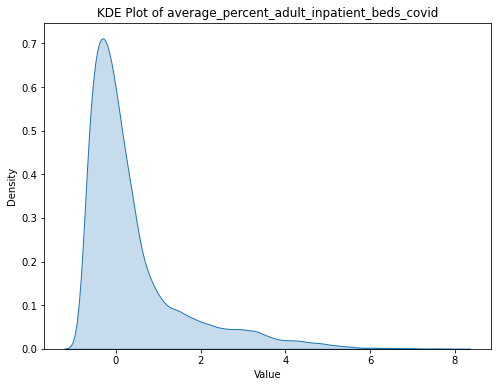

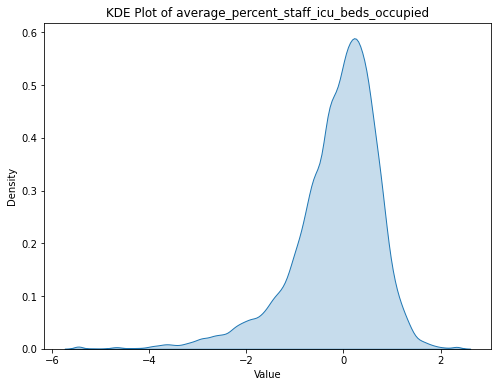

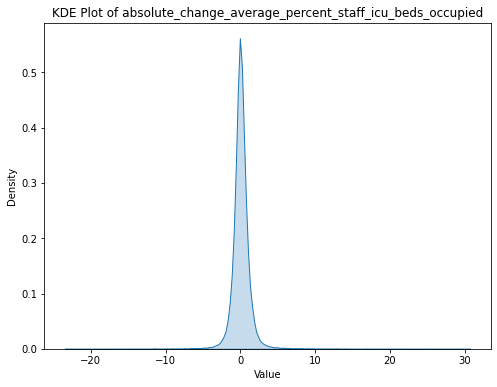

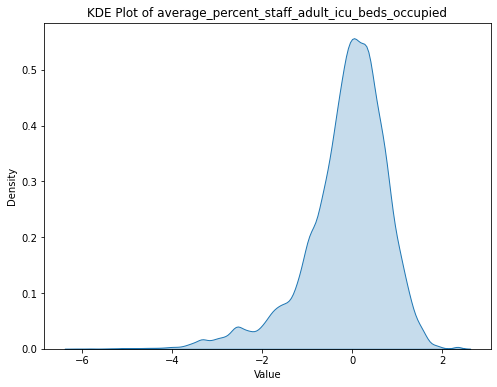

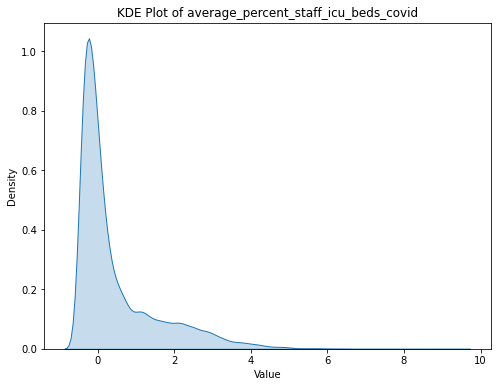

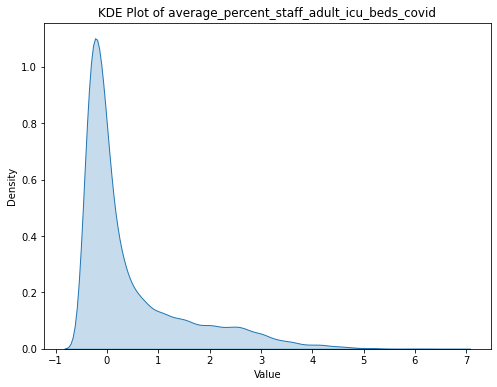

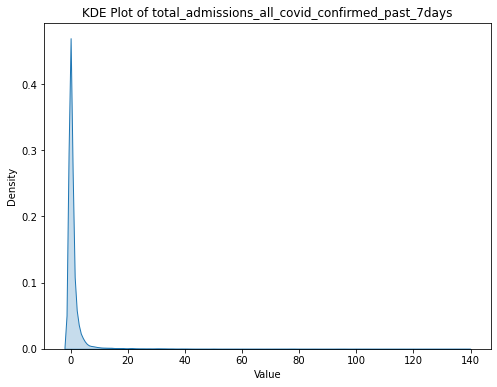

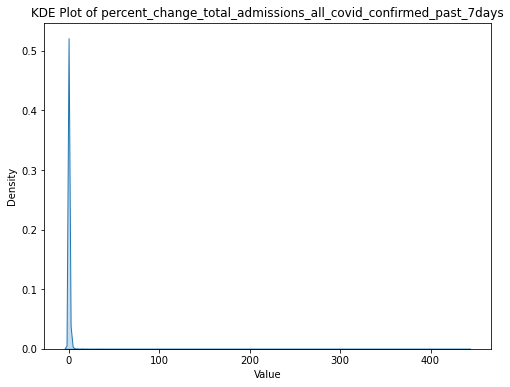

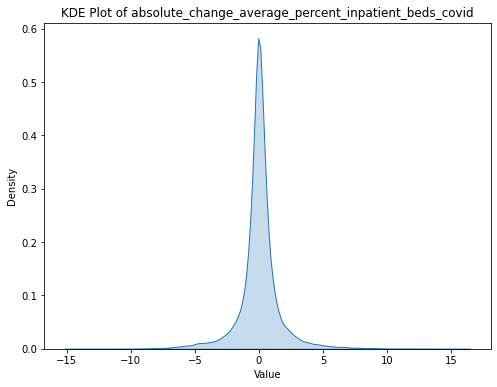

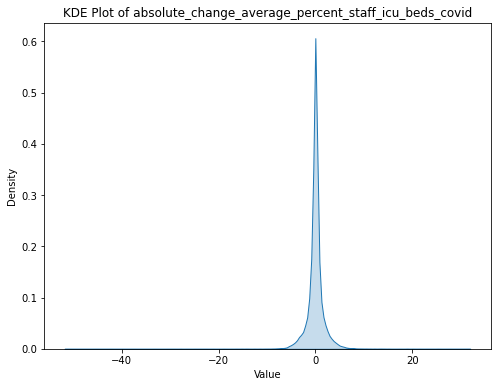

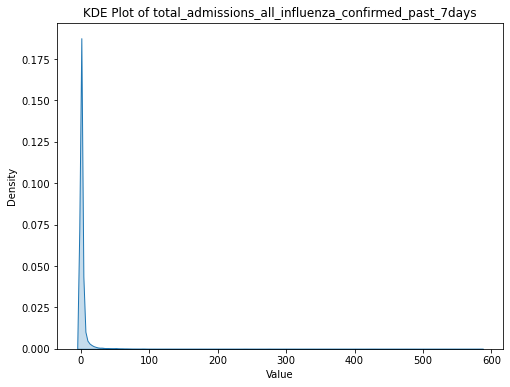

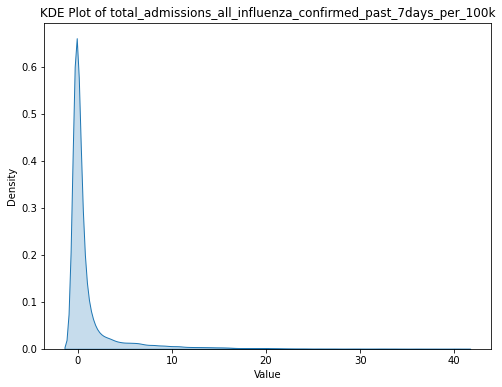

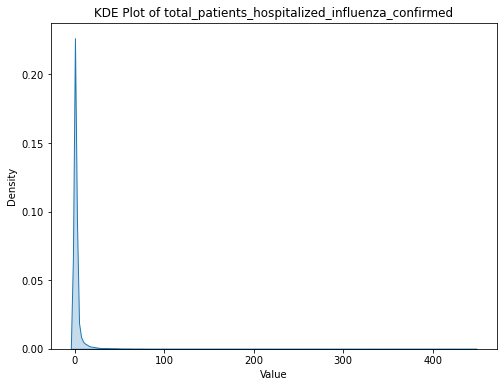

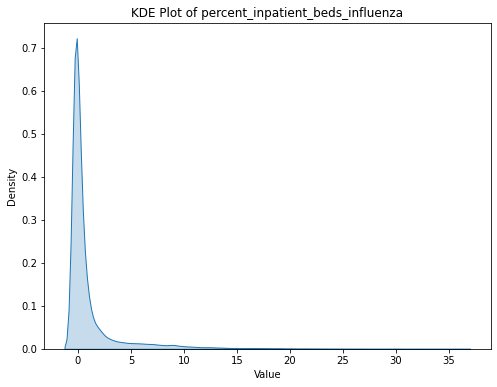

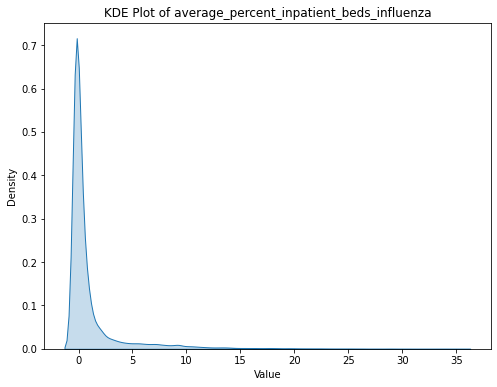

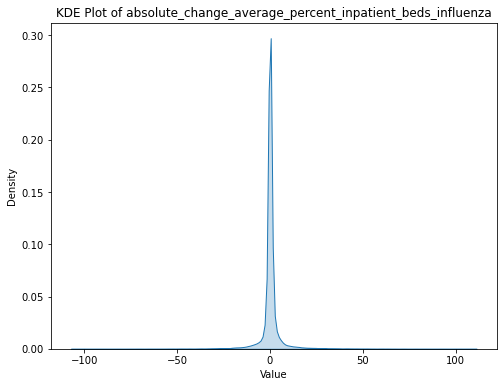

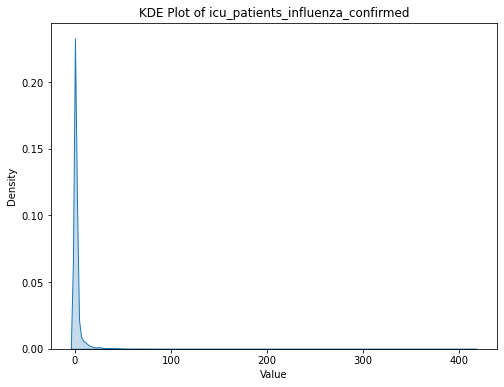

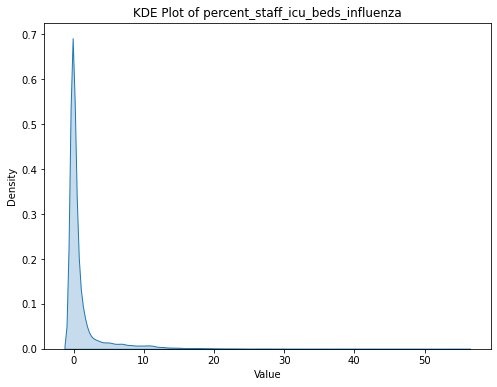

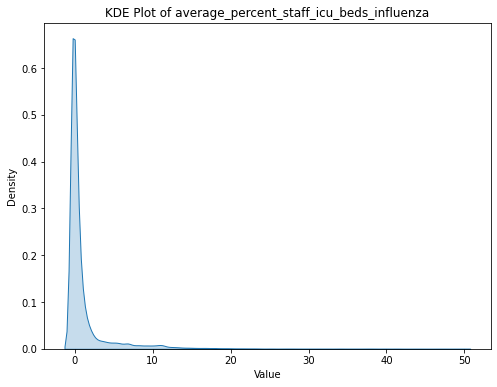

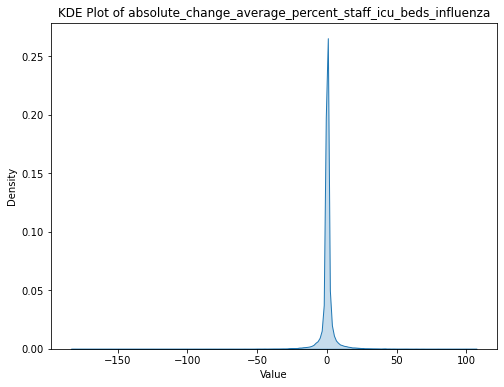

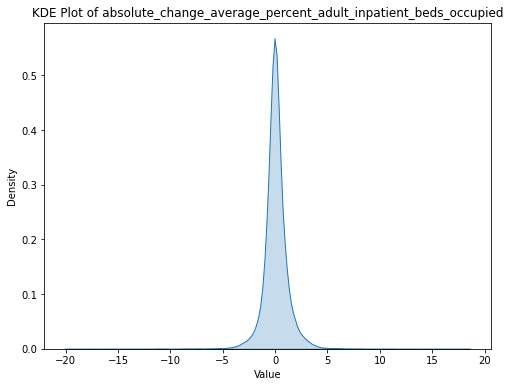

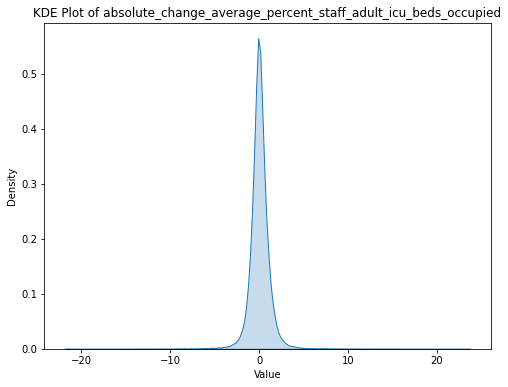

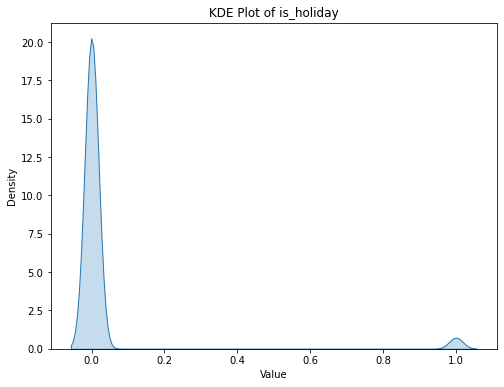

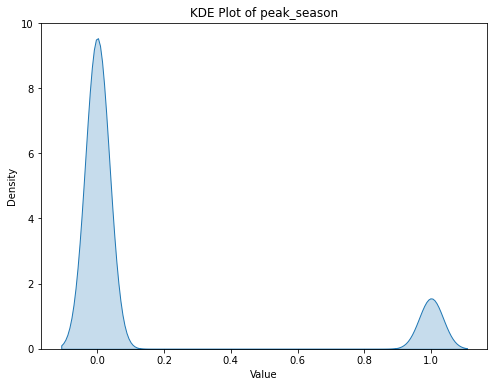

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'Jurisdiction' and 'collection_date' columns
df_filtered = scaled_df.drop(['jurisdiction','state' ,'collection_date'], axis=1)

# Iterate over each remaining column and create a KDE plot
for col in df_filtered.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.kdeplot(df_filtered[col].dropna(), shade=True)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()


In [26]:
df

jurisdiction    state collection_date  number_hospitals_reporting_today  \
0               AZ  Arizona      08-01-2020                              55.0   
1               AZ  Arizona      08-02-2020                              76.0   
2               AZ  Arizona      08-03-2020                              82.0   
3               AZ  Arizona      08-04-2020                              81.0   
4               AZ  Arizona      08-05-2020                              84.0   
...            ...      ...             ...                               ...   
83606           UT     Utah      13-02-2024                              50.0   
83607           UT     Utah      14-02-2024                              49.0   
83608           UT     Utah      15-02-2024                              49.0   
83609           UT     Utah      16-02-2024                              49.0   
83610           UT     Utah      17-02-2024                              49.0   

       total_hospitals  admissions_all_covid_confirmed  \
0                 95.0                            95.0   
1                 95.0                           124.0   
2                 95.0                           100.0   
3                 95.0                           121.0   
4                 95.0                           120.0   
...                ...                             ...   
83606             53.0                            18.0   
83607             53.0                            22.0   
83608             53.0                            17.0   
83609             53.0                             9.0   
83610             53.0                            13.0   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                               26.0                              16.0   
1                               29.0                              24.0   
2                               26.0                              21.0   
3                               32.0                              23.0   
4                               27.0                              28.0   
...                              ...                               ...   
83606                            8.0                               5.0   
83607                           10.0                               1.0   
83608                            8.0                               3.0   
83609                            3.0                               2.0   
83610                            6.0                               1.0   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                                  35.0                              16.0   
1                                  34.0                              12.0   
2                                  28.0                              14.0   
3                                  32.0                              12.0   
4                                  35.0                              14.0   
...                                 ...                               ...   
83606                               2.0                               0.0   
83607                               6.0                               3.0   
83608                               2.0                               1.0   
83609                               2.0                               1.0   
83610                               5.0                               2.0   

       ...  average_percent_inpatient_beds_influenza  \
0      ...                                  0.000000   
1      ...                                  0.000000   
2      ...                                  0.000000   
3      ...                                  0.000000   
4      ...                                  0.000000   
...    ...                                       ...   
83606  ...                                  0.347009   
83607  ...                                  0.361430   
83608  ...        

In [24]:
from scipy.stats.mstats import winsorize

# Exclude the first three columns
df_features = df.iloc[:, 3:]

# Winsorize each feature
for col in df_features.columns:
    df_features[col] = winsorize(df_features[col], limits=[0.01, 0.01])  # Capping at 1st and 99th percentile

# Combine the winsorized features with the first three columns
winsorized_df = pd.concat([df.iloc[:, :3], df_features], axis=1)


In [25]:
winsorized_df

jurisdiction    state collection_date  number_hospitals_reporting_today  \
0               AZ  Arizona      08-01-2020                              55.0   
1               AZ  Arizona      08-02-2020                              76.0   
2               AZ  Arizona      08-03-2020                              82.0   
3               AZ  Arizona      08-04-2020                              81.0   
4               AZ  Arizona      08-05-2020                              84.0   
...            ...      ...             ...                               ...   
83606           UT     Utah      13-02-2024                              50.0   
83607           UT     Utah      14-02-2024                              49.0   
83608           UT     Utah      15-02-2024                              49.0   
83609           UT     Utah      16-02-2024                              49.0   
83610           UT     Utah      17-02-2024                              49.0   

       total_hospitals  admissions_all_covid_confirmed  \
0                 95.0                            95.0   
1                 95.0                           124.0   
2                 95.0                           100.0   
3                 95.0                           121.0   
4                 95.0                           120.0   
...                ...                             ...   
83606             53.0                            18.0   
83607             53.0                            22.0   
83608             53.0                            17.0   
83609             53.0                             9.0   
83610             53.0                            13.0   

       admissions_70_covid_confirmed  admissions_30_49_covid_confirmed  \
0                               26.0                              16.0   
1                               29.0                              24.0   
2                               26.0                              21.0   
3                               32.0                              23.0   
4                               27.0                              28.0   
...                              ...                               ...   
83606                            8.0                               5.0   
83607                           10.0                               1.0   
83608                            8.0                               3.0   
83609                            3.0                               2.0   
83610                            6.0                               1.0   

       admissions_50_69_covid_confirmed  admissions_50_59_covid_confirmed  \
0                                  35.0                              16.0   
1                                  34.0                              12.0   
2                                  28.0                              14.0   
3                                  32.0                              12.0   
4                                  35.0                              14.0   
...                                 ...                               ...   
83606                               2.0                               0.0   
83607                               6.0                               3.0   
83608                               2.0                               1.0   
83609                               2.0                               1.0   
83610                               5.0                               2.0   

       ...  average_percent_inpatient_beds_influenza  \
0      ...                                  0.000000   
1      ...                                  0.000000   
2      ...                                  0.000000   
3      ...                                  0.000000   
4      ...                                  0.000000   
...    ...                                       ...   
83606  ...                                  0.347009   
83607  ...                                  0.361430   
83608  ...        